# Description of the wind power farm life cycle assessment model and system boundaries

This parameterized Life Cycle Assessment (LCA) model has been built in the frame of [LIF-OWI project](https://www.france-energies-marines.org/projets/lif-owi/) with the aim of facilitating the development of tailor-made life cycle inventories to obtain fast estimates of multi-criteria LCA results for offshore fixed and floating wind power projects in France. 

The model uses functions of the python library [lca_algebraic](https://github.com/oie-mines-paristech/lca_algebraic), compatible with Brightway2 and developed in [INCER-ACV project](https://librairie.ademe.fr/energies-renouvelables-reseaux-et-stockage/4448-incer-acv.html).


## LIF-OWI model scope and wind power farm components

The parameterized LCA model was developed to evaluate **wind power farms composed of wind turbines ranging between 5 MW and 15 MW capacity.**

The wind power farm is composed of 5 elements, indicated in Figure 1 : 
* Windturbine : Tower, Rotor and nacelle
* Foundations
* Inter-array cables 
* Offshore substation 
* Export cables

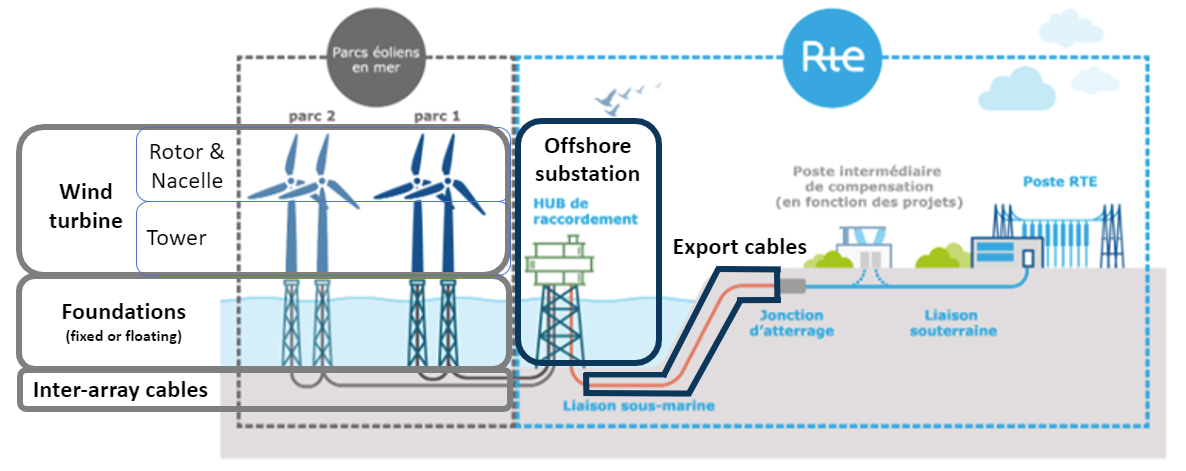

Fig.1. Components of an offshore wind power farm included in LIF-OWI parameterized model (adapted from RTE website)

## Life cycle stages of the wind power farm

The functional unit chosen to refer the estimated impacts to is **1 kWh**. In an intermediate step, the user can also obtain the LCI and LCA with respect to **1 MW installed capacity**.

The life cycle of the wind power farm has been divided in 5 main stages, namely:
* Manufacturing: raw material extraction, manufactured material production and shaping, assembly of components  ​ 
* Transport from the manufacturing sites to the onshore site
* Installation from the onshore site to the offshore area
* Operation and maintenance
* Decommissioning 
* End-of-life

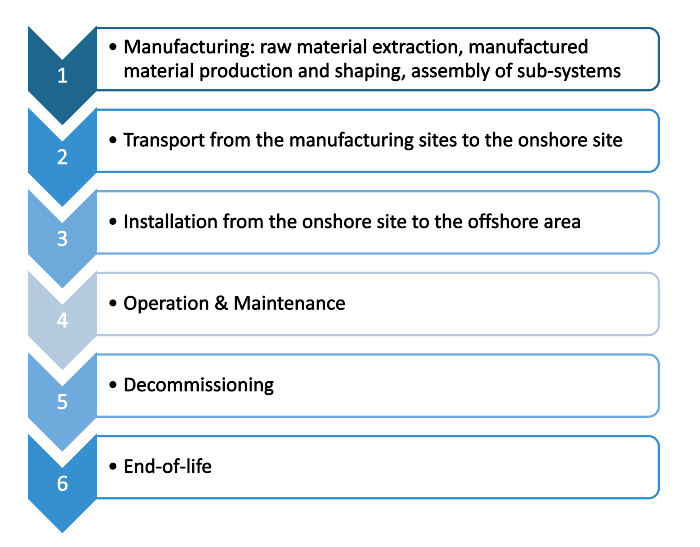
Fig.2. Life cycles stages studied in this model 

The input parameters and the mathematical relationships included in the parameterized Life Cycle Inventory (LCI) of LIF-OWI project are presented below, divided in sections that correspond to the above-mentioned life cycle stages.

# Initialization of the model (import of packages and librairies)

The initialization instructions of the model are grouped in an external file called "init.py", to be imported at the beginning

In [181]:
### %matplotlib inline

# We import all the usefull librairies including lca_algebraic as agb.
# This will allow all functions used through the code coming from lca_algebraic to be fast identified
from init import *

# Setup new project
agb.initProject('Parameterized_model_OWF_Original')

# Import Ecoinvent DB (if not already done)
# Update the PATH to suit your installation
agb.importDb("ecoinvent", '/var/local/ecoinvent/ecoinvent3.7/datasets')

# We use a separate DB for defining our model, reset it beforehand
USER_DB='lif-owi'
agb.resetDb(USER_DB)

# Reset the definition of all parameters 
agb.resetParams()

Biosphere database already present!!! No setup is needed


Database 'ecoinvent' has already been imported 
Db lif-owi was here. Reseting it


# Selection of LCIA method and impact categories

## LCIA method

In [182]:
# This code provides a list with all the LCIA methods available in Brightway2
list_LCIA_methods = [m[0] for m in bw.methods]
list_LCIA_methods = [*set(list_LCIA_methods)]
list_LCIA_methods

['EDIP (superseded)',
 'eco-indicator 99, (E,E) (superseded)',
 'ReCiPe Midpoint (E) w/o LT',
 'EF v2.0 2018 no LT',
 'ReCiPe Endpoint (H,A)',
 'eco-indicator 99, (E,E) w/o LT (superseded)',
 'ReCiPe Midpoint (H) V1.13',
 'ecological scarcity 2013 no LT',
 'CML 2001 w/o LT (superseded)',
 'ecological scarcity 2013',
 'EPS 2000',
 'IPCC 2007 (superseded)',
 'ReCiPe Midpoint (H) V1.13 no LT',
 'eco-indicator 99, (H,A) (superseded)',
 'EF v3.0 EN15804',
 'IPCC 2013',
 'ReCiPe Midpoint (E) V1.13 no LT',
 'IMPACT 2002+ (Endpoint)',
 'IMPACT 2002+ (Midpoint)',
 'ReCiPe Midpoint (I)',
 'EDIP2003',
 'EF1.0.8 midpoint no LT (superseded)',
 'ReCiPe Endpoint (E,A)',
 'USEtox',
 'eco-indicator 99, (I,I) (superseded)',
 'CML v4.8 2016 no LT',
 'IPCC 2013 no LT',
 'selected LCI results',
 'ecological scarcity 2006 (superseded)',
 'CML 2001 (superseded)',
 'selected LCI results, additional',
 'CML v4.8 2016',
 'ReCiPe Midpoint (H) w/o LT',
 'ecological footprint',
 'EDIP2003 w/o LT',
 'EDIP w/o LT (s

In [183]:
# This code provides a list with all the LCIA methods available in Brightway2 with EF in their name :
list_LCIA_methods = [m[0] for m in bw.methods if "EF" in str(m)]
list_LCIA_methods = [*set(list_LCIA_methods)]
list_LCIA_methods

['EF v2.0 2018',
 'EF v3.0 no LT',
 'EF v2.0 2018 no LT',
 'EF1.0.8 midpoint no LT (superseded)',
 'EF v3.0',
 'EF v3.0 EN15804',
 'EF1.0.8 midpoint (superseded)']

In [184]:
# We choose the LCIA method : the Environmental Footprint method v3.0 
#(as agreed in progress meeting 7th December 2022)
LCIA_method = 'EF v3.0'

## Selection of impact categories 

In [185]:
# We list all the impacts categories that can be calculated with the selected LCIA method 
# with the function agb.findMethods 

list_impact_categories=agb.findMethods("",LCIA_method)
nb_impacts=len(list_impact_categories)

#Print the categories
print(f"There are {nb_impacts} impacts categories calculated with the LCIA method : '{LCIA_method}' that are :")
list_impact_categories

There are 28 impacts categories calculated with the LCIA method : 'EF v3.0' that are :


[('EF v3.0', 'acidification', 'accumulated exceedance (ae)'),
 ('EF v3.0', 'climate change', 'global warming potential (GWP100)'),
 ('EF v3.0', 'climate change: biogenic', 'global warming potential (GWP100)'),
 ('EF v3.0', 'climate change: fossil', 'global warming potential (GWP100)'),
 ('EF v3.0',
  'climate change: land use and land use change',
  'global warming potential (GWP100)'),
 ('EF v3.0',
  'ecotoxicity: freshwater',
  'comparative toxic unit for ecosystems (CTUe) '),
 ('EF v3.0',
  'ecotoxicity: freshwater, inorganics',
  'comparative toxic unit for ecosystems (CTUe) '),
 ('EF v3.0',
  'ecotoxicity: freshwater, metals',
  'comparative toxic unit for ecosystems (CTUe) '),
 ('EF v3.0',
  'ecotoxicity: freshwater, organics',
  'comparative toxic unit for ecosystems (CTUe) '),
 ('EF v3.0',
  'energy resources: non-renewable',
  'abiotic depletion potential (ADP): fossil fuels'),
 ('EF v3.0',
  'eutrophication: freshwater',
  'fraction of nutrients reaching freshwater end compar

In [186]:
# We define the impacts categories that we want to study.
# The current version of the code is compatible with the indicators of EF v3.0
# It is possible to use other methods currently available in Brightway2 (for example, EF v3.0 no LT), but this requires 
# the adjustement of the code to the chosen method's terminology

#climate_tot = (LCIA_method,'climate change no LT','global warming potential (GWP100) no LT')
climate_tot = (LCIA_method,'climate change','global warming potential (GWP100)')

#climate_bio = (LCIA_method,'climate change: biogenic no LT','global warming potential (GWP100) no LT')
climate_bio = (LCIA_method,'climate change: biogenic','global warming potential (GWP100)')

#climate_foss = (LCIA_method,'climate change: fossil no LT','global warming potential (GWP100) no LT')
climate_foss = (LCIA_method,'climate change: fossil','global warming potential (GWP100)')

#climate_land = (LCIA_method,'climate change: land use and land use change no LT','global warming potential (GWP100) no LT')
climate_land = (LCIA_method,'climate change: land use and land use change','global warming potential (GWP100)')

#ecosystem_quality_ecotox= (LCIA_method,'ecotoxicity: freshwater no LT','comparative toxic unit for ecosystems (CTUe)  no LT')
ecosystem_quality_ecotox= (LCIA_method,'ecotoxicity: freshwater','comparative toxic unit for ecosystems (CTUe) ')

#ecosystem_quality_acid = (LCIA_method,'acidification no LT','accumulated exceedance (ae) no LT')
ecosystem_quality_acid = (LCIA_method,'acidification','accumulated exceedance (ae)')

#ecosystem_quality_fresh_eut = (LCIA_method,'eutrophication: freshwater no LT','fraction of nutrients reaching freshwater end compartment (P) no LT')
ecosystem_quality_fresh_eut = (LCIA_method,'eutrophication: freshwater','fraction of nutrients reaching freshwater end compartment (P)')
    
#ecosystem_quality_mar_eut = (LCIA_method,'eutrophication: marine no LT','fraction of nutrients reaching marine end compartment (N) no LT'),
ecosystem_quality_mar_eut = (LCIA_method,'eutrophication: marine','fraction of nutrients reaching marine end compartment (N)')
    
#ecosystem_quality_ter_eut=(LCIA_method,'eutrophication: terrestrial no LT','accumulated exceedance (AE)  no LT')
ecosystem_quality_ter_eut=(LCIA_method,'eutrophication: terrestrial','accumulated exceedance (AE) ')

#human_health_io= (LCIA_method,'ionising radiation: human health no LT','human exposure efficiency relative to u235 no LT')
human_health_io= (LCIA_method,'ionising radiation: human health','human exposure efficiency relative to u235')

#human_health_oz= (LCIA_method,'ozone depletion no LT','ozone depletion potential (ODP)  no LT')
human_health_oz= (LCIA_method,'ozone depletion','ozone depletion potential (ODP) ')

#human_health_pht= (LCIA_method, 'photochemical ozone formation: human health no LT','tropospheric ozone concentration increase no LT')
human_health_pht= (LCIA_method, 'photochemical ozone formation: human health','tropospheric ozone concentration increase')

#human_health_res= (LCIA_method,'particulate matter formation no LT','impact on human health no LT')
human_health_res= (LCIA_method,'particulate matter formation','impact on human health')

#human_health_noncar= (LCIA_method,'human toxicity: non-carcinogenic no LT','comparative toxic unit for human (CTUh)  no LT')
human_health_noncar= (LCIA_method,'human toxicity: non-carcinogenic','comparative toxic unit for human (CTUh) ')

#human_health_car= (LCIA_method,'human toxicity: carcinogenic no LT','comparative toxic unit for human (CTUh)  no LT')
human_health_car= (LCIA_method,'human toxicity: carcinogenic','comparative toxic unit for human (CTUh) ')

#resources_foss =(LCIA_method,  'energy resources: non-renewable no LT',  'abiotic depletion potential (ADP): fossil fuels no LT')
resources_foss =(LCIA_method,  'energy resources: non-renewable',  'abiotic depletion potential (ADP): fossil fuels')

#resources_land = (LCIA_method, 'land use no LT', 'soil quality index no LT')
resources_land = (LCIA_method, 'land use', 'soil quality index')

#resources_min_met =(LCIA_method,'material resources: metals/minerals no LT','abiotic depletion potential (ADP): elements (ultimate reserves) no LT')
resources_min_met =(LCIA_method,'material resources: metals/minerals','abiotic depletion potential (ADP): elements (ultimate reserves)')

# resources_water = (LCIA_method,  'water use no LT',  'user deprivation potential (deprivation-weighted water consumption) no LT')
resources_water = (LCIA_method,  'water use',  'user deprivation potential (deprivation-weighted water consumption)')

In [187]:
#We define a list of 19 impacts
impacts_EF_3_0 = [climate_tot, climate_bio, climate_foss, climate_land, ecosystem_quality_ecotox,ecosystem_quality_acid,
                  ecosystem_quality_fresh_eut, 
                  ecosystem_quality_mar_eut, 
                  ecosystem_quality_ter_eut, human_health_io,
                  human_health_oz, human_health_pht, human_health_res, human_health_noncar, human_health_car, resources_foss,
                  resources_land, resources_min_met, resources_water]

#We define a list of 1 impact (climate change impact) to do verification & comparisation
impacts_EF_CO2 = [climate_tot]

# Definition of main parameters and activities

## Definition of input parameters
In this section, we define the main variable and fixed parameters that will be used for modeling the wind electricity production facility. Other parameters will be introduced in other sections. 


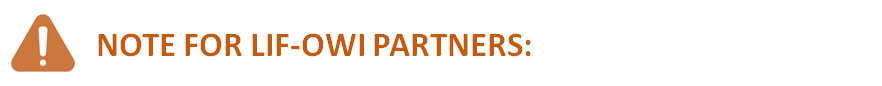
Please, check on defined input parameters and let OIE team know if you have other suggestions of relevant input parameters to be considered alternatively

Some relevant input variable parameters are defined in this section. The function newFloatParm() of [lca_algebraic](https://github.com/oie-mines-paristech/lca_algebraic) library is used. 

For a given parameter, the following attributes can be defined:
- A short name and a longer label
- The default value
- The minimum and maximum values and the probability distribution (uniform set by default when not specified)
- The unit
- The group, which corresponds to a classification of a set of parameters to help organizing them
- A description

In this case, Kouloumpis and Azapagic (2022) was considered as a reference source to set the default values of the variable parameters defined in this section.

The minimum and maximum values were arbitrarily fixed, though information from available sources was considered to ensure plausible assumptions.

### Global Wind farm parameters 

In [188]:
#Default value from Kouloumpis and Azapagic (2022)
#limits may be modified based on LIF-OWI partners' feedback
n_turbines = agb.newFloatParam(
    "n_turbines",
    default=30, min=1, max=100, 
    group="1. Global wind farm",
    label="the number of turbines in the wind farm",
    unit="turbines")

In [189]:
#The 5 MW default value corresponds to Kouloumpis and Azapagic (2022) reference wind turbine
#A minimum value of 2 MW was assumed according to the lower capacity wind turbines inventoried 
#by Kouloumpis and Azapagic (2022), whereas a maximum value of 15 MW was considered based on
# the range of LIF-OWI case studies (5 to 15 MW wind turbines)

turbine_MW = agb.newFloatParam(
    "turbine_MW",
    default = 5, min = 2, max = 15,
    group="1. Global wind farm",
    label = " the unit capacity of one wind turbine",
    unit ="MW")

In [190]:
power_tot_farm_MW=n_turbines*turbine_MW

In [191]:
#Default value from Kouloumpis and Azapagic (2022)  
#limits may be modified based on LIF-OWI partners' feedback

life_time = agb.newFloatParam(
    'life_time',
    default = 20, min = 20, max = 25, #alternative limits could be min=1 and max=38 from Besseau et al(2019)
    group="1. Global wind farm",
    label = 'the life time of wind farm',
    unit = 'years')

#Internal RTE studies for electrical connection sub-system chose a life time of 40 years for these equipments.
#To be consistant, We have chosen a common life time for all the system.
#Indeed, we dont know what will happen after the decommisioning of wind turbines.
#If the wind turbines are replaced by new ones and the electric connexion is maintained,
#this would decrease the contribution of this subsystem to the total impacts as its life time would be increased.

In [192]:
#Default value = 100% assumes that the availability is already included in the load factor
availability = agb.newFloatParam(
    'availability',
    default = 1, min = 0.9, max = 1,
    group="1. Global wind farm",
    label ='ratio of the number of days per year when the windturbines are not stopped for maintenance')

In [193]:
#Default value from Kouloumpis and Azapagic (2022)
#limits may be modified based on LIF-OWI partners' feedback
load_rate = agb.newFloatParam(
    'load_rate',
    default = 0.4, min = 0, max = 1,
    group="1. Global wind farm",
    label = 'ratio of the total electricity produced against the theoretical one for a year')

In [194]:
foundations_type = agb.newEnumParam(
    "foundations", 
    group = '1. Global wind farm',
    default="tripod",
    values=["gbf", "monopod", "tripod", "floating", "personalised"], 
    label = 'the type of foundations')
#gbf, monopod, tripod, floating foundations or personnalised foundations
#personnalised = the user can choose the masses of the material 

In [195]:
fixed_foundations = agb.newBoolParam(
    "fixed_foundations",
    1, # defaut value : fixed-bottom foundations
    group = "1. Global wind farm",
    label ="the type of foundations fixed/floating")

floating_foundations = 1 - fixed_foundations

#To do : ce paramètre fait Doublon avec le param "foundations", mais c'est utile actuellement pour faire tourner le code. A voir comment l intégrer en 1 seul paramètre plus tard?


### Recycled materials IN and OUT parameters

In [196]:
#Default value from Kouloumpis and Azapagic (2022), 
#corresponding to how much of the steel used for the OWF is made of non-virgin material
#limits may be modified based on LIF-OWI partners' feedback

steel_recycled_share_IN = agb.newFloatParam(
    "steel_recycled_share_IN",
    default = 0.42, min=0, max=1,
    group = '2. Materials IN',
    label = 'The share of recycled steel used as an input to manufacture the wind farm components')

In [197]:
#Default value from Kouloumpis and Azapagic (2022)  
#corresponding to how much of the used steel is sent to recycling after decommissioning
#limits may be modified based on LIF-OWI partners' feedback

steel_recycled_share_OUT = agb.newFloatParam(
    "steel_recycled_share_OUT",
    default = 0.9, min=0, max=1,
    group = '5. EoL - Materials OUT',
    label = 'The share of steel going to recycling after the wind farm decommissioning')

In [198]:
#Default value from Kouloumpis and Azapagic (2022)  
#corresponding to how much of the aluminium used for the OWF is made of non-virgin material
#limits may be modified based on LIF-OWI partners' feedback

alu_recycled_share_IN = agb.newFloatParam(
    "alu_recycled_share_IN",
    default = 0.39, min=0, max=1,
    group = '2. Materials IN',
    label = 'The share of recycled aluminium used as an input to manufacture the wind farm components')

In [199]:
#Default value from Kouloumpis and Azapagic (2022)  
#corresponding to how much of the used aluminium is sent to recycling after decommissioning
#limits may be modified based on LIF-OWI partners' feedback

alu_recycled_share_OUT = agb.newFloatParam(
    "alu_recycled_share_OUT",
    default = 0.9, min=0, max=1,
    group = '5. EoL - Materials OUT',
    label = 'The share of aluminium going to recycling after the wind farm decommissioning')

In [200]:
# Rate of aluminium being landfilled 
# corresponding to how much of the used aluminium is sent to landfill after decommissioning

alu_landfill_share = agb.newFloatParam(
   "alu_landfill_share",
    default =0.05, min=0, max=1,
    group = '5. EoL - Materials OUT',
    label = 'The share of landfilling aluminium waste in the wind farm')


In [201]:
# Rate of aluminium being incinerated 
# corresponding to how much of the used aluminium is sent to incineration after decommissioning

alu_incineration_share = agb.newFloatParam(
    "alu_incineration_share",
    default =0.05, min=0, max=1,
    group = '5. EoL - Materials OUT',
    label = 'The share of incinerated aluminium waste in the wind farm')

In [202]:
#Correction in case alu_recycled_share_OUT + alu_landfill_share + alu_incineration_share >1:
alu_recycled_share_OUT_correc=(alu_recycled_share_OUT)/(alu_recycled_share_OUT+alu_landfill_share+alu_incineration_share)
alu_landfill_share_correc=(alu_landfill_share)/(alu_recycled_share_OUT+alu_landfill_share+alu_incineration_share)
alu_incineration_share_correc=(alu_incineration_share)/(alu_recycled_share_OUT+alu_landfill_share+alu_incineration_share)

In [203]:
# Rate of recycled concrete, corresponding to how much of the concrete used for the OWF is made of non-virgin material
# Rate of recyclability for concrete limited to 30% according to ArchDaily, 2022 (https://www.archdaily.com/972748/concrete-recycling-is-already-a-reality)

concrete_recycled_share_IN = agb.newFloatParam(
    'concrete_recycled_share_IN',
    default = 0, min = 0, max = 0.3,
    group = '2. Materials IN',
    label = 'The share of recycled concrete used as an input to manufacture the wind farm components')

In [204]:
# Rate of concrete to recycling, corresponding to how much of the used concrete is sent to recycling after decommissioning
# Rate of recyclability for concrete limited to 30% according to ArchDaily, 2022 (https://www.archdaily.com/972748/concrete-recycling-is-already-a-reality)
concrete_recycled_share_OUT = agb.newFloatParam(
    'concrete_recycled_share_OUT',
    default = 0.3, min = 0, max = 0.3,
    group = '5. EoL - Materials OUT',
    label = 'The share of concrete going to recycling after the wind farm decommissioning')

In [205]:
# Rate of recycled copper, corresponding to how much of the copper used for the OWF is made of non-virgin material

copper_recycled_share_IN = agb.newFloatParam(
    'copper_recycled_share_IN',
    default = 0, min = 0, max = 1,
    group = '2. Materials IN',
    label = 'The share of recycled copper used as an input to manufacture the wind farm components')

In [206]:
# Rate of copper to recycling, corresponding to how much of the used copper is sent to recycling after decommissioning
copper_recycled_share_OUT = agb.newFloatParam(
    'copper_recycled_share_OUT',
    default = 0, min = 0, max = 0.3,
    group = '5. EoL - Materials OUT',
    label = 'The share of copper going to recycling after the wind farm decommissioning')

### Masses of material related parameters

#### Tower

In [207]:
#Mass of steel in one windturbine tower
#Default value from Kouloumpis and Azapagic (2022) for a 5 MW wind turbine

mass_tower_steel = agb.newFloatParam(
    "mass_tower_steel",
    default = 217022, # min = , max = ,
    group = '3. Manufacturing of components',
    label = "the mass of steel in the tower",
    unit = "kg")

No 'min/max' provided, param mass_tower_steel marked as FIXED


In [208]:
#Mass of aluminium in one windturbine tower
#Default value from Kouloumpis and Azapagic (2022) for a 5 MW wind turbine

mass_tower_alu = agb.newFloatParam(
    "mass_tower_alu",
    default = 3978, # min = , max = ,
    group = '3. Manufacturing of components',
    label = "the mass of aluminium in the tower",
    unit = "kg")

No 'min/max' provided, param mass_tower_alu marked as FIXED


In [209]:
#Mass of aluminium in one windturbine tower
#Default value from Kouloumpis and Azapagic (2022) for a 5 MW wind turbine 

mass_tower_concrete = agb.newFloatParam(
    "mass_tower_concrete",
    default = 0, # min = , max = ,
    group = '3. Manufacturing of components',
    label = "the mass of concrete in the tower",
    unit = "kg")

No 'min/max' provided, param mass_tower_concrete marked as FIXED


#### Rotor

In [210]:
#Mass of glass fiber in the rotor of one wind turbine
#Default value from Kouloumpis and Azapagic (2022) for a 5 MW wind turbine

mass_glass_fibre_rotor = agb.newFloatParam(
    "mass_glass_fibre_rotor",
    default = 43837, # min = , max = ,
    group = '3. Manufacturing of components',
    label = "the mass of glass fibre in the rotor",
    unit = "kg")

No 'min/max' provided, param mass_glass_fibre_rotor marked as FIXED


#### Foundations

In [211]:
#Mass of steel in the foundations
#Default value for monopile foundation at water depth of 20 meters for a 3 MW windturbine (Tsai et al, 2016, SI) that is linearly extraôlated for a 5MW wind turbine

mass_steel_personalised_foundations = agb.newFloatParam(
    "mass_steel_personalised_foundations",
    default = (276000+169500)*5/3, # min = , max = ,
    group = '3. Manufacturing of components',
    label = "the mass of steel for manufacturing the personalised foundations  ",
    unit = "kg")

No 'min/max' provided, param mass_steel_personalised_foundations marked as FIXED


In [212]:
#Mass of concrete in the foundations
#Default value for monopile foundation at water depth of 20 meters for a 3 MW windturbine (Tsai et al, 2016, SI) that is linearly extraôlated for a 5MW wind turbine

mass_concrete_personalised_foundations = agb.newFloatParam(
    "mass_concrete_personalised_foundations",
    default = 21300*5/3, # min = , max = ,
    group = '3. Manufacturing of components',
    label = "the mass of concrete for manufacturing the personalised foundations ",
    unit = "kg")

No 'min/max' provided, param mass_concrete_personalised_foundations marked as FIXED


In [213]:
#Mass of gravel in the foundations
#Default value for monopile foundation at water depth of 20 meters for a 3 MW windturbine (Tsai et al, 2016, SI) that is linearly extraôlated for a 5MW wind turbine

mass_gravel_personalised_foundations = agb.newFloatParam(
    "mass_gravel_personalised_foundations",
    default = 0*5/3, # min = , max = ,
    group = '3. Manufacturing of components',
    label = "the mass of gravel for manufacturing the personalised foundations  ",
    unit = "kg")

No 'min/max' provided, param mass_gravel_personalised_foundations marked as FIXED


### Parameters specific for transport, installation, O&M, decomissioning stages

In [214]:
#Default value from Kouloumpis and Azapagic (2022)  
#limits may be modified based on LIF-OWI partners' feedback

#Parameter for transport stage
d_onshoresite_land = agb.newFloatParam(
    "d_onshoresite_land",
    default = 200, min = 20, max = 1000,
    group = '4. Transport, installation, O&M, decomissioning',
    label = "the distance between manufacturing and onshore site by road",
    unit = "km")

In [215]:
#Parameter for installation stage  
d_shore = agb.newFloatParam(
    "d_shore",
    default =12.3, min=5, max=100,
    group = '4. Transport, installation, O&M, decomissioning',
    label = 'The distance between the port (onshore area) and the windturbines in the sea (offshore area)',
    unit = "km")

In [216]:
#Parameter for installation stage
# Rotor star: the complete rotor is assembled at the port and placed separately with the nacelle and tower on the same ship 
# The bunny ear: the nacelle, hub and two of the blades are assembled at the port in a way that forms a shape of a bunny’s ear. The tower and the last blade are placed separately on the same ship.   
# Separate parts: all parts are placed separately on the same ship.  

preassembly = agb.newEnumParam(
    "preassembly", 
    group = '4. Transport, installation, O&M, decomissioning',
    label = ' the type of assembly method used for wind turbines moving parts',
    values=["bunnyear", "separate", "rotor"], 
    default="bunnyear")

In [217]:
#Parameter for installation stage
d_riprap = agb.newFloatParam(
    'd_riprap',
    default = 1, min = 1, max = 30,
    unit = 'km',
    group = '4. Transport, installation, O&M, decomissioning',
    label = 'distance related to export cables being embedded (enrochement en français)')

In [218]:
#Parameter for decommissioning stage
d_offshoresite_eol = agb.newFloatParam(
    "d_offshoresite_eol",
    default = 500, min = 20, max = 1000,
    group = "4. Transport, installation, O&M, decomissioning",
    label = "the distance between the offshore site and the waste treatment center by road",
    unit = "km")

In [219]:
#Parameter for decommissioning stage 
#Sacrificial anode of the offshore substation
emission_ratio_anode = agb.newFloatParam(
    'emission_ratio_anode',
    default = 0.0196, min = 0, max = 100,
    group = '4. Transport, installation, O&M, decomissioning',
    label = 'sacrificial anode degradation emission ratio for offshore substation')

### Obsolete parameters

In [220]:
#Default value from Kouloumpis and Azapagic (2022)
#limits may be modified based on LIF-OWI partners' feedback

hub_height = agb.newFloatParam (
    "hub_height",
    default = 120, min = 90, max = 150,
    group = "9. Technological choices and WT specifications",
    label = "the hub height (the height of the tower)",
    unit = "m")

In [221]:
#Default value from Kouloumpis and Azapagic (2022)
#limits may be modified based on LIF-OWI partners' feedback

rotor_diameter= agb.newFloatParam(
   'rotor_diameter',
    default = 128, min = 39, max = 154,
    group = "9. Technological choices and WT specifications",
    label = "the rotor diameter of the wind turbine",
    unit = "m")   

In [222]:
##Default value from Kouloumpis and Azapagic (2022) corresponding to 
#ratio of steel mass to total tower mass
#limits may be modified based on LIF-OWI partners' feedback

steel_ratio_tower = agb.newFloatParam(
    "steel_ratio_tower",
    default = 0.98, min=0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = "the mass ratio of steel in tower")

In [223]:
##Default value from Kouloumpis and Azapagic (2022) corresponding to 
#ratio of aluminium mass to total tower mass
#limits may be modified based on LIF-OWI partners' feedback

alu_ratio_tower = agb.newFloatParam(
    "aluminium_ratio_tower",
    default = 0.02, min=0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = "the mass ratio of aluminium in tower")

In [224]:
##Default value from Kouloumpis and Azapagic (2022) corresponding to 
#ratio of aluminium mass to total tower mass
#limits may be modified based on LIF-OWI partners' feedback

concrete_ratio_tower = agb.newFloatParam(
    "concrete_ratio_tower",
    default = 0, min=0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = "the mass ratio of concrete in tower")

**Warning** When we create ratio with 3 or more options, the ratios needs to be corrected to be sure that the sum of the ratios equals to 1. This is why some materials ratios are corrected in the model. 

In [225]:
#Correction in case steel_ratio_tower + alu_ratio_tower + concrete_ratio_tower >1:
steel_ratio_tower_correc=(steel_ratio_tower)/(steel_ratio_tower+alu_ratio_tower+concrete_ratio_tower)
alu_ratio_tower_correc=(alu_ratio_tower)/(steel_ratio_tower+alu_ratio_tower+concrete_ratio_tower)
concrete_ratio_tower_correc=concrete_ratio_tower/(steel_ratio_tower+alu_ratio_tower+concrete_ratio_tower)

### General fixed parameters 
All the general fixed parameters are introduced in CAPITAL Letters.

In [226]:
DIESEL_CALORIFIC_VALUE_MJ_PER_L = 38.68 #MJ/L    #https://fr.wikipedia.org/wiki/Discussion:Empreinte_carbone#:~:text=1%20litre%20de%20diesel%20%3D%2038,68%20MJ%20%3D%2010%2C74%20kWh 
DIESEL_CALORIFIC_VALUE_KWH = 10.74 #kWh          #https://fr.wikipedia.org/wiki/Discussion:Empreinte_carbone#:~:text=1%20litre%20de%20diesel%20%3D%2038,68%20MJ%20%3D%2010%2C74%20kWh
DIESEL_DENSITY_KG_M3 = 832 #kg/m3                #https://www.infineuminsight.com/media/2228/infineum-wdfqs-2018-v10-14112018.pdf
KWH_TO_MJ = 3.6 #kWh/MJ 
HEAVY_FUEL_CALORIFIC_VALUE_MJ = 38.3 #MJ         #https://www.researchgate.net/publication/305438099_Forecasting_port-level_demand_for_LNG_as_a_ship_fuel_the_case_of_the_port_of_Antwerp/figures?lo=1
STEEL_KG_PER_METER = 507*7.92 #kg/m              #https://www.twi-global.com/technical-knowledge/job-knowledge/calculating-weld-volume-and-weight-095

#Note_Paula : Question transmitted to Manel - to be verified by her
STEEL_DENSITY_TOWER = 8500 #kg/m3
DENSITY_STEEL = 7850  #kg/m³

#Note_Paula : Question transmitted to Manel - to be verified by her
CONCRETE_DENSITY = 2300 #kg/m3         (Pacheco-Torgal et al, 2020: https://www.sciencedirect.com/book/9780128190555/advances-in-construction-and-demolition-waste-recycling)
CONCRETE_DENSITY_2= 2406.53 #kg/m3     (https://www.traditionaloven.com/building/masonry/concrete/convert-cubic-metre-m3-concrete-to-kilogram-kg-of-concrete.html#:~:text=The%20answer%20is%3A%20The%20change,for%20the%20same%20concrete%20type.)

#Fixed parameters used for the calculations of Rotor & Nacelle LCI
DENSITY_ALU = 2710 #kg/m3                (https://www.thyssenkrupp-materials.co.uk/density-of-aluminium.html)
DENSITY_COPPER = 8960 # kg/m³ 
DENSITY_LEAD = 11342 #kg/m³ 
DENSITY_HDPE = 970  #kg/m3               > high density polyethylene
DENSITY_PP = 946 #kg/m³                  > polypropylene
DENSITY_PINEWOOD = 600.5 #kg/m3          # Mean value for the range 352-849, source https://matmatch.com/learn/property/density-of-wood
GAS_ENERGY_PER_VOLUME = 10.55 #kWh/m3    # Conversion volume to kWh, gaz, source: https://learnmetr "ics.com/m3-gas-to-kwh/   

# Fixed parameter used for the calculations of Inter-array cables' LCI.
ZINC_COATING = 214.2 #g/m2 > zinc coating for foundations structure, 30*7.14, source: (https://itemscatalogue.redcross.int/detail.aspx?productcode=EMEAGAUG01#:~:text=The%20density%20of%20the%20zinc,equivalent%20to%207.14%20g%2Fm2.&text=Example%3A%20zinc%20coating%20thickness%20measured,of%20zinc%20on%20one%20side.)

## Electricity production estimate
Using the previously defined input parameters, the total electricity (in kWh) produced over the lifetime of the offshore wind farm can be estimated with the following equation:

In [227]:
Elect_prod_lifetime=(load_rate*availability*8760*turbine_MW*1000*n_turbines*life_time)
#8760 = Number of hours per year
#*1000 to convert from MW to kW

## Definition of activities to model the background system
In this section, we define the main activities (i.e. ecoinvent processes from technosphere) that will be used for modeling the wind electricity production facility. Other activities will be introduced in other sections. 

In [228]:
#Materials for wind turbine components
steel_low_alloyed = agb.findTechAct('market for steel, low-alloyed','GLO')
aluminium = agb.findTechAct('market for aluminium, wrought alloy','GLO')
concrete = agb.findTechAct('market group for concrete, normal','GLO')
glass_fibre = agb.findTechAct('market for glass fibre','GLO')
epoxy = agb.findTechAct('market for epoxy resin, liquid','RER')
wood_mix = agb.findTechAct('sawnwood, paraná pine, dried (u=10%), import from BR', 'RER')
polypropylene = agb.findTechAct('market for polypropylene, granulate', 'GLO')
cast_iron = agb.findTechAct('market for cast iron', 'GLO')
chromium_steel = agb.findTechAct('market for steel, chromium steel 18/8', 'GLO')
sand = agb.findTechAct('market for silica sand', 'GLO')
copper = agb.findTechAct('market for copper, cathode', 'GLO')
polyethylene_HD = agb.findTechAct('market for polyethylene, high density, granulate', 'GLO')
steel_electric = agb.findTechAct('steel production, electric, low-alloyed', 'Europe without Switzerland and Austria')
steel_reinforcing = agb.findTechAct('market for reinforcing steel', 'GLO')
lubricating_oil = agb.findTechAct('market for lubricating oil', 'RER')
lead = agb.findTechAct('market for lead', 'GLO')
hfo_consumption = agb.findTechAct('market for heavy fuel oil', 'Europe without Switzerland')

#Materials: additionnal for foundation
gravel = agb.findTechAct('market for gravel, crushed', 'CH')

#Materials: additionnal for offshore substation
zinc = agb.findTechAct('market for zinc', 'GLO')
indium = agb.findTechAct('market for indium', 'GLO')
silicon = agb.findTechAct('market for silicon, electronics grade', 'GLO')
cadmium = agb.findTechAct('market for cadmium','GLO')
zinc_coat = agb.findTechAct('zinc coating, pieces', 'RER')

#Processing 
electricity_UCTE = agb.findTechAct('market group for electricity, medium voltage', 'UCTE')
diesel_consumption = agb.findTechAct('market for diesel, burned in fishing vessel','GLO')
diesel_process = agb.findTechAct('market for diesel, burned in building machine', 'GLO')
district_heating = agb.findTechAct('heat, non-market, at cogen 160kWe Jakobsberg, allocation exergy', 'CH')
#district_heating = agb.findTechAct('market for heat, central or small-scale, Jakobsberg','RoW')
welding_gas = agb.findTechAct('market for welding, gas, steel', 'GLO')
fuel_oil_process = agb.findTechAct('market for heavy fuel oil, burned in refinery furnace', 'GLO')
wastewater_treatment = agb.findTechAct('treatment of wastewater, average, capacity 1.6E8l/year','CH')
waste_unspecified = agb.findTechAct('treatment of inert waste, inert material landfill', 'CH')
waste_hazardous = agb.findTechAct ('treatment of hazardous waste, underground deposit', 'DE')
oil_waste = agb.findTechAct ('treatment of waste mineral oil, hazardous waste incineration', 'CH')
water = agb.findTechAct('market for tap water', 'Europe without Switzerland')
natural_gas = agb.findTechAct('market for natural gas, high pressure', 'DE')
heat = agb.findTechAct('heat production, natural gas, at industrial furnace >100kW', 'Europe without Switzerland')

copper_process = agb.findTechAct('wire drawing, copper', 'RER')
steel_process = agb.findTechAct('sheet rolling, steel', 'RER')
steel_weld = agb.findTechAct('welding, arc, steel', 'RER')
zinc_process = agb.findTechAct('zinc coating, coils', 'RER')

#transport
lorry_transp = agb.findTechAct('transport, freight, lorry >32 metric ton, EURO6', 'RER')
rotor_nacelle_transp = agb.findTechAct('transport, freight, lorry 7.5-16 metric ton, EURO5','RER')
container_ship = agb.findTechAct('transport, freight, sea, container ship', 'GLO')
barge_transp = agb.findTechAct('transport, freight, inland waterways, barge', 'RER')

#installation of cables 
excavation = agb.findTechAct('excavation, hydraulic digger','RER')

#end-of-life
landfill_lead = agb.findTechAct('treatment of lead smelter slag, residual material landfill', 'GLO')
landfill_silicon = agb.findTechAct('treatment of waste, from silicon wafer production, inorganic, residual material landfill', 'CH')
landfill_zinc = agb.findTechAct('treatment of zinc slag, residual material landfill', 'GLO')
landfill_inert = agb.findTechAct('treatment of inert waste, sanitary landfill', 'Europe without Switzerland')
landfill_polyethylene = agb.findTechAct('treatment of waste polyethylene, sanitary landfill', 'CH')
landfill_rubber = agb.findTechAct('market for waste rubber, unspecified','CH')
landfill_PTFE = agb.findTechAct('treatment of waste polyvinylchloride, sanitary landfill', 'CH')
landfill_polystyrene = agb.findTechAct('treatment of waste polystyrene, sanitary landfill', 'CH')
landfill_hazard_waste = agb.findTechAct('treatment of hazardous waste, underground deposit', 'RoW')
landfill_paperboard = agb.findTechAct('treatment of waste paperboard, sanitary landfill', 'RoW')
landfill_zeolite = agb.findTechAct('treatment of waste zeolite, inert material landfill', 'CH')

acts = agb.findTechAct('treatment of waste paint, municipal incineration', loc = 'Europe without Switzerland', single = False)


### Definition of new materials activities including recycling
We define new material activities that are a mix between virgin and recycled material for **aluminium, steel and concrete.** <br>
The system model chosen for the modelling is the **cut-off**. In this system, waste is the producer’s responsibility (“polluter pays”). **Recyclable products are available burden free**. Following this model, the activities related to recycled contents of materials are empty and no impacts were generated from these activities.

In [229]:
aluminium_recycled = agb.findTechAct('aluminium scrap, post-consumer, Recycled Content cut-off','GLO')

aluminium_mix = agb.newActivity (USER_DB,
                        'aluminium mix primary and recycled',
                        unit ='kg',
                        exchanges = {
                            aluminium: 1 - alu_recycled_share_IN,
                            aluminium_recycled: alu_recycled_share_IN,
                        })

In [230]:
#There is no steel recycled activity in ecoinvent. We put an "iron recycled" activity instead. 
#Note: as we have chosen a cut-off modeling, this activity is empty

iron_recycled=agb.findTechAct('iron scrap, unsorted, Recycled Content cut-off')

steel_mix = agb.newActivity(USER_DB, 
                    "steel mix primary and recycled",
                    unit = 'kg',
                    exchanges = {
                        steel_low_alloyed:1 - steel_recycled_share_IN,
                        iron_recycled:steel_recycled_share_IN,
                    })

In [231]:
concrete_mix = agb.newActivity(USER_DB,
                          'Concrete mix primary and recycled',
                          unit = 'm3',
                          exchanges = {
                              concrete:1 - concrete_recycled_share_IN,
                              #concrete_recycled:concrete_recycled_share_IN    #There is no "recycled concrete" activity in ecoinvnet 
                          })

In [232]:
copper_mix = agb.newActivity(USER_DB,
                          'Copper mix primary and recycled',
                          unit = 'kg',
                          exchanges = {
                              copper:1 - copper_recycled_share_IN,
                              #copper_recycled:concrete_recycled_share_IN    #There is no "recycled copper" activity in ecoinvnet 
                          })

# Manufacture and assembly of components

## Wind turbine tower, rotor and nacelle

### Reference 5 MW wind turbine from Kouloumpis and Azapagic (2022)

Modelling for the estimation of the amount of key materials such as steel and aluminium was done by means of geometric relationships for the different components of the wind turbines.

Estimates of other input flows to the manufacturing processes were based on data for a reference 5MW turbine, provided by Kouloumpis and Azapagic (2022), https://doi.org/10.1016/j.spc.2021.10.024. These reference input flows are defined as fixed parameters in this sub-section:

- Fixed parameters for the wind turbine's TOWER per MW:

In [233]:
#Definition of parameters for 5 MW wind turbine's tower from Kouloumpis and Azapagic case study (per MW)
POWER_REF_TURBINE_MW = 5 #MW
TOWER_ELECTRICITY_kWH_PER_MW = 22564.1/POWER_REF_TURBINE_MW                          #kWh/MW
TOWER_DIESEL_MJ_PER_MW = 110.5*DIESEL_CALORIFIC_VALUE_MJ_PER_L/POWER_REF_TURBINE_MW  #MJ/MW
TOWER_HEATING_MJ_PER_MW = 4265.3*KWH_TO_MJ/POWER_REF_TURBINE_MW                      #MJ/MW
TOWER_WELDING_GAS_M_PER_MW = 22.1/STEEL_KG_PER_METER/POWER_REF_TURBINE_MW            #m/MW
TOWER_FUEL_OIL_MJ_PER_MW = 1790.1*HEAVY_FUEL_CALORIFIC_VALUE_MJ/POWER_REF_TURBINE_MW #MJ/MW
TOWER_WASTEWATER_KG_PER_MW = 3448/POWER_REF_TURBINE_MW                               #kg/MW
TOWER_WASTE_UNSPECIFIED_KG_PER_MW = 3049.8/POWER_REF_TURBINE_MW                      #kg/MW
TOWER_WASTE_HAZARDOUS_KG_PER_MW = 22.1/POWER_REF_TURBINE_MW                          #kg/MW
TOWER_OIL_WASTE_KG_PER_MW = 4.42/POWER_REF_TURBINE_MW                                #kg/MW


- Fixed parameters for the wind turbine's ROTOR BLADES per MW:


In [234]:
#Definition of parameters for 5 MW wind turbine's rotor blades from Kouloumpis and Azapagic (2022) case study (per MW)
ROTOR_BLADES_EPOXY_kG_PER_MW = 17325/POWER_REF_TURBINE_MW                                     #kg/MW
ROTOR_BLADES_WOOD_MIX_M3_PER_MW = (3215.625/DENSITY_PINEWOOD)/POWER_REF_TURBINE_MW            #m3/MW
ROTOR_BLADES_POLYPROPYLENE_KG_PER_MW = 1246.875/POWER_REF_TURBINE_MW                          #kg/MW
ROTOR_BLADES_HEATING_MJ_PER_MW = 12862.5*KWH_TO_MJ/POWER_REF_TURBINE_MW                       #MJ/MW
ROTOR_BLADES_WATER_KG_PER_MW = 67462.5/POWER_REF_TURBINE_MW                                   #kg/MW
ROTOR_BLADES_NATURAL_GAS_M3_PER_MW = (22509.375/GAS_ENERGY_PER_VOLUME)/POWER_REF_TURBINE_MW   #m3/MW
ROTOR_BLADES_ELECTRICITY_kWH_PER_MW = 45018.75/POWER_REF_TURBINE_MW                           #kWh/MW


- Fixed parameters for the wind turbine's HUB per MW:


In [235]:
#Definition of parameters for 5 MW wind turbine's hub from Kouloumpis and Azapagic (2022) case study (per MW)
ROTOR_HUB_WATER_KG_PER_MW = 25946.875/POWER_REF_TURBINE_MW                                  #kg/MW
ROTOR_HUB_NATURAL_GAS_M3_PER_MW = (29687.5/GAS_ENERGY_PER_VOLUME)/POWER_REF_TURBINE_MW      #m3/MW
ROTOR_HUB_ELECTRICITY_kWH_PER_MW = 72081.25/POWER_REF_TURBINE_MW                            #kWh/MW
ROTOR_HUB_CAST_IRON_KG_PER_MW = 27371.875/POWER_REF_TURBINE_MW                              #kg/MW
ROTOR_HUB_CHROMIUM_STEEL_KG_PER_MW = 15971.875/POWER_REF_TURBINE_MW                         #kg/MW
ROTOR_HUB_STEEL_MIX_KG_PER_MW = 14428.125/POWER_REF_TURBINE_MW                              #kg/MW
ROTOR_HUB_SAND_KG_PER_MW = 237500/POWER_REF_TURBINE_MW                                      #kg/MW


- Fixed parameters for the wind turbine's NACELLE per MW:


In [236]:
#Definition of parameters for 5 MW wind turbine's nacelle from Kouloumpis and Azapagic (2022) case study (per MW)
NACELLE_CAST_IRON_KG_PER_MW = 130024.44/POWER_REF_TURBINE_MW                                 #kg/MW
NACELLE_STEEL_MIX_KG_PER_MW = (124467.84 + 19365.57)/POWER_REF_TURBINE_MW                    #kg/MW
NACELLE_CHROMIUM_STEEL_KG_PER_MW = 7779.24/POWER_REF_TURBINE_MW                              #kg/MW
NACELLE_STEEL_ELECTRIC_KG_PER_MW = (6945.75 + 7248.15)/POWER_REF_TURBINE_MW                  #kg/MW
NACELLE_COPPER_KG_PER_MW = (5000.94 + 7099.47)/POWER_REF_TURBINE_MW                          #kg/MW
NACELLE_ALUMINIUM_MIX_KG_PER_MW = (3611.79 + 2007.18)/POWER_REF_TURBINE_MW                   #kg/MW
NACELLE_POLYETHYLENE_KG_PER_MW = 1449.63/POWER_REF_TURBINE_MW                                #kg/MW
NACELLE_COPPER_PROCESS_KG_PER_MW = 7099.47/POWER_REF_TURBINE_MW                              #kg/MW
NACELLE_STEEL_PROCESS_KG_PER_MW = 26613.72/POWER_REF_TURBINE_MW                              #kg/MW
NACELLE_ELECTRICITY_UCTE_KWH_PER_MW = 41674.5/POWER_REF_TURBINE_MW                           #kWh/MW
NACELLE_NATURAL_GAS_MJ_PER_MW = (229020.833/GAS_ENERGY_PER_VOLUME)/POWER_REF_TURBINE_MW      #MJ/MW

### Tower

#### Obsolete masses calculation

For the activity created to model the tower's steel, aluminium and concrete manufacturing, the mass is estimated based on the volume of a truncated hollow cone:

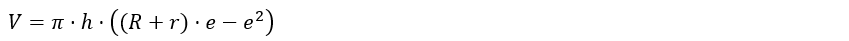

where H = height of the cone, R = basis radius, r = small radius and e = wall thickness

All other materials are estimated based on the reference 5 MW turbine modelled by Kouloumpis and Azapagic (2022) https://doi.org/10.1016/j.spc.2021.10.024


In [237]:
#Data from Kouloumis et Azapagic (2021) for a 5 MW Windturbine
R = 3 #m
r = 1.935 #m
e = 0.0163 #m

In [238]:
volume_tower_2=pi*hub_height*(R*e+r*e-e**2) #m3
density_tower_2=steel_ratio_tower_correc*STEEL_DENSITY_TOWER+alu_ratio_tower_correc*DENSITY_ALU+concrete_ratio_tower_correc*CONCRETE_DENSITY #kg/m3
mass_tower_tot_2=density_tower_2*volume_tower_2 #kg

In [239]:
mass_tower_steel_2=steel_ratio_tower_correc * mass_tower_tot_2         #kg
mass_tower_alu_2=alu_ratio_tower_correc * mass_tower_tot_2             #kg
mass_tower_concrete_2=concrete_ratio_tower_correc * mass_tower_tot_2   #kg
volume_tower_concrete_2=mass_tower_concrete_2 / CONCRETE_DENSITY       #m3

In [240]:
#If you need to do intermediate calculation with default values of parameters
from lca_algebraic.oie import intermediate_values_table
intermediate_values_table(dict(mass=mass_tower_tot_2)) #replace mass_tower_to-2 here

,formula,value
name,,
mass,0.08017481*hub_height*pi*(2710*aluminium_ratio...,253414.048829338


#### Tower

In [241]:
mass_tower_tot=mass_tower_steel+mass_tower_alu+mass_tower_concrete #kg
volume_tower_concrete=mass_tower_concrete / CONCRETE_DENSITY #m3

In [242]:
#We introduce an activity for the tower manufacturing
tower_manufacturing_MW = agb.newActivity(USER_DB,
                       "manufaturing of turbine tower per MW",
                       unit = "unit/MW",
                       phase = "phase 1 - manufacturing",
                       system_2="tower",
                               
                       exchanges = {
                           steel_mix:          mass_tower_steel/turbine_MW, 
                           aluminium_mix :     mass_tower_alu/turbine_MW ,                    
                           concrete_mix:       volume_tower_concrete/turbine_MW, #m3
                           
                           electricity_UCTE:  TOWER_ELECTRICITY_kWH_PER_MW, 
                           diesel_process:    TOWER_DIESEL_MJ_PER_MW,
                           district_heating:  TOWER_HEATING_MJ_PER_MW, 
                           welding_gas:       TOWER_WELDING_GAS_M_PER_MW,
                           fuel_oil_process:  TOWER_FUEL_OIL_MJ_PER_MW,
                           wastewater_treatment: TOWER_WASTEWATER_KG_PER_MW,
                           waste_unspecified: TOWER_WASTE_UNSPECIFIED_KG_PER_MW,
                           waste_hazardous:   TOWER_WASTE_HAZARDOUS_KG_PER_MW,
                           oil_waste:         TOWER_OIL_WASTE_KG_PER_MW,
                           
             }) 
agb.printAct(tower_manufacturing_MW)

manufaturing of turbine tower per MW (1.000000 unit/MW)  \
                                                                                                     input   
Concrete mix primary and recycled                               Concrete mix primary and recycled{FG}        
aluminium mix primary and recycled                             aluminium mix primary and recycled{FG}        
heat, non-market, at cogen 160kWe Jakobsberg, a...  heat, non-market, at cogen 160kWe Jakobsberg, ...        
market for diesel, burned in building machine           market for diesel, burned in building machine        
market for heavy fuel oil, burned in refinery f...  market for heavy fuel oil, burned in refinery ...        
market for welding, gas, steel                                         market for welding, gas, steel        
market group for electricity, medium voltage        market group for electricity, medium voltage[U...        
steel mix primary and recycled                                     steel mix primary and recycled{FG}        
treatment of hazardous waste, underground deposit   treatment of hazardous waste, underground depo...        
treatment of inert waste, inert material landfill   treatment of inert waste, inert material landf...        
treatment of waste mineral oil, hazardous waste...  treatment of waste mineral oil, hazardous wast...        
treatment of wastewater, average, capacity 1.6E...  treatment of wastewater, average, capacity 1.6...        

                                                                                           \
                                                                                   amount   
Concrete mix primary and recycled                   mass_tower_concrete/(2300*turbine_MW)   
aluminium mix primary and recycled                              mass_tower_alu/turbine_MW   
heat, non-market, at cogen 160kWe Jakobsberg, a...                               3.07e+03   
market for diesel, burned in building machine                                         855   
market for heavy fuel oil, burned in refinery f...                               1.37e+04   
market for welding, gas, steel                                                     0.0011   
market group for electricity, medium voltage                                     4.51e+03   
steel mix primary and recycled                                mass_tower_steel/turbine_MW   
treatment of hazardous waste, underground deposit                                    4.42   
treatment of inert waste, inert material landfill                                     610   
treatment of waste mineral oil, hazardous waste...                                  0.884   
treatment of wastewater, average, capacity 1.6E...                                    690   

                                                                   
                                                             unit  
Concrete mix primary and recycled                              m3  
aluminium mix primary and recycled                             kg  
heat, non-market, at cogen 160kWe Jakobsberg, a...      megajoule  
market for diesel, burned in building machine           megajoule  
market for heavy fuel oil, burned in refinery f...      megajoule  
market for welding, gas, steel                              meter  
market group for electricity, medium voltage        kilowatt hour  
steel mix primary and recycled                                 kg  
treatment of hazardous waste, underground deposit        kilogram  
treatment of inert waste, inert material landfill        kilogram  
treatment of waste mineral oil, hazardous waste...       kilogram  
treatment of wastewater, average, capacity 1.6E...    cubic meter

### Rotor

#### Obsolete masses calculation

For the activity created to model the rotor materials' manufacturing, 
the mass of glass fibre [in tons] is estimated using the following equation, provided by Bak et al (2013): https://backend.orbit.dtu.dk/ws/portalfiles/portal/55645274/The_DTU_10MW_Reference_Turbine_Christian_Bak.pdf

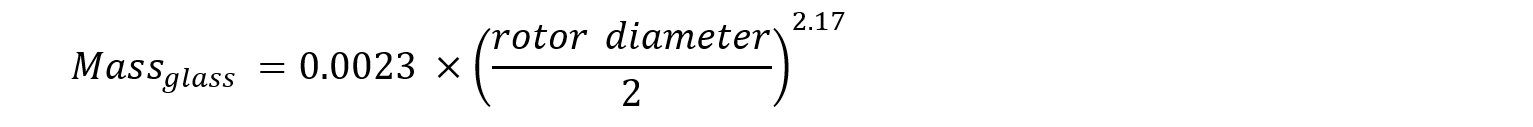
with the mass in ton, the rotor diameter in m, and 0.0023 in ton/m^2.17 

All other materials are estimated based on the reference 5 MW turbine modelled by Kouloumpis and Azapagic (2022): https://doi.org/10.1016/j.spc.2021.10.024


In [243]:
mass_glass_fibre_rotor_2=1000*0.0023*((rotor_diameter/2)**2.17)*3 #kg
# x1000 because the formula is in ton
# x3 because there are 3 blades

#### Rotor

In [244]:
mass_rotor_tot=mass_glass_fibre_rotor+POWER_REF_TURBINE_MW*(ROTOR_BLADES_EPOXY_kG_PER_MW+ROTOR_BLADES_WOOD_MIX_M3_PER_MW+ROTOR_BLADES_POLYPROPYLENE_KG_PER_MW+ROTOR_HUB_CAST_IRON_KG_PER_MW+ROTOR_HUB_CHROMIUM_STEEL_KG_PER_MW+ROTOR_HUB_STEEL_MIX_KG_PER_MW) #kg

In [245]:
#We introduce an activity for the rotor manufacturing

rotor_manufacturing_MW = agb.newActivity(USER_DB,
                       "manufacturing of rotor per MW",
                       unit = "unit/MW",
                       phase = "phase 1 - manufacturing",
                       system_2="rotor",

                       exchanges = {
                           glass_fibre:mass_glass_fibre_rotor/turbine_MW,
                           
                           epoxy: ROTOR_BLADES_EPOXY_kG_PER_MW,
                           wood_mix: ROTOR_BLADES_WOOD_MIX_M3_PER_MW, 
                           polypropylene: ROTOR_BLADES_POLYPROPYLENE_KG_PER_MW,
                           
                           water: (ROTOR_BLADES_WATER_KG_PER_MW + ROTOR_HUB_WATER_KG_PER_MW),
                           natural_gas: (ROTOR_BLADES_NATURAL_GAS_M3_PER_MW + ROTOR_HUB_NATURAL_GAS_M3_PER_MW) ,
                           electricity_UCTE: (ROTOR_BLADES_ELECTRICITY_kWH_PER_MW + ROTOR_HUB_ELECTRICITY_kWH_PER_MW),
                           district_heating: ROTOR_BLADES_HEATING_MJ_PER_MW,
                           cast_iron: ROTOR_HUB_CAST_IRON_KG_PER_MW,
                           chromium_steel: ROTOR_HUB_CHROMIUM_STEEL_KG_PER_MW,
                           steel_mix: ROTOR_HUB_STEEL_MIX_KG_PER_MW,
                           sand: ROTOR_HUB_SAND_KG_PER_MW,
                           
                       })
agb.printAct(rotor_manufacturing_MW)


manufacturing of rotor per MW (1.000000 unit/MW)  \
                                                                                                input   
heat, non-market, at cogen 160kWe Jakobsberg, a...  heat, non-market, at cogen 160kWe Jakobsberg, ...   
market for cast iron                                                             market for cast iron   
market for epoxy resin, liquid                                    market for epoxy resin, liquid[RER]   
market for glass fibre                                                         market for glass fibre   
market for natural gas, high pressure                       market for natural gas, high pressure[DE]   
market for polypropylene, granulate                               market for polypropylene, granulate   
market for silica sand                                                         market for silica sand   
market for steel, chromium steel 18/8                           market for steel, chromium steel 18/8   
market for tap water                                 market for tap water[Europe without Switzerland]   
market group for electricity, medium voltage        market group for electricity, medium voltage[U...   
sawnwood, paraná pine, dried (u=10%), import fr...  sawnwood, paraná pine, dried (u=10%), import f...   
steel mix primary and recycled                                     steel mix primary and recycled{FG}   

                                                                                       \
                                                                               amount   
heat, non-market, at cogen 160kWe Jakobsberg, a...                           9.26e+03   
market for cast iron                                                         5.47e+03   
market for epoxy resin, liquid                                               3.46e+03   
market for glass fibre                              mass_glass_fibre_rotor/turbine_MW   
market for natural gas, high pressure                                             990   
market for polypropylene, granulate                                               249   
market for silica sand                                                       4.75e+04   
market for steel, chromium steel 18/8                                        3.19e+03   
market for tap water                                                         1.87e+04   
market group for electricity, medium voltage                                 2.34e+04   
sawnwood, paraná pine, dried (u=10%), import fr...                               1.07   
steel mix primary and recycled                                               2.89e+03   

                                                                   
                                                             unit  
heat, non-market, at cogen 160kWe Jakobsberg, a...      megajoule  
market for cast iron                                     kilogram  
market for epoxy resin, liquid                           kilogram  
market for glass fibre                                   kilogram  
market for natural gas, high pressure                 cubic meter  
market for polypropylene, granulate                      kilogram  
market for silica sand                                   kilogram  
market for steel, chromium steel 18/8                    kilogram  
market for tap water                                     kilogram  
market group for electricity, medium voltage        kilowatt hour  
sawnwood, paraná pine, dried (u=10%), import fr...    cubic meter  
steel mix primary and recycled                                 kg

#### Nacelle

In [246]:
mass_nacelle_tot=POWER_REF_TURBINE_MW*(NACELLE_CAST_IRON_KG_PER_MW+NACELLE_STEEL_MIX_KG_PER_MW+NACELLE_CHROMIUM_STEEL_KG_PER_MW+NACELLE_STEEL_ELECTRIC_KG_PER_MW+NACELLE_COPPER_KG_PER_MW+NACELLE_ALUMINIUM_MIX_KG_PER_MW+NACELLE_POLYETHYLENE_KG_PER_MW) #kg

In [247]:
#We introduce an activity for the nacelle manufacturing

nacelle_manufacturing_MW = agb.newActivity(USER_DB,
                       "manufacturing of the nacelle per MW",
                       unit = "unit/MW",
                       phase = "phase 1 - manufacturing",
                       system_2="nacelle",

                       exchanges = {
                           cast_iron: NACELLE_CAST_IRON_KG_PER_MW, 
                           steel_mix: NACELLE_STEEL_MIX_KG_PER_MW, 
                           chromium_steel: NACELLE_CHROMIUM_STEEL_KG_PER_MW,
                           steel_electric :NACELLE_STEEL_ELECTRIC_KG_PER_MW,
                           copper: NACELLE_COPPER_KG_PER_MW,
                           aluminium_mix: NACELLE_ALUMINIUM_MIX_KG_PER_MW,
                           polyethylene_HD: NACELLE_POLYETHYLENE_KG_PER_MW,

                           electricity_UCTE: NACELLE_ELECTRICITY_UCTE_KWH_PER_MW,
                           natural_gas: NACELLE_NATURAL_GAS_MJ_PER_MW,
                           copper_process: NACELLE_COPPER_PROCESS_KG_PER_MW,
                           steel_process: NACELLE_STEEL_PROCESS_KG_PER_MW,
                           
                       })
agb.printAct(nacelle_manufacturing_MW)

manufacturing of the nacelle per MW (1.000000 unit/MW)  \
                                                                                                  input   
aluminium mix primary and recycled                           aluminium mix primary and recycled{FG}       
market for cast iron                                                           market for cast iron       
market for copper, cathode                                               market for copper, cathode       
market for natural gas, high pressure                     market for natural gas, high pressure[DE]       
market for polyethylene, high density, granulate   market for polyethylene, high density, granulate       
market for steel, chromium steel 18/8                         market for steel, chromium steel 18/8       
market group for electricity, medium voltage      market group for electricity, medium voltage[U...       
sheet rolling, steel                                                      sheet rolling, steel[RER]       
steel mix primary and recycled                                   steel mix primary and recycled{FG}       
steel production, electric, low-alloyed           steel production, electric, low-alloyed[Europe...       
wire drawing, copper                                                      wire drawing, copper[RER]       

                                                                          
                                                   amount           unit  
aluminium mix primary and recycled               1.12e+03             kg  
market for cast iron                              2.6e+04       kilogram  
market for copper, cathode                       2.42e+03       kilogram  
market for natural gas, high pressure            4.34e+03    cubic meter  
market for polyethylene, high density, granulate      290       kilogram  
market for steel, chromium steel 18/8            1.56e+03       kilogram  
market group for electricity, medium voltage     8.33e+03  kilowatt hour  
sheet rolling, steel                             5.32e+03       kilogram  
steel mix primary and recycled                   2.88e+04             kg  
steel production, electric, low-alloyed          2.84e+03       kilogram  
wire drawing, copper                             1.42e+03       kilogram

### Wind Turbine assembly

In [248]:
# We introduce an activity for the wind turbine that is composed of tower, rotor and nacelle

wind_turbine_manufacturing_MW = agb.newActivity(USER_DB,
                       "manufacturing of windturbine per MW",
                       unit = "unit/MW",
                       phase = "phase 1 - manufacturing",
                       system_1 = "windturbine",               
                       exchanges = {
                           tower_manufacturing_MW:1,
                           rotor_manufacturing_MW:1,
                           nacelle_manufacturing_MW:1
                          })

agb.printAct(wind_turbine_manufacturing_MW)

manufacturing of windturbine per MW (1.000000 unit/MW)  \
                                                                                      input   
manufacturing of rotor per MW                         manufacturing of rotor per MW{FG}       
manufacturing of the nacelle per MW             manufacturing of the nacelle per MW{FG}       
manufaturing of turbine tower per MW           manufaturing of turbine tower per MW{FG}       

                                                      
                                     amount     unit  
manufacturing of rotor per MW             1  unit/MW  
manufacturing of the nacelle per MW       1  unit/MW  
manufaturing of turbine tower per MW      1  unit/MW

### Inventory per kWh

To transform an activity per MW into an activity per kWh produced : we multiply per the total power installed capacity and we divide by the total electricty produced. 

In [249]:
#We introduce new activities with 1 kWh as the functional unit 

tower_manufacturing_kWh = agb.newActivity(USER_DB, 
                                       'manufacturing of tower per kwh electricity',
                                       unit = 'unit/kWh',
                                       phase = "phase 1 - manufacturing",
                                       system_2="tower",            
                                       exchanges = {
                                           tower_manufacturing_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                       })

rotor_manufacturing_kWh = agb.newActivity(USER_DB,
                                    'manufacturing of rotor per kwh electricity',
                                    unit = 'unit/kWh',
                                    phase = "phase 1 - manufacturing",
                                    system_2="rotor",
                                    exchanges = {
                                        rotor_manufacturing_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

nacelle_manufacturing_kWh = agb.newActivity(USER_DB,
                                    'manufacturing of nacelle per kwh electricity',
                                    unit = 'unit/kWh',
                                    phase = "phase 1 - manufacturing",
                                    system_2="nacelle",
                                    exchanges = {
                                        nacelle_manufacturing_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

wind_turbine_manufacturing_kWh = agb.newActivity(USER_DB,
                                    'manufacturing of wind turbine per kwh electricity',
                                     unit = 'unit/kWh',
                                     phase = "phase 1 - manufacturing",
                                     system_1="windturbine",

                                     exchanges = {
                                       tower_manufacturing_kWh:1,
                                       rotor_manufacturing_kWh:1,
                                       nacelle_manufacturing_kWh:1
                                    })

### LCA RESULT: climate change impacts of wind turbine manufacturing
As most of the impacts come from manufacturing step, we do intermediate calculation to visualise the climate change impact due to manufacturing of each subsystem.
Impacts are calculated 
* per MW of installed capacity
* per kWh of electricity produced

#### Per MW of installed capacity

In [250]:
#Climate change impact per installed MW
agb.multiLCAAlgebric(
                    [tower_manufacturing_MW,
                     rotor_manufacturing_MW,
                     nacelle_manufacturing_MW,
                     wind_turbine_manufacturing_MW,
                    ],
                impacts_EF_CO2,
                )

Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'turbine_MW' was missing, replacing by default value : 5


,climate change - global warming potential (GWP100)[kg CO2-Eq]
manufaturing of turbine tower per MW,4.35e+04
manufacturing of rotor per MW,8.05e+04
manufacturing of the nacelle per MW,1.14e+05
manufacturing of windturbine per MW,2.38e+05


In [251]:
#We can also use the function multiLCAAlgebraic with the "axis" fonction 
agb.multiLCAAlgebric(
                    [wind_turbine_manufacturing_MW],
                impacts_EF_CO2,
                axis="system_2"
)

Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'turbine_MW' was missing, replacing by default value : 5


,climate change - global warming potential (GWP100)[kg CO2-Eq]
system_2,
None,0
tower,4.35e+04
rotor,8.05e+04
nacelle,1.14e+05


#### Per kWh of electricity produced

In [252]:
#Climate change impact per kWh produced
agb.multiLCAAlgebric([tower_manufacturing_kWh, 
                      rotor_manufacturing_kWh, 
                      nacelle_manufacturing_kWh,
                      wind_turbine_manufacturing_kWh], 
                 impacts_EF_CO2,
                )

Required param 'availability' was missing, replacing by default value : 1
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'life_time' was missing, replacing by default value : 20
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'availability' was missing, replacing by default value : 1
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'life_time' was missing, replacing by default value : 20
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'availability' was missing, replacing by default value : 1
Required param 'load_rate' was missing, replacing by default value : 0.4
Required 

,climate change - global warming potential (GWP100)[kg CO2-Eq]
manufacturing of tower per kwh electricity,0.000621
manufacturing of rotor per kwh electricity,0.00115
manufacturing of nacelle per kwh electricity,0.00162
manufacturing of wind turbine per kwh electricity,0.00339


In [253]:
#We can also use the function multiLCAAlgebraic with the "axis" fonction 
agb.multiLCAAlgebric(
                    [wind_turbine_manufacturing_MW],
                impacts_EF_CO2,
                axis="system_2"
                )

Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'turbine_MW' was missing, replacing by default value : 5


,climate change - global warming potential (GWP100)[kg CO2-Eq]
system_2,
None,0
tower,4.35e+04
rotor,8.05e+04
nacelle,1.14e+05


## Wind turbine foundation

Both fixed and floating foundations are included in the current version of LIF-OWI parameterized modeled.

Among fixed foundations, three types are available: ground-based, monopile and tripodal.
Currently, the default type of fixed foundation (ground-based, monopile or tripodal) only depends on the water depth, which varies as follows:

- Gravity-based foundation: if water_depth<=15 m (low priority based on feedback from LIF-OWI partners)
- Monopile foundation: if 15<water_depth<=40 m
- Tripodal: if water_depth>40 m

This assumption may be changed in future versions of the parameterized models depending on feedback from LIF-OWI industrial partners.

The floating foundation is assumed to be a steel-based technology.

Data for all the foundation options are based on [Tsai et al. 2016](https://onlinelibrary.wiley.com/doi/10.1111/jiec.12400)


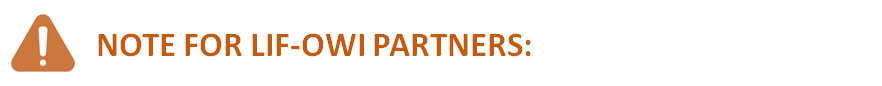
Please, check in section 5.2.2. on the criteria for the foundation selection and suggest changes if needed

### Reference foundation for 3 MW turbine (Tsai et al 2016)

In [254]:
# Reference values for different foundation types comme from Tsai et al 2016

FOUNDATION_REF_POWER_MW = 3

#Reference: fixed gravity-based foundation at water depth of 15 meters as the base case (Tsai et al, 2016, SI)
FOUNDATION_GBF_STEEL_REINFORCING_KG_PER_MW = 336000 /FOUNDATION_REF_POWER_MW  #kg/MW
FOUNDATION_GBF_CONCRETE_M3_PER_MW = 1027/FOUNDATION_REF_POWER_MW              #m3/MW   #we don't divide by concrete density as the data is already in m3
FOUNDATION_GBF_CONCRETE_KG_PER_MW = FOUNDATION_GBF_CONCRETE_M3_PER_MW*CONCRETE_DENSITY #kg/MW
FOUNDATION_GBF_GRAVEL_KG_PER_MW = 12200000/FOUNDATION_REF_POWER_MW            #kg/MW
MASS_FOUNDATION_GBF_KG_PER_MW = FOUNDATION_GBF_STEEL_REINFORCING_KG_PER_MW + FOUNDATION_GBF_CONCRETE_KG_PER_MW + FOUNDATION_GBF_GRAVEL_KG_PER_MW  #kg/MW

#Reference: monopile fixed foundation at water depth of 20 meters as the base case (Tsai et al, 2016, SI)
FOUNDATION_MONOPILE_STEEL_MIX_KG_PER_MW = (276000+169500)/FOUNDATION_REF_POWER_MW                 #kg/MW
FOUNDATION_MONOPILE_STEEL_PROCESS_KG_PER_MW = FOUNDATION_MONOPILE_STEEL_MIX_KG_PER_MW             #kg/MW
FOUNDATION_MONOPILE_CONCRETE_KG_PER_MW = 21300/FOUNDATION_REF_POWER_MW                            #kg/MW
FOUNDATION_MONOPILE_CONCRETE_M3_PER_MW = FOUNDATION_MONOPILE_CONCRETE_KG_PER_MW/CONCRETE_DENSITY  #m3/MW  
MASS_FOUNDATION_MONOPILE_KG_PER_MW = FOUNDATION_MONOPILE_STEEL_MIX_KG_PER_MW+FOUNDATION_MONOPILE_CONCRETE_KG_PER_MW #kg/MW

#Reference: tripod fixed foundation at water depth of 35 meters as the base case (Tsai et al, 2016, SI)
FOUNDATION_TRIPOD_STEEL_MIX_KG_PER_MW = (807000+847000)/FOUNDATION_REF_POWER_MW                           #kg/MW
FOUNDATION_TRIPOD_STEEL_PROCESS_KG_PER_MW = FOUNDATION_TRIPOD_STEEL_MIX_KG_PER_MW                         #kg/MW
FOUNDATION_TRIPOD_CONCRETE_KG_PER_MW = 63900/FOUNDATION_REF_POWER_MW                                      #kg/MW
FOUNDATION_TRIPOD_CONCRETE_M3_PER_MW = FOUNDATION_MONOPILE_CONCRETE_KG_PER_MW/CONCRETE_DENSITY            #m3/MW
MASS_FOUNDATION_TRIPOD_KG_PER_MW = FOUNDATION_TRIPOD_STEEL_MIX_KG_PER_MW+FOUNDATION_MONOPILE_CONCRETE_KG_PER_MW #kg/MW

#Reference: floating foundation (Tsai et al, 2016, SI, based on Weinzettel et al, 2008)
FOUNDATION_FLOATING_STEEL_MIX_KG_PER_MW = (1000000+(5000*3))/FOUNDATION_REF_POWER_MW  #kg/MW # 5000 kg is x 3 as we consider there are 3 anchors
FOUNDATION_FLOATING_STEEL_PROCESS_KG_PER_MW = 1000000/FOUNDATION_REF_POWER_MW         #kg/MW
FOUNDATION_FLOATING_GRAVEL_KG_PER_MW = 2500000/FOUNDATION_REF_POWER_MW                #kg/MW
MASS_FOUNDATION_FLOATING_KG_PER_MW = FOUNDATION_FLOATING_STEEL_MIX_KG_PER_MW+FOUNDATION_FLOATING_GRAVEL_KG_PER_MW  #kg/MW

#voir option: acier, beton ou sparr

### Foundation activity

In [255]:
#we introduce an activity for fixed gravity-based foundation at water depth of 15 meters
foundations_gbf_manufacturing_MW = agb.newActivity(USER_DB,
                                "manufacturing of gravity based foundations at depth 15m per MW",
                                 unit = "unit/MW",
                                 phase = "phase 1 - manufacturing",
                                 system_1 = "foundations",
                                exchanges = {
                                    steel_reinforcing:FOUNDATION_GBF_STEEL_REINFORCING_KG_PER_MW,
                                    concrete: FOUNDATION_GBF_CONCRETE_M3_PER_MW,
                                    gravel: FOUNDATION_GBF_GRAVEL_KG_PER_MW,
                                })

In [256]:
#We introduce an activity for monopile fixed foundation at water depth of 20 meters

foundations_monopile_manufacturing_MW = agb.newActivity(USER_DB,
                                      "manufacturing of monopile foundations at depth 20m per MW",
                                      unit = 'unit/MW',
                                      phase = "phase 1 - manufacturing",
                                      system_1 = "foundations",
                                      exchanges = {
                                          steel_mix: FOUNDATION_MONOPILE_STEEL_MIX_KG_PER_MW,
                                          concrete: FOUNDATION_MONOPILE_CONCRETE_M3_PER_MW,
                                          steel_process : FOUNDATION_MONOPILE_STEEL_PROCESS_KG_PER_MW                                          
                                      })

In [257]:
foundations_tripod_manufacturing_MW = agb.newActivity(USER_DB,
                                   'manufacturing of tripod foundations at depth 35 m per MW',
                                   unit = 'unit/MW',
                                   phase = "phase 1 - manufacturing",
                                   system_1 = "foundations",
                                   exchanges = {
                                       steel_mix:      FOUNDATION_TRIPOD_STEEL_MIX_KG_PER_MW,
                                       steel_process : FOUNDATION_TRIPOD_STEEL_PROCESS_KG_PER_MW,
                                       concrete:       FOUNDATION_TRIPOD_CONCRETE_M3_PER_MW,
                                   })

In [258]:
foundations_floating_manufacturing_MW = agb.newActivity(USER_DB,
                                     'manufacturing of floating foundations per MW',
                                     unit ='unit/MW',
                                     exchanges = {
                                         steel_mix: FOUNDATION_FLOATING_STEEL_MIX_KG_PER_MW,
                                         steel_process: FOUNDATION_FLOATING_STEEL_PROCESS_KG_PER_MW,
                                         gravel: FOUNDATION_FLOATING_GRAVEL_KG_PER_MW,    
                                     })


In [259]:
volume_concrete_personalised_foundations=mass_concrete_personalised_foundations/CONCRETE_DENSITY
mass_personalised_foundations_tot=mass_steel_personalised_foundations+mass_concrete_personalised_foundations+mass_gravel_personalised_foundations    

In [260]:
foundations_personalised_manufacturing_MW = agb.newActivity(USER_DB,
                                     'manufacturing of personalised foundations per MW',
                                     unit ='unit/MW',
                                     phase = "phase 1 - manufacturing",
                                     system_1 = "foundations",
                                     exchanges = {
                                         steel_mix: mass_steel_personalised_foundations/turbine_MW,
                                         steel_process: mass_steel_personalised_foundations/turbine_MW,
                                         concrete: volume_concrete_personalised_foundations/turbine_MW,
                                         gravel: mass_gravel_personalised_foundations/turbine_MW,    
                                     })

In [261]:
#We introduce an activity for the manufacturing of foundations according to the type of foundations selected
foundations_manufacturing_MW = agb.newSwitchAct(USER_DB,
                            "manufacturing of foundations per MW",                                      
                            foundations_type,
                            {
                                 "gbf": foundations_gbf_manufacturing_MW,
                                 "monopod": foundations_monopile_manufacturing_MW ,
                                 "tripod": foundations_tripod_manufacturing_MW,
                                 "floating":foundations_floating_manufacturing_MW,
                                 "personalised":foundations_personalised_manufacturing_MW,
                            })

In [262]:
#To do : 
#This parameter is currently not used in the model. Either delete, either link it with foundation inventories
water_depth = agb.newFloatParam(
    "water_depth",
    default = 20, min = 10, max = 300,
    group="9. Site specific",
    label="the water depth of the wind farm site",
    unit="m")

### Inventory per kWh

In [263]:
#We introduce new activities with 1 kWh as the functional unit
foundations_gbf_manufacturing_kWh = agb.newActivity(USER_DB, 
                                      'manufacturing of foundations gbf per kwh electricity',
                                       unit = 'unit/kWh',
                                       phase = "phase 1 - manufacturing",
                                       system_1 = "foundations",
                                       exchanges = {
                                           foundations_gbf_manufacturing_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                       })

foundations_monopile_manufacturing_kWh = agb.newActivity(USER_DB,
                                    'manufacturing of foundations_monopile per kwh electricity',
                                     unit = 'unit\kwh',
                                     phase = "phase 1 - manufacturing",
                                     system_1 = "foundations",
                                     exchanges = {
                                        foundations_monopile_manufacturing_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

foundations_tripod_manufacturing_kWh = agb.newActivity(USER_DB,
                                    'manufacturing of foundations_tripod per kwh electricity',
                                     unit = 'unit\kwh', 
                                     phase = "phase 1 - manufacturing",
                                     system_1 = "foundations",
                                     exchanges = {
                                        foundations_tripod_manufacturing_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

foundations_floating_manufacturing_kWh = agb.newActivity(USER_DB,
                                    'manufacturing of foundations_floating per kwh electricity',
                                     unit = 'unit\kwh',
                                     phase = "phase 1 - manufacturing",
                                     system_1 = "foundations",
                                     exchanges = {
                                        foundations_floating_manufacturing_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

foundations_personalised_manufacturing_kWh = agb.newActivity(USER_DB,
                                    'manufacturing of personalised foundations per kwh electricity',
                                     unit = 'unit\kwh',
                                     phase = "phase 1 - manufacturing",
                                     system_1 = "foundations",
                                     exchanges = {
                                        foundations_personalised_manufacturing_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

foundations_manufacturing_kWh = agb.newActivity(USER_DB,
                                    'manufacturing of foundations per kwh electricity',
                                     unit = 'unit\kwh',
                                     phase = "phase 1 - manufacturing",
                                     system_1 = "foundations",
                                     exchanges = {
                                        foundations_manufacturing_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

### LCA RESULT: Climate change impacts of foundation manufacturing

In [264]:
#Climate change impacts per installed MW
agb.multiLCAAlgebric(
                [foundations_gbf_manufacturing_MW,
                 foundations_monopile_manufacturing_MW,
                 foundations_tripod_manufacturing_MW,
                 foundations_floating_manufacturing_MW,
                 foundations_personalised_manufacturing_MW], 
                 impacts_EF_CO2,
                )

Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'turbine_MW' was missing, replacing by default value : 5


,climate change - global warming potential (GWP100)[kg CO2-Eq]
manufacturing of gravity based foundations at depth 15m per MW,3.43e+05
manufacturing of monopile foundations at depth 20m per MW,1.64e+05
manufacturing of tripod foundations at depth 35 m per MW,6.08e+05
manufacturing of floating foundations per MW,3.76e+05
manufacturing of personalised foundations per MW,1.64e+05


In [265]:
#Climate change impacts per kWh produced
agb.multiLCAAlgebric([foundations_gbf_manufacturing_kWh, 
                      foundations_monopile_manufacturing_kWh, 
                      foundations_tripod_manufacturing_kWh,
                      foundations_floating_manufacturing_kWh], 
                 impacts_EF_CO2 
                )

Required param 'availability' was missing, replacing by default value : 1
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'life_time' was missing, replacing by default value : 20
Required param 'availability' was missing, replacing by default value : 1
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'life_time' was missing, replacing by default value : 20
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'availability' was missing, replacing by default value : 1
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'life_time' was missing, replacing by default value : 20
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'availability' was missing, replacing by default value : 1
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'life

,climate change - global warming potential (GWP100)[kg CO2-Eq]
manufacturing of foundations gbf per kwh electricity,0.00489
manufacturing of foundations_monopile per kwh electricity,0.00235
manufacturing of foundations_tripod per kwh electricity,0.00867
manufacturing of foundations_floating per kwh electricity,0.00537


## Wind farm inter-array cables

### Reference data for inter-array cables (RTE 2021)

The data used for modeling of inter-array cables are taken from : 
* Kouloumpis et Azapagic 2022 (33 kV cables, 500 mm2 conductor section)
* Prysmian Group study "66 kV Submarine Cable Systems FOR OFFSHORE WIND" (66 kV cables, 800 mm2 conductor section)
* Evea & RTE study "ANALYSE DE CYCLE DE VIE D’UNE LIAISON SOUS-MARINE" (December 2021)

The cables inventories are lineic (per km of cables)

In [266]:
# From Kouloumpis and Azapagic (2022) : 33 kV cables, 500 mm2 conductor section, 27 km cables

INTERARRAY_REF_POWER_MW = 5 #MW
INTERARRAY_REF_LENGTH_KM = 27 #km

#Interarray cable - Fixed installation
INTERARRAY_CABLE_FIXED_ZINC_PROCESS_M2_PER_MW = 12064.823 /INTERARRAY_REF_POWER_MW   #m2/MW
INTERARRAY_CABLE_FIXED_ELECTRICITY_UCTE_KWH_PER_MW = 1105552.800/n_turbines/INTERARRAY_REF_POWER_MW #kWh/MW
INTERARRAY_CABLE_FIXED_HEAT_MJ_PER_MW = 7551331.92/n_turbines/INTERARRAY_REF_POWER_MW #MJ/MW

#Interarray cable - Floating installation
INTERARRAY_CABLE_FLOATING_ZINC_PROCESS_M2_PER_MW = 12064.823 /n_turbines/INTERARRAY_REF_POWER_MW  #m2/MW
INTERARRAY_CABLE_FLOATING_ELECTRICITY_UCTE_KWH_PER_MW = 1105552.800/n_turbines/INTERARRAY_REF_POWER_MW #kWh/MW
INTERARRAY_CABLE_FLOATING_HEAT_MJ_PER_MW = 7551331.92/n_turbines/INTERARRAY_REF_POWER_MW #MJ/MW

In [267]:
# We introduce fixed VALUES. 
INTERARRAY_CABLE_DIAMETER = 170 #mm      (source : Prysmian group study, 66 kV cables)
INTERARRAY_CABLE_RADIUS = 0.001*INTERARRAY_CABLE_DIAMETER/2    #m 

In [268]:
# From Kouloumpis and Azapagic (2022)

INTERARRAY_REF_POWER_MW = 5 #MW

#Interarray cable - Fixed installation
INTERARRAY_CABLE_FIXED_ZINC_PROCESS_M2_PER_MW = 12064.823 /n_turbines/INTERARRAY_REF_POWER_MW   #m2/MW
INTERARRAY_CABLE_FIXED_ELECTRICITY_UCTE_KWH_PER_MW = 1105552.800/n_turbines/INTERARRAY_REF_POWER_MW #kWh/MW
INTERARRAY_CABLE_FIXED_HEAT_MJ_PER_MW = 7551331.92/n_turbines/INTERARRAY_REF_POWER_MW #MJ/MW

#Interarray cable - Floating installation
INTERARRAY_CABLE_FLOATING_ZINC_PROCESS_M2_PER_MW = 12064.823 /n_turbines/INTERARRAY_REF_POWER_MW  #m2/MW
INTERARRAY_CABLE_FLOATING_ELECTRICITY_UCTE_KWH_PER_MW = 1105552.800/n_turbines/INTERARRAY_REF_POWER_MW #kWh/MW
INTERARRAY_CABLE_FLOATING_HEAT_MJ_PER_MW = 7551331.92/n_turbines/INTERARRAY_REF_POWER_MW #MJ/MW

### Inter-array cables activity

In [269]:
copper_ratio_intcable = agb.newFloatParam(
    'copper_ratio_intcable',
    default = 0.33, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the copper mass ratio in interarray cable')

In [270]:
lead_ratio_intcable = agb.newFloatParam(
    'lead_ratio_intcable',
    default = 0.25, min = 0, max=1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the lead mass ratio in interarray cable')

In [271]:
steel_ratio_intcable = agb.newFloatParam(
    'steel_ratio_intcable',
    default = 0.33, min = 0, max=1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the steel mass ratio in interarray cable')

In [272]:
HDPE_ratio_intcable = agb.newFloatParam(
    'HDPE_ratio_intcable',
    default = 0.06, min = 0, max=1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the high density polyehtylene mass ratio in interarray cable')

In [273]:
PP_ratio_intcable = agb.newFloatParam(
    'PP_ratio_intcable',
    default = 0.06, min = 0, max=1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the polypropylene mass ratio in interarray cable')

In [274]:
#Correction in case copper_ratio_intcable + lead_ratio_intcable + steel_ratio_intcable + HDPE_ratio_intcable >1:
copper_ratio_intcable_correc=(copper_ratio_intcable)/(copper_ratio_intcable+lead_ratio_intcable+steel_ratio_intcable+HDPE_ratio_intcable+PP_ratio_intcable)
lead_ratio_intcable_correc=(lead_ratio_intcable)/(copper_ratio_intcable+lead_ratio_intcable+steel_ratio_intcable+HDPE_ratio_intcable+PP_ratio_intcable)
steel_ratio_intcable_correc=(steel_ratio_intcable)/(copper_ratio_intcable+lead_ratio_intcable+steel_ratio_intcable+HDPE_ratio_intcable+PP_ratio_intcable)
HDPE_ratio_intcable_correc=(HDPE_ratio_intcable)/(copper_ratio_intcable+lead_ratio_intcable+steel_ratio_intcable+HDPE_ratio_intcable+PP_ratio_intcable)
PP_ratio_intcable_correc=(PP_ratio_intcable)/(copper_ratio_intcable+lead_ratio_intcable+steel_ratio_intcable+HDPE_ratio_intcable+PP_ratio_intcable)

In [275]:
#We calculate the density of cables according to the mass ratio of each material
interarray_cable_density=steel_ratio_intcable_correc * DENSITY_STEEL+copper_ratio_intcable_correc * DENSITY_COPPER+lead_ratio_intcable_correc * DENSITY_LEAD+ HDPE_ratio_intcable_correc * DENSITY_HDPE + PP_ratio_intcable_correc * DENSITY_PP
#kg/m3

We assume the number of inter-array cables equals to the number of turbines minus 1. 

In [276]:
interarray_cables_number=n_turbines-1 #unit

In our modelisation, the mathematic formula for calculating the **length of the inter-array cables** depends if the **foundations are fixed or floating**. 
* For fixed cases, the length of cable between two turbines is equal to (8.5 * rotor diameter)
* For floating case, the length of the cable between two turbines is equal to (4 * water depth + 8.5 * rotor diameter)

These equations were given by France Energies Marines (source to be specified). 

#### Inter-array cables for fixed foundations

In [277]:
#FIXED foundations
#We introduce intermediate calculation for calculating the length, volume and mass of cables
interarray_1cable_length_fixed= 8.5 * rotor_diameter #m
length_intcables_fixed_tot=interarray_cables_number*interarray_1cable_length_fixed #m
interarray_1cable_volume_fixed=pi*(INTERARRAY_CABLE_RADIUS)**2*interarray_1cable_length_fixed #m3
interarray_1cable_mass_fixed=interarray_cable_density*interarray_1cable_volume_fixed #kg
mass_intcables_fixed_tot=interarray_cables_number*interarray_1cable_mass_fixed #kg

In [278]:
#We introduce intermediate calculation for calculating the masses of each material within cables
mass_intcables_fixed_steel=steel_ratio_intcable_correc * mass_intcables_fixed_tot    #kg
mass_intcables_fixed_copper=copper_ratio_intcable_correc * mass_intcables_fixed_tot  #kg
mass_intcables_fixed_lead=lead_ratio_intcable_correc * mass_intcables_fixed_tot      #kg
mass_intcables_fixed_HDPE=HDPE_ratio_intcable_correc * mass_intcables_fixed_tot      #kg
mass_intcables_fixed_PP=PP_ratio_intcable_correc * mass_intcables_fixed_tot          #kg

In [279]:
# We introduce an activity for inter-array cable in the case of fixed foundations
interarray_cables_fixed_manufacturing_MW = agb.newActivity( USER_DB,
                       "manufacturing of fixed inter-array cables per MW ",
                       unit = "unit/MW",
                       phase = "phase 1 - manufacturing",
                       system_1 = "inter-array cables",
                       exchanges = {
                           steel_mix: mass_intcables_fixed_steel/power_tot_farm_MW,
                           copper: mass_intcables_fixed_copper/power_tot_farm_MW,
                           lead : mass_intcables_fixed_lead/power_tot_farm_MW,
                           polyethylene_HD : mass_intcables_fixed_HDPE/power_tot_farm_MW ,
                           polypropylene : mass_intcables_fixed_PP /power_tot_farm_MW  ,
                           
                           zinc_process : INTERARRAY_CABLE_FIXED_ZINC_PROCESS_M2_PER_MW, #12064,823m2 corresponds to a farm composed of 30 turbines of 5 MW in Kouloumpis and Azapagic. I don't know why dividing by 27000 and 5MW
                           electricity_UCTE: INTERARRAY_CABLE_FIXED_ELECTRICITY_UCTE_KWH_PER_MW, #1105552.800kWh corresponds to a farm composed of 30 turbines of 5 MW. I don't know why dividing by 27000 and 5MW
                           heat: INTERARRAY_CABLE_FIXED_HEAT_MJ_PER_MW, #755133.93kWh corresponds to a farm composed of 30 turbines of 5 MW. I don't know why dividing by 27000 and 5MW
                       })
agb.printAct(interarray_cables_fixed_manufacturing_MW)

manufacturing of fixed inter-array cables per MW  (1.000000 unit/MW)  \
                                                                                                                  input   
heat production, natural gas, at industrial fur...  heat production, natural gas, at industrial fu...                     
market for copper, cathode                                                 market for copper, cathode                     
market for lead                                                                       market for lead                     
market for polyethylene, high density, granulate     market for polyethylene, high density, granulate                     
market for polypropylene, granulate                               market for polypropylene, granulate                     
market group for electricity, medium voltage        market group for electricity, medium voltage[U...                     
steel mix primary and recycled                                     steel mix primary and recycled{FG}                     
zinc coating, coils                                                          zinc coating, coils[RER]                     

                                                                                                       \
                                                                                               amount   
heat production, natural gas, at industrial fur...                             1510266.384/n_turbines   
market for copper, cathode                          0.0614125*pi*copper_ratio_intcable*rotor_diame...   
market for lead                                     0.0614125*pi*lead_ratio_intcable*rotor_diamete...   
market for polyethylene, high density, granulate    0.0614125*pi*HDPE_ratio_intcable*rotor_diamete...   
market for polypropylene, granulate                 0.0614125*pi*PP_ratio_intcable*rotor_diameter*...   
market group for electricity, medium voltage                                     221110.56/n_turbines   
steel mix primary and recycled                      0.0614125*pi*rotor_diameter*steel_ratio_intcab...   
zinc coating, coils                                                              2412.9646/n_turbines   

                                                                   
                                                             unit  
heat production, natural gas, at industrial fur...      megajoule  
market for copper, cathode                               kilogram  
market for lead                                          kilogram  
market for polyethylene, high density, granulate         kilogram  
market for polypropylene, granulate                      kilogram  
market group for electricity, medium voltage        kilowatt hour  
steel mix primary and recycled                                 kg  
zinc coating, coils                                  square meter

#### Inter-array cables for floating foundations

In [280]:
#FLOATING foundations
#We introduce intermediate calculation for calculating the length, volume and mass of cables
interarray_1cable_length_float=4* water_depth + 8.5 * rotor_diameter #m
length_intcables_float_tot=interarray_cables_number*interarray_1cable_length_float #m
interarray_1cable_volume_float=pi*(INTERARRAY_CABLE_RADIUS)**2*interarray_1cable_length_float #m3
interarray_1cable_mass_float=interarray_cable_density*interarray_1cable_volume_float #kg
mass_intcables_float_tot=interarray_cables_number*interarray_1cable_mass_float #kg

In [281]:
#We introduce intermediate calculation for calculating the masses of each material within cables
mass_intcables_float_steel=steel_ratio_intcable_correc * mass_intcables_float_tot   #kg
mass_intcables_float_copper=copper_ratio_intcable_correc * mass_intcables_float_tot #kg
mass_intcables_float_lead=lead_ratio_intcable_correc * mass_intcables_float_tot     #kg
mass_intcables_float_HDPE=HDPE_ratio_intcable_correc * mass_intcables_float_tot     #kg
mass_intcables_float_PP=PP_ratio_intcable_correc * mass_intcables_float_tot         #kg

In [282]:
# We introduce an activity for inter-array cable in the case of floating foundations
interarray_cables_floating_manufacturing_MW = agb.newActivity( USER_DB,
                       "manufacturing of floating inter-array cables per MW installed",
                       unit = "unit/MW",
                       phase = "phase 1 - manufacturing",
                       system_1 = "inter-array cables",
                       exchanges = {
                           steel_mix: mass_intcables_float_steel/power_tot_farm_MW,
                           copper: mass_intcables_float_copper/power_tot_farm_MW,
                           lead : mass_intcables_float_lead/power_tot_farm_MW,
                           polyethylene_HD : mass_intcables_float_HDPE/power_tot_farm_MW ,
                           polypropylene : mass_intcables_float_PP/power_tot_farm_MW  ,
                           
                           zinc_process : INTERARRAY_CABLE_FLOATING_ZINC_PROCESS_M2_PER_MW,
                           electricity_UCTE: INTERARRAY_CABLE_FLOATING_ELECTRICITY_UCTE_KWH_PER_MW,
                           heat: INTERARRAY_CABLE_FLOATING_HEAT_MJ_PER_MW,
                       })
agb.printAct(interarray_cables_floating_manufacturing_MW)


manufacturing of floating inter-array cables per MW installed (1.000000 unit/MW)  \
                                                                                                                              input   
heat production, natural gas, at industrial fur...  heat production, natural gas, at industrial fu...                                 
market for copper, cathode                                                 market for copper, cathode                                 
market for lead                                                                       market for lead                                 
market for polyethylene, high density, granulate     market for polyethylene, high density, granulate                                 
market for polypropylene, granulate                               market for polypropylene, granulate                                 
market group for electricity, medium voltage        market group for electricity, medium voltage[U...                                 
steel mix primary and recycled                                     steel mix primary and recycled{FG}                                 
zinc coating, coils                                                          zinc coating, coils[RER]                                 

                                                                                                       \
                                                                                               amount   
heat production, natural gas, at industrial fur...                             1510266.384/n_turbines   
market for copper, cathode                          0.007225*pi*copper_ratio_intcable*(n_turbines ...   
market for lead                                     0.007225*pi*lead_ratio_intcable*(n_turbines - ...   
market for polyethylene, high density, granulate    0.007225*pi*HDPE_ratio_intcable*(n_turbines - ...   
market for polypropylene, granulate                 0.007225*pi*PP_ratio_intcable*(n_turbines - 1)...   
market group for electricity, medium voltage                                     221110.56/n_turbines   
steel mix primary and recycled                      0.007225*pi*steel_ratio_intcable*(n_turbines -...   
zinc coating, coils                                                              2412.9646/n_turbines   

                                                                   
                                                             unit  
heat production, natural gas, at industrial fur...      megajoule  
market for copper, cathode                               kilogram  
market for lead                                          kilogram  
market for polyethylene, high density, granulate         kilogram  
market for polypropylene, granulate                      kilogram  
market group for electricity, medium voltage        kilowatt hour  
steel mix primary and recycled                                 kg  
zinc coating, coils                                  square meter

In [283]:
# We introduce an activity for inter-array cable based on the boolean parameters fixed / floating foundations.
interarray_cables_manufacturing_MW = agb.newActivity (USER_DB, 
                                       "manufacturing of inter-array cables per MW",
                                       unit = "unit/MW",
                                       phase = "phase 1 - manufacturing",
                                       system_1 = "inter-array cables",
                                       exchanges = {
                                           interarray_cables_fixed_manufacturing_MW:fixed_foundations,
                                           interarray_cables_floating_manufacturing_MW:floating_foundations,
                                       })
agb.printAct(interarray_cables_manufacturing_MW)

manufacturing of inter-array cables per MW (1.000000 unit/MW)  \
                                                                                                           input   
manufacturing of fixed inter-array cables per MW    manufacturing of fixed inter-array cables per ...              
manufacturing of floating inter-array cables pe...  manufacturing of floating inter-array cables p...              

                                                                           \
                                                                   amount   
manufacturing of fixed inter-array cables per MW        fixed_foundations   
manufacturing of floating inter-array cables pe...  1 - fixed_foundations   

                                                             
                                                       unit  
manufacturing of fixed inter-array cables per MW    unit/MW  
manufacturing of floating inter-array cables pe...  unit/MW

### Inventory per kWh

In [284]:
#We introduce new activities with 1 kWh as the functional unit 
interarray_cables_fixed_manufacturing_kWh = agb.newActivity(USER_DB, 
                                       'manufacturing of interarray_cables with fixed foundations per kwh electricity',
                                       unit = 'unit/kWh',
                                       phase = "phase 1 - manufacturing",
                                       system_1 = "inter-array cables",
                                       exchanges = {
                                           interarray_cables_fixed_manufacturing_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                       })

interarray_cables_floating_manufacturing_kWh = agb.newActivity(USER_DB, 
                                       'manufacturing of interarray_cables with floating foundations per kwh electricity',
                                       unit = 'unit/kWh',
                                       phase = "phase 1 - manufacturing",
                                       system_1 = "inter-array cables",
                                       exchanges = {
                                           interarray_cables_floating_manufacturing_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                       })

interarray_cables_manufacturing_kWh = agb.newActivity(USER_DB, 
                                       'manufacturing of interarray cables per kwh electricity',
                                       unit = 'unit/kWh',
                                       exchanges = {
                                           interarray_cables_manufacturing_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                       })

### LCA RESULT: climate change impacts of inter-array cables manufacturing

In [285]:
#Climate change impact per installed MW
agb.multiLCAAlgebric(
    [interarray_cables_fixed_manufacturing_MW,
     interarray_cables_floating_manufacturing_MW],            
    impacts_EF_CO2
                )

Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'rotor_diameter' was missing, replacing by default value : 128
Required param 'PP_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'copper_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'HDPE_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'n_turbines' was missing, replacing by default value : 30
Required param 'lead_ratio_intcable' was missing, replacing by default value : 0.25
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'steel_recycled_share_

,climate change - global warming potential (GWP100)[kg CO2-Eq]
manufacturing of fixed inter-array cables per MW,1.26e+05
manufacturing of floating inter-array cables per MW installed,1.35e+05


In [286]:
#Climate change impact per kWh produced
agb.multiLCAAlgebric(
    [interarray_cables_fixed_manufacturing_kWh,
    interarray_cables_floating_manufacturing_kWh,
     interarray_cables_manufacturing_kWh],
    impacts_EF_CO2,
                )

Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'life_time' was missing, replacing by default value : 20
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'PP_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'availability' was missing, replacing by default value : 1
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'rotor_diameter' was missing, replacing by default value : 128
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'copper_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'HDPE_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'n_turbines' was missing, replacing by default value : 30
Required param 'lead_ratio_intcable' was missing, replacing by default value : 0.25
Required param 'steel_ratio_intcable' was missing

,climate change - global warming potential (GWP100)[kg CO2-Eq]
manufacturing of interarray_cables with fixed foundations per kwh electricity,0.0018
manufacturing of interarray_cables with floating foundations per kwh electricity,0.00192
manufacturing of interarray cables per kwh electricity,0.0018


## Wind farm export cables 

### Reference data for export cables

The modelling of export cables is inspired from a study conducted by EVEA for RTE called "ANALYSE DE CYCLE DE VIE D’UNE LIAISON SOUS-MARINE" (December 2021). The cables modelised are 2 cables of 300 MV each for a wind farm of 600 MW. The cables are divided in two parts : 
- a section of 29 km of aluminium cable 
- a section of 1 km of copper cable

In this modelisation, the copper cable length is fixed (1km) and the total length of cables (copper + alu cable length) is parameterised.

In [287]:
# We introduce a fixed VALUE.
GLASS_FIBRE_DENSITY = 1700 #kg/m3  

# We introduce fixed VALUES. 
EXPORT_CABLE_DIAMETER = 270 #mm      (source : RTE report)
EXPORT_CABLE_RADIUS = 0.001*EXPORT_CABLE_DIAMETER/2    #m 
EXPORT_CABLE_REF_LENGTH = 30000 #m
EXPORT_RTE_REF_POWER_MW=300 #MW   (source: RTE report)

In [288]:
#Data from Kouloumpis and Azapagic (2022)
#EXPORT_CABLE_LENGTH=43000
EXPORT_CABLE_ZINC_PROCESS_M2_PER_MW = 198011.742 /30/5       #m2/MW
EXPORT_CABLE_ELECTRICITY_UCTE_KWH_PER_MW = 3596200.940/30/5  #kWh/MW
EXPORT_CABLE_HEAT_MJ_PER_MW = 24563385.360/30/5              #MJ/MW

### Export cables activity

In [289]:
length_expcables_tot = agb.newFloatParam(
                'length_expcables_tot',
            default = 30000, min = 10000, max = 100000,
            group = "3. Manufacturing of components",
            label = 'the length of the export cables that connect the offshore substation and the landfall junction (jonction d atterrage) : there are two types of export cables, aluminium and copper',
            unit = 'm')

In [290]:
length_expcables_copper = agb.newFloatParam(
                'length_expcables_copper',
            default = 1000, min = 0, max = 10000,
            group = "3. Manufacturing of components",
            label = 'the length of the copper export cables. There are two types of cables : aluminium and copper. The sum of both lengths equals the total export cable length',
            unit = 'm')

In [291]:
length_expcables_alu=length_expcables_tot-length_expcables_copper #m

#### Aluminium export cables

In [292]:
#Material ratios for aluminium export cable

In [293]:
alu_ratio_expcable_alu = agb.newFloatParam(
    'alu_ratio_expcable_alu',
    default = 0.13, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the aluminium mass ratio in aluminium export cable')

In [294]:
lead_ratio_expcable_alu = agb.newFloatParam(
    'lead_ratio_expcable_alu',
    default = 0.28, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the lead mass ratio in aluminium export cable')

In [295]:
steel_ratio_expcable_alu = agb.newFloatParam(
    'steel_ratio_expcable_alu',
    default = 0.28, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the steel mass ratio in aluminium export cable')

In [296]:
HDPE_ratio_expcable_alu = agb.newFloatParam(
    'HDPE_ratio_expcable_alu',
    default = 0.21, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the high density polyethylene mass ratio in aluminium export cable')

In [297]:
PP_ratio_expcable_alu = agb.newFloatParam(
    'PP_ratio_expcable_alu',
    default = 0.09, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the polypropylene mass ratio in aluminium export cable')

In [298]:
glass_ratio_expcable_alu = agb.newFloatParam(
    'glass_ratio_expcable_alu',
    default = 0.01, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the glass fibre mass ratio in aluminium export cable')

In [299]:
#Correction in case alu_ratio_expcable_alu + lead_ratio_expcable_alu + steel_ratio_expcable_alu + HDPE_ratio_expcable_alu + PP_ratio_expcable_alu >1:
alu_ratio_expcable_alu_correc=(alu_ratio_expcable_alu)/(alu_ratio_expcable_alu+lead_ratio_expcable_alu+steel_ratio_expcable_alu+HDPE_ratio_expcable_alu+PP_ratio_expcable_alu+glass_ratio_expcable_alu)
lead_ratio_expcable_alu_correc=(lead_ratio_expcable_alu)/(alu_ratio_expcable_alu+lead_ratio_expcable_alu+steel_ratio_expcable_alu+HDPE_ratio_expcable_alu+PP_ratio_expcable_alu+glass_ratio_expcable_alu)
steel_ratio_expcable_alu_correc=(steel_ratio_expcable_alu)/(alu_ratio_expcable_alu+lead_ratio_expcable_alu+steel_ratio_expcable_alu+HDPE_ratio_expcable_alu+PP_ratio_expcable_alu+glass_ratio_expcable_alu)
HDPE_ratio_expcable_alu_correc=(HDPE_ratio_expcable_alu)/(alu_ratio_expcable_alu+lead_ratio_expcable_alu+steel_ratio_expcable_alu+HDPE_ratio_expcable_alu+PP_ratio_expcable_alu+glass_ratio_expcable_alu)
PP_ratio_expcable_alu_correc=(PP_ratio_expcable_alu)/(alu_ratio_expcable_alu+lead_ratio_expcable_alu+steel_ratio_expcable_alu+HDPE_ratio_expcable_alu+PP_ratio_expcable_alu+glass_ratio_expcable_alu)
glass_ratio_expcable_alu_correc=glass_ratio_expcable_alu/(alu_ratio_expcable_alu_correc+lead_ratio_expcable_alu_correc+steel_ratio_expcable_alu_correc+HDPE_ratio_expcable_alu_correc+PP_ratio_expcable_alu+glass_ratio_expcable_alu)

In [300]:
#We introduce intermediate calculation for calculating the density, volume and mass of the cables
export_alu_cable_density=alu_ratio_expcable_alu_correc*DENSITY_ALU + lead_ratio_expcable_alu_correc*DENSITY_LEAD+ steel_ratio_expcable_alu_correc* DENSITY_STEEL+ HDPE_ratio_expcable_alu_correc* DENSITY_HDPE + PP_ratio_expcable_alu_correc*DENSITY_PP + glass_ratio_expcable_alu_correc* GLASS_FIBRE_DENSITY #kg/m3 
export_alu_1cable_volume=pi*(EXPORT_CABLE_RADIUS)**2*length_expcables_alu #m3
mass_export_alu_cable_tot=export_alu_cable_density*export_alu_1cable_volume #kg

In [301]:
#We introduce intermediate calculation for calculating materials masses of the cables
mass_alu_export_alu_cable = mass_export_alu_cable_tot*alu_ratio_expcable_alu_correc     #kg
mass_lead_export_alu_cable = mass_export_alu_cable_tot*lead_ratio_expcable_alu_correc   #kg
mass_steel_export_alu_cable = mass_export_alu_cable_tot*steel_ratio_expcable_alu_correc #kg
mass_HDPE_export_alu_cable = mass_export_alu_cable_tot*HDPE_ratio_expcable_alu_correc   #kg
mass_PP_export_alu_cable = mass_export_alu_cable_tot*PP_ratio_expcable_alu_correc       #kg
mass_glass_export_alu_cable = mass_export_alu_cable_tot*glass_ratio_expcable_alu_correc #kg

In [302]:
#We introduce an activity for export cables in aluminium
expcables_alu_manufacturing_MW = agb.newActivity(USER_DB,
                       "manufacturing of export aluminium cables per MW",
                       unit = "unit\MW",
                       phase = "phase 1 - manufacturing",
                       system_2 = "aluminium export cables",
                       exchanges = {
                           aluminium_mix: mass_alu_export_alu_cable/EXPORT_RTE_REF_POWER_MW, 
                           steel_mix: mass_steel_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                           lead: mass_lead_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                           polyethylene_HD : mass_HDPE_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                           polypropylene : mass_PP_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                           glass_fibre: mass_glass_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                           
                           zinc_process : EXPORT_CABLE_ZINC_PROCESS_M2_PER_MW,
                           electricity_UCTE: EXPORT_CABLE_ELECTRICITY_UCTE_KWH_PER_MW,
                           heat : EXPORT_CABLE_HEAT_MJ_PER_MW,
                           
                       })
agb.printAct(expcables_alu_manufacturing_MW)

manufacturing of export aluminium cables per MW (1.000000 unit\MW)  \
                                                                                                                input   
aluminium mix primary and recycled                             aluminium mix primary and recycled{FG}                   
heat production, natural gas, at industrial fur...  heat production, natural gas, at industrial fu...                   
market for glass fibre                                                         market for glass fibre                   
market for lead                                                                       market for lead                   
market for polyethylene, high density, granulate     market for polyethylene, high density, granulate                   
market for polypropylene, granulate                               market for polypropylene, granulate                   
market group for electricity, medium voltage        market group for electricity, medium voltage[U...                   
steel mix primary and recycled                                     steel mix primary and recycled{FG}                   
zinc coating, coils                                                          zinc coating, coils[RER]                   

                                                                                                       \
                                                                                               amount   
aluminium mix primary and recycled                  6.075e-5*pi*alu_ratio_expcable_alu*(-length_ex...   
heat production, natural gas, at industrial fur...                                           1.64e+05   
market for glass fibre                              6.075e-5*pi*glass_ratio_expcable_alu*(-length_...   
market for lead                                     6.075e-5*pi*lead_ratio_expcable_alu*(-length_e...   
market for polyethylene, high density, granulate    6.075e-5*pi*HDPE_ratio_expcable_alu*(-length_e...   
market for polypropylene, granulate                 6.075e-5*pi*PP_ratio_expcable_alu*(-length_exp...   
market group for electricity, medium voltage                                                  2.4e+04   
steel mix primary and recycled                      6.075e-5*pi*steel_ratio_expcable_alu*(-length_...   
zinc coating, coils                                                                          1.32e+03   

                                                                   
                                                             unit  
aluminium mix primary and recycled                             kg  
heat production, natural gas, at industrial fur...      megajoule  
market for glass fibre                                   kilogram  
market for lead                                          kilogram  
market for polyethylene, high density, granulate         kilogram  
market for polypropylene, granulate                      kilogram  
market group for electricity, medium voltage        kilowatt hour  
steel mix primary and recycled                                 kg  
zinc coating, coils                                  square meter

#### Copper export cables

In [303]:
#Material ratios for copper export cable

In [304]:
copper_ratio_expcable_cop = agb.newFloatParam(
    'copper_ratio_expcable_cop',
    default = 0.28, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the copper mass ratio in copper export cable')

In [305]:
lead_ratio_expcable_cop = agb.newFloatParam(
    'lead_ratio_expcable_cop',
    default = 0.22, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the lead mass ratio in copper export cable')

In [306]:
steel_ratio_expcable_cop = agb.newFloatParam(
    'steel_ratio_expcable_cop',
    default = 0.28, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the steel mass ratio in copper export cable')

In [307]:
HDPE_ratio_expcable_cop = agb.newFloatParam(
    'HDPE_ratio_expcable_cop',
    default = 0.15, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the high density polyethylene mass ratio in copper export cable')

In [308]:
PP_ratio_expcable_cop = agb.newFloatParam(
    'PP_ratio_expcable_cop',
    default = 0.07, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the polypropylene mass ratio in copper export cable')

In [309]:
glass_ratio_expcable_cop = agb.newFloatParam(
    'glass_ratio_expcable_cop',
    default = 0.01, min = 0, max = 1,
    group = '9. Manufacturing - Materials ratio',
    label = 'the glass fibre mass ratio in copper export cable')

In [310]:
#Correction in case copper_ratio_expcable_cop + lead_ratio_expcable_cop + steel_ratio_expcable_cop + HDPE_ratio_expcable_cop + PP_ratio_expcable_cop >1:
copper_ratio_expcable_cop_correc=(copper_ratio_expcable_cop)/(copper_ratio_expcable_cop+lead_ratio_expcable_cop+steel_ratio_expcable_cop+HDPE_ratio_expcable_cop+PP_ratio_expcable_cop+glass_ratio_expcable_cop)
lead_ratio_expcable_cop_correc=(lead_ratio_expcable_cop)/(copper_ratio_expcable_cop+lead_ratio_expcable_cop+steel_ratio_expcable_cop+HDPE_ratio_expcable_cop+PP_ratio_expcable_cop+glass_ratio_expcable_cop)
steel_ratio_expcable_cop_correc=(steel_ratio_expcable_cop)/(copper_ratio_expcable_cop+lead_ratio_expcable_cop+steel_ratio_expcable_cop+HDPE_ratio_expcable_cop+PP_ratio_expcable_cop)
HDPE_ratio_expcable_cop_correc=(HDPE_ratio_expcable_cop)/(copper_ratio_expcable_cop+lead_ratio_expcable_cop+steel_ratio_expcable_cop+HDPE_ratio_expcable_cop+PP_ratio_expcable_cop+glass_ratio_expcable_cop)
PP_ratio_expcable_cop_correc=(PP_ratio_expcable_cop)/(copper_ratio_expcable_cop+lead_ratio_expcable_cop+steel_ratio_expcable_cop+HDPE_ratio_expcable_cop+PP_ratio_expcable_cop+glass_ratio_expcable_cop)
glass_ratio_expcable_cop_correc=(glass_ratio_expcable_cop)/(copper_ratio_expcable_cop_correc+lead_ratio_expcable_cop+steel_ratio_expcable_cop+HDPE_ratio_expcable_cop+PP_ratio_expcable_cop+glass_ratio_expcable_cop)

In [311]:
#We introduce intermediate calculation for calculating the density, volume and mass of the cables
export_cop_cable_density=copper_ratio_expcable_cop_correc*DENSITY_COPPER + lead_ratio_expcable_cop_correc*DENSITY_LEAD+ steel_ratio_expcable_cop_correc* DENSITY_STEEL+ HDPE_ratio_expcable_cop_correc* DENSITY_HDPE + PP_ratio_expcable_cop_correc*DENSITY_PP + glass_ratio_expcable_cop_correc* GLASS_FIBRE_DENSITY #kg/m3  
export_cop_1cable_volume=pi*(EXPORT_CABLE_RADIUS)**2*length_expcables_copper #m3
mass_export_cop_cable_tot=export_cop_cable_density*export_cop_1cable_volume #kg

In [312]:
#We introduce intermediate calculation for calculating materials masses of the cables
mass_copper_export_cop_cable = mass_export_cop_cable_tot*copper_ratio_expcable_cop_correc   #kg
mass_lead_export_cop_cable = mass_export_cop_cable_tot*lead_ratio_expcable_cop_correc       #kg
mass_steel_export_cop_cable = mass_export_cop_cable_tot*steel_ratio_expcable_cop_correc     #kg
mass_HDPE_export_cop_cable = mass_export_cop_cable_tot*HDPE_ratio_expcable_cop_correc       #kg
mass_PP_export_cop_cable = mass_export_cop_cable_tot*PP_ratio_expcable_cop_correc           #kg
mass_glass_export_cop_cable = mass_export_cop_cable_tot*glass_ratio_expcable_cop_correc     #kg


In [313]:
# We introduce an activity for the copper export cable. 
expcables_cop_manufacturing_MW = agb.newActivity(USER_DB,
                       "manufacturing of export copper cables per MW",
                       unit = "unit\MW",
                       phase = "phase 1 - manufacturing",
                       system_2 = "copper export cables",
                       exchanges = {
                           copper: mass_copper_export_cop_cable/EXPORT_RTE_REF_POWER_MW,
                           steel_mix: mass_steel_export_cop_cable/EXPORT_RTE_REF_POWER_MW,
                           lead: mass_lead_export_cop_cable/EXPORT_RTE_REF_POWER_MW,
                           polyethylene_HD : mass_HDPE_export_cop_cable/EXPORT_RTE_REF_POWER_MW,
                           polypropylene : mass_PP_export_cop_cable /EXPORT_RTE_REF_POWER_MW,
                           glass_fibre: mass_glass_export_cop_cable/EXPORT_RTE_REF_POWER_MW,
                           
                           zinc_process : EXPORT_CABLE_ZINC_PROCESS_M2_PER_MW,
                           electricity_UCTE: EXPORT_CABLE_ELECTRICITY_UCTE_KWH_PER_MW,
                           heat : EXPORT_CABLE_HEAT_MJ_PER_MW,
                       })
agb.printAct(expcables_cop_manufacturing_MW)

manufacturing of export copper cables per MW (1.000000 unit\MW)  \
                                                                                                             input   
heat production, natural gas, at industrial fur...  heat production, natural gas, at industrial fu...                
market for copper, cathode                                                 market for copper, cathode                
market for glass fibre                                                         market for glass fibre                
market for lead                                                                       market for lead                
market for polyethylene, high density, granulate     market for polyethylene, high density, granulate                
market for polypropylene, granulate                               market for polypropylene, granulate                
market group for electricity, medium voltage        market group for electricity, medium voltage[U...                
steel mix primary and recycled                                     steel mix primary and recycled{FG}                
zinc coating, coils                                                          zinc coating, coils[RER]                

                                                                                                       \
                                                                                               amount   
heat production, natural gas, at industrial fur...                                           1.64e+05   
market for copper, cathode                          6.075e-5*pi*copper_ratio_expcable_cop*length_e...   
market for glass fibre                              6.075e-5*pi*glass_ratio_expcable_cop*length_ex...   
market for lead                                     6.075e-5*pi*lead_ratio_expcable_cop*length_exp...   
market for polyethylene, high density, granulate    6.075e-5*pi*HDPE_ratio_expcable_cop*length_exp...   
market for polypropylene, granulate                 6.075e-5*pi*PP_ratio_expcable_cop*length_expca...   
market group for electricity, medium voltage                                                  2.4e+04   
steel mix primary and recycled                      6.075e-5*pi*length_expcables_copper*steel_rati...   
zinc coating, coils                                                                          1.32e+03   

                                                                   
                                                             unit  
heat production, natural gas, at industrial fur...      megajoule  
market for copper, cathode                               kilogram  
market for glass fibre                                   kilogram  
market for lead                                          kilogram  
market for polyethylene, high density, granulate         kilogram  
market for polypropylene, granulate                      kilogram  
market group for electricity, medium voltage        kilowatt hour  
steel mix primary and recycled                                 kg  
zinc coating, coils                                  square meter

### Export cables assembly

In [314]:
# We introduce an activity for the export cables that are composed of aluminium and copper cables
expcables_manufacturing_MW = agb.newActivity(USER_DB,
                       "manufacturing of exports cables per MW",
                       unit = "unit/MW",
                       phase = "phase 1 - manufacturing",
                       system_1 = "export cables",
                       exchanges = {
                           expcables_alu_manufacturing_MW :1,
                           expcables_cop_manufacturing_MW :1,
                          })

### Inventory per kWh

In [315]:
#We introduce new activities with 1 kWh as the functional unit 
expcables_alu_manufacturing_kWh = agb.newActivity(USER_DB, 
                                       'manufacturing of aluminium exports cables per M per kwh electricity',
                                       unit = 'unit/kWh',
                                       phase = "phase 1 - manufacturing",
                                       system_1 = "aluminium export cables",
                                       exchanges = {
                                           expcables_alu_manufacturing_MW:  power_tot_farm_MW/Elect_prod_lifetime,
                                       })

expcables_cop_manufacturing_kWh = agb.newActivity(USER_DB, 
                                       ' manufacturing of copper exports cables per M per kwh electricity',
                                       unit = 'unit/kWh',
                                       phase = "phase 1 - manufacturing",
                                       system_2 = "copper export cables",
                                       exchanges = {
                                           expcables_cop_manufacturing_MW:  power_tot_farm_MW/Elect_prod_lifetime,
                                       })



expcables_manufacturing_kWh = agb.newActivity(USER_DB,
                                    'manufacturing of export cables per kwh electricity',
                                     unit = 'unit/kWh',
                                     phase = "phase 1 - manufacturing",
                                     system_1 = "export cables",
                                     exchanges = {
                                        expcables_alu_manufacturing_MW:  power_tot_farm_MW/Elect_prod_lifetime,
                                        expcables_cop_manufacturing_MW:  power_tot_farm_MW/Elect_prod_lifetime
                                    })

### LCA RESULT: climate change impacts of export cables manufacturing

In [316]:
#Climate change impact per installed MW
agb.multiLCAAlgebric(
    [expcables_alu_manufacturing_MW,
     expcables_cop_manufacturing_MW,
     expcables_manufacturing_MW],            
    impacts_EF_CO2
                )

Required param 'length_expcables_copper' was missing, replacing by default value : 1000
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'HDPE_ratio_expcable_alu' was missing, replacing by default value : 0.21
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_ratio_expcable_alu' was missing, replacing by default value : 0.13
Required param 'PP_ratio_expcable_alu' was missing, replacing by default value : 0.09
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'steel_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'length_expcables_tot' was missing, replacing by default value : 30000
Required param 'HDPE_ratio_expcable_cop' was missing, replacing by default value : 0.15
Required param 'length_expcables_copp

,climate change - global warming potential (GWP100)[kg CO2-Eq]
manufacturing of export aluminium cables per MW,1.09e+05
manufacturing of export copper cables per MW,3.13e+04
manufacturing of exports cables per MW,1.41e+05


In [317]:
#Climate change impact per kWh produced
agb.multiLCAAlgebric(
    [expcables_alu_manufacturing_kWh,
    expcables_cop_manufacturing_kWh,
    expcables_manufacturing_kWh],    
    impacts_EF_CO2,
                )

Required param 'length_expcables_copper' was missing, replacing by default value : 1000
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'HDPE_ratio_expcable_alu' was missing, replacing by default value : 0.21
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'life_time' was missing, replacing by default value : 20
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'availability' was missing, replacing by default value : 1
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'PP_ratio_expcable_alu' was missing, replacing by default value : 0.09
Required param 'alu_ratio_expcable_alu' was missing, replacing by default value : 0.13
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'steel_ratio_expcable_alu' was missing, replacing by default value

,climate change - global warming potential (GWP100)[kg CO2-Eq]
manufacturing of aluminium exports cables per M per kwh electricity,0.00156
manufacturing of copper exports cables per M per kwh electricity,0.000447
manufacturing of export cables per kwh electricity,0.00201


## Export cable bis

### Data reference

RTE Study : linear inventory of 225 kV AC cables for 300 MW of installed power capacity

In [318]:
EXPORT_RTE_REF_POWER_MW=300 #MW   (source: RTE report)

### Parameters

In [319]:
length_expcables_tot = agb.newFloatParam(
                'length_expcables_tot',
            default = 30000, min = 10000, max = 100000,
            group = "3. Manufacturing of components",
            label = 'the length of the path of one export cables that connect the offshore substation and the landfall junction (jonction d atterrage) : there are two types of export cables, aluminium and copper. Warning : this is not the total length of cables than can be doubled or tripled if there are 2 or 3 cables',
            unit = 'm')

[ParamRegistry] Param length_expcables_tot was already defined in '<project>' : overriding.


In [320]:
length_expcables_copper = agb.newFloatParam(
                'length_expcables_copper',
            default = 1000, min = 0, max = 10000,
            group = "3. Manufacturing of components",
            label = 'the length of the path of one copper export cables. There are two types of cables : aluminium and copper. The sum of both lengths equals the total export cable length',
            unit = 'm')

[ParamRegistry] Param length_expcables_copper was already defined in '<project>' : overriding.


In [321]:
length_expcables_alu=length_expcables_tot-length_expcables_copper #m

### Aluminum export cables 

In [322]:
# We use a linear inventory for the aluminum export cable 
expcables_alu_manufacturing_m_2 = agb.newActivity(USER_DB,
                       "manufacturing of export aluminium cables per linear meter of cable",
                       unit = "unit/m",
                       phase = "phase 1 - manufacturing",
                       system_2 = "alu export cables",
                       exchanges = {
                           aluminium_mix: 12.96, 
                           steel_mix: 26,
                           lead: 27.72,
                           polyethylene_HD : 2.20+1.82e-3+2.1+15.3,
                           polypropylene : 9,
                           glass_fibre: 4.39e-6,
                           
                       })
agb.printAct(expcables_alu_manufacturing_m_2)

manufacturing of export aluminium cables per linear meter of cable (1.000000 unit/m)  \
                                                                                                                                input   
aluminium mix primary and recycled                           aluminium mix primary and recycled{FG}                                     
market for glass fibre                                                       market for glass fibre                                     
market for lead                                                                     market for lead                                     
market for polyethylene, high density, granulate   market for polyethylene, high density, granulate                                     
market for polypropylene, granulate                             market for polypropylene, granulate                                     
steel mix primary and recycled                                   steel mix primary and recycled{FG}                                     

                                                                     
                                                   amount      unit  
aluminium mix primary and recycled                     13        kg  
market for glass fibre                           4.39e-06  kilogram  
market for lead                                      27.7  kilogram  
market for polyethylene, high density, granulate     19.6  kilogram  
market for polypropylene, granulate                     9  kilogram  
steel mix primary and recycled                         26        kg

In [323]:
# To do: est-ce qu'on exporte directement l'inventaire linéique de l'étude RTE plutot que de définir les grandeur comme ça. 
# pour : les process de mise en forme des matériaux sont déjà rentrés 
# contre : on n'utilise pas les mêmes inventaires que pour le reste du notebook pour les inventaires matériaux. Possible de rentrer les process matériaux à la main..

#rem Attention inventaire/ km et pas par m dans l'étude RTE


In [324]:
#définir chaque masse car ensuite on en a besoin pour le transport et fin de vie - ok 
mass_alu_expcables_alu=(expcables_alu_manufacturing_m_2.getExchange("aluminium*").amount)*length_expcables_alu
mass_alu_expcables_alu

-12.96*length_expcables_copper + 12.96*length_expcables_tot

In [325]:
# Est-ce qu'on fait un inventaire par MW ou bien pour l'infrastructure totale ? 
# We define the inventory for the aluminum export cable
#- linear extrapolation for power 
#- linear extrapolation for cable length

expcables_alu_manufacturing_tot_2 = agb.newActivity(USER_DB,
                       "manufacturing of export aluminium cables of the wind farm",
                       unit = "unit",
                       phase = "phase 1 - manufacturing",
                       system_2 = "alu export cables",
                       exchanges = {
                           expcables_alu_manufacturing_m_2:length_expcables_alu*power_tot_farm_MW/EXPORT_RTE_REF_POWER_MW
                       })

expcables_alu_manufacturing_MW_2 = agb.newActivity(USER_DB,
                       "manufacturing of export aluminium cables of the wind farm per MW",
                       unit = "unit",
                       phase = "phase 1 - manufacturing",
                       system_2 = "alu export cables",
                       exchanges = {
                           expcables_alu_manufacturing_m_2:length_expcables_alu/EXPORT_RTE_REF_POWER_MW
                       })



#### A supprimer calculs intermédiaires

In [326]:
mass_lin_tot_alu_2=12.96+26+27.72+2.20+1.82e-3+2.1+15.3+9+4.39e-6 #kg/m
print(mass_lin_tot_alu_2) 
mass_tot_alu_2=29000*mass_lin_tot_alu_2 #kg
print(mass_tot_alu_2)

95.28182439
2763172.9073099997


In [327]:
# We use a linear inventory for the aluminum export cable. 
expcables_alu_manufacturing_km_2 = agb.newActivity(USER_DB,
                       "manufacturing of export aluminium cables 2",
                       unit = "unit",
                       phase = "phase 1 - manufacturing",
                       system_2 = "alu export cables",
                       exchanges = {
                          expcables_alu_manufacturing_m_2:1000,     
                       })
agb.printAct(expcables_alu_manufacturing_km_2)

manufacturing of export aluminium cables 2 (1.000000 unit)  \
                                                                                                        input   
manufacturing of export aluminium cables per li...  manufacturing of export aluminium cables per l...           

                                                                   
                                                   amount    unit  
manufacturing of export aluminium cables per li...   1000  unit/m

In [328]:
expcables_alu_manufacturing_km_1 = agb.newActivity(USER_DB,
                       "manufacturing of export aluminium cables 1",
                       unit = "unit",
                       phase = "phase 1 - manufacturing",
                       system_2 = "alu export cables",
                       exchanges = {
                          expcables_alu_manufacturing_MW:EXPORT_RTE_REF_POWER_MW/29,     
                       })

In [329]:
agb.multiLCAAlgebric(
    [expcables_alu_manufacturing_km_2,expcables_alu_manufacturing_km_1],            
    impacts_EF_CO2
                )

Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'length_expcables_copper' was missing, replacing by default value : 1000
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'HDPE_ratio_expcable_alu' was missing, replacing by default value : 0.21
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_ratio_expcable_alu' was missing, replacing by default value : 0.13
Required param 'PP_ratio_expcable_alu' was missing, replacing by default value : 0.09
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'steel_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'length_expcables_tot'

,climate change - global warming potential (GWP100)[kg CO2-Eq]
manufacturing of export aluminium cables 2,2.38e+05
manufacturing of export aluminium cables 1,1.13e+06


In [330]:
#We introduce an activity for export cables in aluminium
expcables_alu_manufacturing_MW = agb.newActivity(USER_DB,
                       "manufacturing of export aluminium cables per MW",
                       unit = "unit\MW",
                       phase = "phase 1 - manufacturing",
                       system_2 = "aluminium export cables",
                       exchanges = {
                           aluminium_mix: mass_alu_export_alu_cable/EXPORT_RTE_REF_POWER_MW, 
                           steel_mix: mass_steel_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                           lead: mass_lead_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                           polyethylene_HD : mass_HDPE_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                           polypropylene : mass_PP_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                           glass_fibre: mass_glass_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                           
                       })
agb.printAct(expcables_alu_manufacturing_MW)



Activity 'manufacturing of export aluminium cables per MW' was already in 'lif-owi'. Overwriting it


manufacturing of export aluminium cables per MW (1.000000 unit\MW)  \
                                                                                                              input   
aluminium mix primary and recycled                           aluminium mix primary and recycled{FG}                   
market for glass fibre                                                       market for glass fibre                   
market for lead                                                                     market for lead                   
market for polyethylene, high density, granulate   market for polyethylene, high density, granulate                   
market for polypropylene, granulate                             market for polypropylene, granulate                   
steel mix primary and recycled                                   steel mix primary and recycled{FG}                   

                                                                                                     \
                                                                                             amount   
aluminium mix primary and recycled                6.075e-5*pi*alu_ratio_expcable_alu*(-length_ex...   
market for glass fibre                            6.075e-5*pi*glass_ratio_expcable_alu*(-length_...   
market for lead                                   6.075e-5*pi*lead_ratio_expcable_alu*(-length_e...   
market for polyethylene, high density, granulate  6.075e-5*pi*HDPE_ratio_expcable_alu*(-length_e...   
market for polypropylene, granulate               6.075e-5*pi*PP_ratio_expcable_alu*(-length_exp...   
steel mix primary and recycled                    6.075e-5*pi*steel_ratio_expcable_alu*(-length_...   

                                                            
                                                      unit  
aluminium mix primary and recycled                      kg  
market for glass fibre                            kilogram  
market for lead                                   kilogram  
market for polyethylene, high density, granulate  kilogram  
market for polypropylene, granulate               kilogram  
steel mix primary and recycled                          kg

In [331]:
m=10015428 #mass totale cable 
masse_lin=m/29000
print(masse_lin)

345.35958620689655


In [332]:
#We introduce an activity for export cables in aluminium = 43 km de cables 132 kV (30 x 5 MW)
expcables_alu_manufacturing_MW = agb.newActivity(USER_DB,
                       "manufacturing of export aluminium cables per MW",
                       unit = "unit\MW",
                       phase = "phase 1 - manufacturing",
                       system_2 = "aluminium export cables",
                       exchanges = {
                           aluminium_mix: 857230.8,
                           copper: 75436.3104,
                           steel_mix: mass_steel_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                           lead: 3711,
                           polyethylene_HD :921.1,
                           polypropylene : 317,
                           glass_fibre: mass_glass_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                           
                           zinc_process : EXPORT_CABLE_ZINC_PROCESS_M2_PER_MW*EXPORT_RTE_REF_POWER_MW,
                           electricity_UCTE: EXPORT_CABLE_ELECTRICITY_UCTE_KWH_PER_MW*EXPORT_RTE_REF_POWER_MW,
                           heat : EXPORT_CABLE_HEAT_MJ_PER_MW*EXPORT_RTE_REF_POWER_MW,
                           
                       })
agb.printAct(expcables_alu_manufacturing_MW)

Activity 'manufacturing of export aluminium cables per MW' was already in 'lif-owi'. Overwriting it


manufacturing of export aluminium cables per MW (1.000000 unit\MW)  \
                                                                                                                input   
aluminium mix primary and recycled                             aluminium mix primary and recycled{FG}                   
heat production, natural gas, at industrial fur...  heat production, natural gas, at industrial fu...                   
market for copper, cathode                                                 market for copper, cathode                   
market for glass fibre                                                         market for glass fibre                   
market for lead                                                                       market for lead                   
market for polyethylene, high density, granulate     market for polyethylene, high density, granulate                   
market for polypropylene, granulate                               market for polypropylene, granulate                   
market group for electricity, medium voltage        market group for electricity, medium voltage[U...                   
steel mix primary and recycled                                     steel mix primary and recycled{FG}                   
zinc coating, coils                                                          zinc coating, coils[RER]                   

                                                                                                       \
                                                                                               amount   
aluminium mix primary and recycled                                                           8.57e+05   
heat production, natural gas, at industrial fur...                                           4.91e+07   
market for copper, cathode                                                                   7.54e+04   
market for glass fibre                              6.075e-5*pi*glass_ratio_expcable_alu*(-length_...   
market for lead                                                                                  3711   
market for polyethylene, high density, granulate                                                  921   
market for polypropylene, granulate                                                               317   
market group for electricity, medium voltage                                                 7.19e+06   
steel mix primary and recycled                      6.075e-5*pi*steel_ratio_expcable_alu*(-length_...   
zinc coating, coils                                                                          3.96e+05   

                                                                   
                                                             unit  
aluminium mix primary and recycled                             kg  
heat production, natural gas, at industrial fur...      megajoule  
market for copper, cathode                               kilogram  
market for glass fibre                                   kilogram  
market for lead                                          kilogram  
market for polyethylene, high density, granulate         kilogram  
market for polypropylene, granulate                      kilogram  
market group for electricity, medium voltage        kilowatt hour  
steel mix primary and recycled                                 kg  
zinc coating, coils                                  square meter

## Offshore substation

The data for the offshore substation were extracted from a study called "Analyse du cycle de vie du poste en mer", conducted by Elys COnseil, EcoAct and RTE (July 2020). The study modelised an offshore substation for a 600 MW windfarm. The offshore substation is divided is 7 systems :  
* Offshore substation structure 
* Electric component 
* Manipulate equipment 
* Control instrumentation 
* Security scrap equipment 
* Comand control 
* HVAC cooling 


In [333]:
OFFSHORE_SUB_REF_POWER_MW=600 #MW

### Offshore substation substructure


In [334]:
# We introduce a fixed value.
ZINC_COATING = 214.2 #g/m2 > zinc coating for foundations structure, 30*7.14, source: (https://itemscatalogue.redcross.int/detail.aspx?productcode=EMEAGAUG01#:~:text=The%20density%20of%20the%20zinc,equivalent%20to%207.14%20g%2Fm2.&text=Example%3A%20zinc%20coating%20thickness%20measured,of%20zinc%20on%20one%20side.)

In [335]:
#The data for the sacrificial anode is given for a 15 000 kg anode. 
SACRIFICIAL_ANODE_REF_MASS_KG=15000 #kg

#We introduce a new activity for 1kg of sacrificial anode that is part of the offshore substation substructure
sacrificial_anode = agb.newActivity(USER_DB,
                            'manufacturing of sacrificial anode for offshore substation structure',
                            unit = 'unit',
                            exchanges = {
                                aluminium_mix: 14099/SACRIFICIAL_ANODE_REF_MASS_KG,
                                zinc: 862.5/SACRIFICIAL_ANODE_REF_MASS_KG,
                                indium: 3/SACRIFICIAL_ANODE_REF_MASS_KG,
                                cast_iron: 9/SACRIFICIAL_ANODE_REF_MASS_KG,
                                silicon: 18/SACRIFICIAL_ANODE_REF_MASS_KG,
                                copper: 0.45/SACRIFICIAL_ANODE_REF_MASS_KG,
                                cadmium: 0.3/SACRIFICIAL_ANODE_REF_MASS_KG,                      
                            })

In [336]:
#We introduce a new activity for the offshore substation substructure
offshore_sub_structure = agb.newActivity(USER_DB,
                                    "manufacturing of offshore substation structure",
                                    unit = 'unit',
                                    phase = "phase 1 - manufacturing",
                                    system_2 = "offshore substation substructure",
                                    exchanges = {
                                        steel_mix : (700000 + 875000 + 747000),
                                        gravel : (130000 + 3000000),
                                        zinc_coat: (22000*0.85*100/ZINC_COATING),
                                        sacrificial_anode : SACRIFICIAL_ANODE_REF_MASS_KG, 
                                    })
agb.printAct(offshore_sub_structure)

manufacturing of offshore substation structure (1.000000 unit)  \
                                                                                                            input   
manufacturing of sacrificial anode for offshore...  manufacturing of sacrificial anode for offshor...               
market for gravel, crushed                                             market for gravel, crushed[CH]               
steel mix primary and recycled                                     steel mix primary and recycled{FG}               
zinc coating, pieces                                                        zinc coating, pieces[RER]               

                                                                           
                                                     amount          unit  
manufacturing of sacrificial anode for offshore...    15000          unit  
market for gravel, crushed                          3130000      kilogram  
steel mix primary and recycled                      2322000            kg  
zinc coating, pieces                               8.73e+03  square meter

In [337]:
#We introduce a new activity for the offshore substation substructure per MW 
offshore_sub_structure_MW = agb.newActivity(USER_DB,
                                    "manufacturing of offshore substation structure per MW",
                                    unit = 'unit/MW',
                                    phase = "phase 1 - manufacturing",
                                    system_2 = "offshore substation substructure",
                                    exchanges = {
                                        offshore_sub_structure:1/OFFSHORE_SUB_REF_POWER_MW 
                                    })
agb.printAct(offshore_sub_structure_MW)

manufacturing of offshore substation structure per MW (1.000000 unit/MW)  \
                                                                                                                  input   
manufacturing of offshore substation structure  manufacturing of offshore substation structure...                         

                                                              
                                                amount  unit  
manufacturing of offshore substation structure 0.00167  unit

### Electric components

#### Subactivities of electric components
We introduce 6 activities : TSA_1MVA, batteries, cooling_radiators, psem_cells_225kv, psem_cells_66kv,transformers_330MVA

In [338]:
paper_printed = agb.findTechAct('market for printed paper', 'GLO')
wood_board = agb.findTechAct('market for three and five layered board', 'RER')

TSA_1MVA = agb.newActivity(USER_DB,
                      'TSA, 1MVA 66/0.4kv',
                      unit= 'kg',
                      exchanges = {
                          steel_mix : (2600+2200)/10250,
                          copper: 1450/10250,
                          paper_printed : 1000*0.5/10250,
                          wood_board :  1000*0.5/600/10250, #density = 600kg/m3
                          lubricating_oil: 2000/10250,
                          epoxy: 100/10250,
                      }) 

In [339]:
steel_unalloyed = agb.findTechAct('market for steel, unalloyed', 'GLO')

cooling_radiators = agb.newActivity(USER_DB, 
                          'cooling radiators, elevating transformer',
                          unit = 'kg',
                          exchanges = {
                              steel_unalloyed: 50000/60000,
                              lubricating_oil: 10000/60000,
                          })

In [340]:
sulfuric_acid = agb.findTechAct('market for sulfuric acid','RER')
phosphoric_acid = agb.findTechAct('market for phosphoric acid, industrial grade, without water, in 85% solution state', 'GLO')
tin = agb.findTechAct('market for tin', 'GLO')
antimony = agb.findTechAct('market for antimony', 'GLO')

batteries = agb.newActivity(USER_DB,
                       'Batteries 15, 20 and 50kw, 8h, 48, 127 and 400 VDC',
                       unit = 'kg',
                       exchanges = {
                           lead: (5797+5478)/16600,
                           water: 2482/16600, 
                           polypropylene: 1328/16600,
                           sulfuric_acid: 1222/16600, 
                           phosphoric_acid: 115/16600,
                           tin: 90/16600, 
                           antimony: 90/16600, 
                       })

In [341]:
transformers_330MVA = agb.newActivity(USER_DB, 
                                 'transformers 330MVA-225-66kv',
                                 unit= 'kg',
                                 exchanges = {
                                     steel_mix: 130000/275000,
                                     copper: 30000/275000, 
                                     paper_printed: 15000*0.5/275000,
                                     wood_board:15000*0.5/275000,
                                     lubricating_oil: 100000/275000,
                                     electricity_UCTE: 154110/275000,
                                     district_heating: 655944*3.6/275000,   
                                 })

In [342]:
sf_6 = agb.findTechAct('market for sulfur hexafluoride, liquid','RER')

psem_cells_225kv = agb.newActivity(USER_DB,
                        'PSEM cells 225kv',
                        unit = 'kg',
                        exchanges = {
                            aluminium_mix:3440/5580,
                            steel_mix: 1380/5580,
                            chromium_steel: 240/5580,
                            epoxy: 150/5580,
                            sf_6: 150/5580,
                            copper: 90/5580,
                            polyethylene_HD: 80/5580,
                        })

In [343]:
pet = agb.findTechAct('market for polyethylene terephthalate, granulate, amorphous', 'GLO')
synthetic_rubber = agb.findTechAct('market for synthetic rubber', 'GLO')
tetrafluoroethylene = agb.findTechAct('market for tetrafluoroethylene', 'GLO')
nylon_6 = agb.findTechAct('market for nylon 6-6, glass-filled', 'RER')
zeolite = agb.findTechAct('market for zeolite, powder', 'GLO')
pmma = agb.findTechAct('market for polymethyl methacrylate, sheet')

psem_cells_66kv = agb.newActivity(USER_DB,
                             'PSEM cells 66kv',
                             unit = 'kg',
                             exchanges = {
                                 aluminium_mix: 1893/3062,
                                 steel_mix: 645/3062,
                                 pet : (230+2)/3062,
                                 sf_6: 101/3062,
                                 epoxy: 89/3062,
                                 copper:70/3062,
                                 synthetic_rubber: 10/3062,
                                 tetrafluoroethylene:8/3062,
                                 paper_printed: 6/3062,
                                 nylon_6: 3/3062,
                                 zeolite: 2/3062,
                                 pmma: 1/3062,
                             })

#### Electric Components assembly

In [344]:
offshore_sub_electric_components = agb.newActivity(USER_DB, 
                                 'manufacturing of electric components materials of offhore substation',
                                  phase = "phase 1 - manufacturing",
                                  system_2 = "offshore substation electric component",
                                 unit = 'unit', 
                                 exchanges = {
                                     TSA_1MVA: 41000,
                                     batteries: 33000,
                                     cooling_radiators: 120000,
                                     psem_cells_225kv:11000,
                                     psem_cells_66kv:61000,
                                     transformers_330MVA: 5500,
                                 })

In [345]:
offshore_sub_electric_components_MW = agb.newActivity(USER_DB, 
                                 'manufacturing of electric components materials of offhore substation per MW',
                                 unit = 'unit/MW',
                                 phase = "phase 1 - manufacturing",
                                 system_2 = "offshore substation electric component",
                                 exchanges = {
                                    offshore_sub_electric_components:1/OFFSHORE_SUB_REF_POWER_MW 
                                 })

### Manipulation equipment

In [346]:
offshore_sub_manipulate_equip = agb.newActivity(USER_DB,
                              'manufacturing of manipulation equipment of offhore substation',
                              unit = 'unit',
                              phase = "phase 1 - manufacturing",
                              system_2 = "offshore substation manipulation component",
                              exchanges = {
                                  steel_mix: 1,
                              })

In [347]:
offshore_sub_manipulate_equip_MW = agb.newActivity(USER_DB,
                              'manufacturing of manipulation equipment of offhore substation per MW',
                              unit = 'unit/MW',
                              phase = "phase 1 - manufacturing",
                              system_2 = "offshore substation manipulation component",
                              exchanges = {
                                  offshore_sub_manipulate_equip:1/OFFSHORE_SUB_REF_POWER_MW,
                              })

### Control instrumentation

In [348]:
alkyd = agb.findTechAct('market for alkyd paint, white, without solvent, in 60% solution state', 'RER')
brass = agb.findTechAct('market for brass', 'CH')
brazing = agb.findTechAct('market for brazing solder, cadmium free', 'GLO')
linerboard = agb.findTechAct('market for containerboard, linerboard', 'RER')
stone_wool = agb.findTechAct('market for stone wool', 'GLO')
co_2 = agb.findTechAct('market for carbon dioxide, liquid', 'RER')

In [349]:
#We introduce a new activity : diesel generator
diesel_generator_1000 = agb.newActivity(USER_DB,
                              'diesel generator 100kVA',
                                   unit = "unit",
                                   exchanges = {
                                       alkyd: 25/5791,
                                       aluminium_mix: 150/5791,
                                       brass: 0.5/5791,
                                       brazing:60/5791,
                                       copper: 250/5791,
                                       linerboard: 1.16/5791,
                                       polyethylene_HD: 14/5791,
                                       steel_mix: (250+4850)/5791,
                                       stone_wool: 190/5791,
                                   })

In [350]:
# We introduce an activity for control-instrumentation of offshore windturbine
offshore_sub_control_instrumentation = agb.newActivity(USER_DB,
                                     'manufacturing of control instrumentation for offshore substation',
                                     unit = "unit",
                                     phase = "phase 1 - manufacturing",
                                     system_2 = "offshore substation control instrumentation",
                                      exchanges = {
                                          diesel_generator_1000: 6000,
                                          water: 8000+60000,
                                          co_2: 100,                                         
                                      })

In [351]:
# We introduce an activity for control-instrumentation of offshore windturbine per MW
offshore_sub_control_instrumentation_MW = agb.newActivity(USER_DB,
                                     'manufacturing of control instrumentation for offshore substation per MW',
                                     unit = "unit/MW",
                                     phase = "phase 1 - manufacturing",
                                     system_2 = "offshore substation control instrumentation",
                                      exchanges = {
                                          offshore_sub_control_instrumentation:1/OFFSHORE_SUB_REF_POWER_MW,                                    
                                      })

### Security scrap equipment

In [352]:
concrete_found = agb.findTechAct('market for concrete, sole plate and foundation', 'CH')

In [353]:
#We introduce 2 new activities : tank-sump and diesel_tank to built security scrap equipmentactivity

tank_sump = agb.newActivity(USER_DB,
                       'sump tank drum and pump',
                       unit = 'kg',
                       exchanges = {
                           alkyd: 47/3830,
                           brass: 11/3830,
                           cast_iron: 47/3830,
                           concrete_found: (2/3830)/CONCRETE_DENSITY_2,
                           copper: 158/3830,
                           polyethylene_HD: 4/3830,
                           steel_mix: 3560/3830,
                       })

diesel_tank = agb.copyActivity(USER_DB,
    tank_sump, #initial activity 
    "diesel tank 3000L")

In [354]:
#We introduce an activity for security scrap equipment of offshore windturbine
offshore_sub_security_scrap_equipment = agb.newActivity(USER_DB,
                                      'maufacturing of equipment water-scrap-safety for offshore substation',
                                      unit = 'unit',
                                     phase = "phase 1 - manufacturing",
                                     system_2 = "offshore substation security scrap equipment",
                                      exchanges = {
                                          tank_sump:8000,
                                          diesel_tank:12000,
                                      })

In [355]:
#We introduce an activity for security scrap equipment of offshore windturbine per MW
offshore_sub_security_scrap_equipment_MW = agb.newActivity(USER_DB,
                                      'maufacturing of equipment water-scrap-safety for offshore substation per MW',
                                      unit = 'unit/MW',
                                     phase = "phase 1 - manufacturing",
                                     system_2 = "offshore substation security scrap equipment",
                                      exchanges = {
                                          offshore_sub_security_scrap_equipment:1/OFFSHORE_SUB_REF_POWER_MW, 
                                      })

### Command control

In [356]:
electric_comp = agb.findTechAct('market for printed wiring board, surface mounted, unspecified, Pb free','GLO')

In [357]:
#We introduce 4 new activities : dc_board, telecom-board, count-board, supervision_board  to built command_control activity

dc_board = agb.newActivity(USER_DB,
                      'Direct Current DC boards',
                      unit = 'kg',
                      exchanges = {
                          steel_mix:180/300,
                          electric_comp:120/300,                         
                      })

telecom_board = agb.copyActivity(USER_DB,
                            dc_board,
                            'telecom boards')
telecom_board.updateExchanges({
    'steel mix primary and recycled':120/200,
    'market for printed wiring board, surface mounted, unspecified, Pb free#GLO':80/200,})
count_board = agb.copyActivity(USER_DB,
                            dc_board,
                            'counting boards')
count_board.updateExchanges({
    'steel mix primary and recycled':240/400,
    'market for printed wiring board, surface mounted, unspecified, Pb free#GLO':160/400,})

supervision_board = agb.copyActivity(USER_DB,
                            telecom_board,
                            'supervision boards')

In [358]:
#We introduce an activity for command_control of offshore substation 
offshore_sub_command_control = agb.newActivity(USER_DB,
                             ' manufacturing of telecom and control command for offshore substation ',
                             unit = 'unit',
                             phase = "phase 1 - manufacturing",
                             system_2 = "offshore substation command control",
                             exchanges = {
                                 dc_board:11000,
                                 telecom_board:1000,
                                 count_board:1000,
                                 supervision_board:1000,
                             })

In [359]:
#We introduce an activity for command_control of offshore substation per MW
offshore_sub_command_control_MW = agb.newActivity(USER_DB,
                             ' manufacturing of telecom and control command for offshore substation per MW',
                             unit = 'unit/MW',
                             phase = "phase 1 - manufacturing",
                             system_2 = "offshore substation command control",
                             exchanges = {
                                 offshore_sub_command_control:1/OFFSHORE_SUB_REF_POWER_MW, 
                             })

### HVAC Cooling

In [360]:
polystyrene= agb.findTechAct('market for polystyrene, general purpose','GLO')
refrigerant = agb.findTechAct('market for refrigerant R134a','GLO')

In [361]:
# We introduce an activity for the HVAC cooling system of offshore substation 
offshore_sub_HVAC_cooling = agb.newActivity(USER_DB,
                          'manufacturing of cooling for HVAC equipments for offshore substation',
                          unit = 'unit',
                          phase = "phase 1 - manufacturing",
                          system_2 = "offshore substation HVAC cooling system",
                          exchanges = {
                              steel_mix: 185/430,
                              copper: 123/430,
                              aluminium_mix: 18/430,
                              brass: 3/430,
                              polyethylene_HD: 15/430,
                              polypropylene: 9/430,
                              polystyrene: 1/430,
                              wood_board: 42/430,
                              refrigerant: 17/430,
                              linerboard: 7/430,
                              electric_comp: 4/430,
                          })

In [362]:
# We introduce an activity for the HVAC cooling system of offshore substation per MW
offshore_sub_HVAC_cooling_MW = agb.newActivity(USER_DB,
                          'manufacturing of cooling for HVAC equipments for offshore substation per MW',
                          unit = 'unit/MW',
                          phase = "phase 1 - manufacturing",
                          system_2 = "offshore substation HVAC cooling system",
                          exchanges = {
                              offshore_sub_HVAC_cooling:1/OFFSHORE_SUB_REF_POWER_MW, 
                             })

### Offshore substation assembly

In [363]:
# We introduce an activity for the offshore substation designed for a 600 MW offshore windfarm
offshore_sub_manufacturing = agb.newActivity(USER_DB,
                       "materials and processing for offshore substation",
                       unit = "unit",
                       phase = "phase 1 - manufacturing",
                       system_1 = "offshore substation",
                       exchanges = {
                           offshore_sub_structure:1,
                           offshore_sub_electric_components:1,
                           offshore_sub_manipulate_equip:1,
                           offshore_sub_control_instrumentation:1,
                           offshore_sub_security_scrap_equipment:1,
                           offshore_sub_command_control:1,
                           offshore_sub_HVAC_cooling:1, })

In [364]:
# We introduce an activity for the offshore substation per MW
offshore_sub_manufacturing_MW = agb.newActivity(USER_DB,
                                 'manufacturing of offshore substation per MW',
                                 unit = 'unit\MW',
                                 phase = "phase 1 - manufacturing",
                                 system_1 = "offshore substation",
                                 exchanges = {
                                       offshore_sub_structure_MW:1,
                                       offshore_sub_electric_components_MW:1,
                                       offshore_sub_manipulate_equip_MW:1,
                                       offshore_sub_control_instrumentation_MW:1,
                                       offshore_sub_security_scrap_equipment_MW:1,
                                       offshore_sub_command_control_MW:1,
                                       offshore_sub_HVAC_cooling_MW:1,
                                 })

### Inventory per kWh

In [365]:
#We introduce new activities with 1 kWh as the functional unit 
offshore_sub_manufacturing_kWh = agb.newActivity(USER_DB, 
                                       'manufacturing of offshore substation per kwh electricity',
                                       unit = 'unit/kWh',
                                       phase = "phase 1 - manufacturing",
                                       system_1 = "offshore substation",
                                       exchanges = {
                                           offshore_sub_manufacturing_MW: turbine_MW * n_turbines/Elect_prod_lifetime,
                                       })

### LCA RESULT: climate change impacts of offshore substation manufacturing

In [366]:
#Climate change impact per installed MW
agb.multiLCAAlgebric(
    [offshore_sub_manufacturing_MW],            
    impacts_EF_CO2,
    axis="system_2"
                )

Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39


,climate change - global warming potential (GWP100)[kg CO2-Eq]
system_2,
offshore substation electric component,1.89e+03
offshore substation security scrap equipment,36.9
offshore substation HVAC cooling system,0.0402
offshore substation control instrumentation,13.4
offshore substation command control,3.55e+03
None,0
offshore substation manipulation component,0.00129
offshore substation substructure,3.31e+03


In [367]:
#Climate change impact per kWh produced
agb.multiLCAAlgebric(
    [offshore_sub_manufacturing_kWh],    
    impacts_EF_CO2,
    axis="system_2"
                )

Required param 'availability' was missing, replacing by default value : 1
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'life_time' was missing, replacing by default value : 20
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39


,climate change - global warming potential (GWP100)[kg CO2-Eq]
system_2,
offshore substation electric component,2.7e-05
offshore substation security scrap equipment,5.27e-07
offshore substation HVAC cooling system,5.74e-10
offshore substation control instrumentation,1.91e-07
offshore substation command control,5.06e-05
None,0
offshore substation manipulation component,1.84e-11
offshore substation substructure,4.72e-05


# Transportation from manufacturing sites to the onshore site

## Wind turbine components transport

In [368]:
tower_transport_MW = agb.newActivity(USER_DB,
                       "transport of turbine tower per MW",
                       unit = "unit/MW",
                       phase = "phase 2 - transport",
                       system_2 = "tower",
                       exchanges = {                           
                           lorry_transp:0.001* d_onshoresite_land * mass_tower_tot/turbine_MW,
             }) 
agb.printAct(tower_transport_MW)

transport of turbine tower per MW (1.000000 unit/MW)  \
                                                                                               input   
transport, freight, lorry >32 metric ton, EURO6  transport, freight, lorry >32 metric ton, EURO...     

                                                                                                    \
                                                                                            amount   
transport, freight, lorry >32 metric ton, EURO6  0.001*d_onshoresite_land*(mass_tower_alu + mas...   

                                                                
                                                          unit  
transport, freight, lorry >32 metric ton, EURO6  ton kilometer

In [369]:
rotor_transport_MW = agb.newActivity(USER_DB,
                       "transport of rotor per MW",
                       unit = "unit/MW",
                       phase = "phase 2 - transport",
                       system_2 = "rotor",
                       exchanges = {
                           lorry_transp:0.001 * d_onshoresite_land * mass_rotor_tot/turbine_MW,
                       })
agb.printAct(rotor_transport_MW)

transport of rotor per MW (1.000000 unit/MW)  \
                                                                                             input   
transport, freight, lorry >32 metric ton, EURO6  transport, freight, lorry >32 metric ton, EURO...   

                                                                                                    \
                                                                                            amount   
transport, freight, lorry >32 metric ton, EURO6  0.001*d_onshoresite_land*(mass_glass_fibre_rot...   

                                                                
                                                          unit  
transport, freight, lorry >32 metric ton, EURO6  ton kilometer

In [370]:
nacelle_transport_MW = agb.newActivity(USER_DB,
                       "transport of nacelle per MW",
                       unit = "unit/MW",
                       phase = "phase 2 - transport",
                       system_2 = "nacelle",
                       exchanges = {
                           lorry_transp:0.001 * d_onshoresite_land * mass_nacelle_tot/POWER_REF_TURBINE_MW,
                       })

agb.printAct(nacelle_transport_MW)

transport of nacelle per MW (1.000000 unit/MW)  \
                                                                                             input   
transport, freight, lorry >32 metric ton, EURO6  transport, freight, lorry >32 metric ton, EURO...   

                                                                          \
                                                                  amount   
transport, freight, lorry >32 metric ton, EURO6  63.0*d_onshoresite_land   

                                                                
                                                          unit  
transport, freight, lorry >32 metric ton, EURO6  ton kilometer

In [371]:
wind_turbine_transport_MW = agb.newActivity(USER_DB,
                       "transport of windturbine per MW",
                       unit = "unit",
                       phase ="phase 2 - transport",
                       system_1 = "windturbine",
                       exchanges = {
                           tower_transport_MW:1,
                           rotor_transport_MW:1,
                           nacelle_transport_MW:1,
                          })

agb.printAct(wind_turbine_transport_MW)

transport of windturbine per MW (1.000000 unit)  \
                                                                            input   
transport of nacelle per MW                       transport of nacelle per MW{FG}   
transport of rotor per MW                           transport of rotor per MW{FG}   
transport of turbine tower per MW           transport of turbine tower per MW{FG}   

                                                   
                                  amount     unit  
transport of nacelle per MW            1  unit/MW  
transport of rotor per MW              1  unit/MW  
transport of turbine tower per MW      1  unit/MW

## Wind turbine foundation

In [372]:
foundations_gbf_transport_MW = agb.newActivity(USER_DB,
                                "transport of gravity based foundations at depth 15m per MW",
                                unit = "unit/MW",
                                phase ="phase 2 - transport",
                                system_1 = "foundations",
                                exchanges = {
                                    lorry_transp: 0.001 * d_onshoresite_land * MASS_FOUNDATION_GBF_KG_PER_MW/FOUNDATION_REF_POWER_MW
                                })
agb.printAct(foundations_gbf_transport_MW)

transport of gravity based foundations at depth 15m per MW (1.000000 unit/MW)  \
                                                                                                                        input   
transport, freight, lorry >32 metric ton, EURO6  transport, freight, lorry >32 metric ton, EURO...                              

                                                                                      \
                                                                              amount   
transport, freight, lorry >32 metric ton, EURO6  1655.34444444444*d_onshoresite_land   

                                                                
                                                          unit  
transport, freight, lorry >32 metric ton, EURO6  ton kilometer

In [373]:
foundations_monopile_transport_MW = agb.newActivity(USER_DB,
                                      "transport of monopile foundations at depth 20m per MW",
                                      unit = 'unit/MW',
                                      phase ="phase 2 - transport",
                                      system_1 = "foundations",
                                      exchanges = {
                                          lorry_transp: 0.001 * d_onshoresite_land * MASS_FOUNDATION_MONOPILE_KG_PER_MW
                                      })
agb.printAct(foundations_monopile_transport_MW)

transport of monopile foundations at depth 20m per MW (1.000000 unit/MW)  \
                                                                                                                   input   
transport, freight, lorry >32 metric ton, EURO6  transport, freight, lorry >32 metric ton, EURO...                         

                                                                           \
                                                                   amount   
transport, freight, lorry >32 metric ton, EURO6  155.6*d_onshoresite_land   

                                                                
                                                          unit  
transport, freight, lorry >32 metric ton, EURO6  ton kilometer

In [374]:
foundations_tripod_transport_MW = agb.newActivity(USER_DB,
                                   'transport of tripod foundations at depth 35 m per MW',
                                   unit = 'unit/MW',
                                   phase ="phase 2 - transport",
                                   system_1 = "foundations",
                                   exchanges = {
                                       lorry_transp :  0.001 * d_onshoresite_land *MASS_FOUNDATION_TRIPOD_KG_PER_MW
                                   })
agb.printAct(foundations_tripod_transport_MW)

transport of tripod foundations at depth 35 m per MW (1.000000 unit/MW)  \
                                                                                                                  input   
transport, freight, lorry >32 metric ton, EURO6  transport, freight, lorry >32 metric ton, EURO...                        

                                                                                      \
                                                                              amount   
transport, freight, lorry >32 metric ton, EURO6  558.433333333333*d_onshoresite_land   

                                                                
                                                          unit  
transport, freight, lorry >32 metric ton, EURO6  ton kilometer

In [375]:
foundations_floating_transport_MW = agb.newActivity(USER_DB,
                                     'transport of floating foundations per MW',
                                     unit ='unit/MW',
                                     phase ="phase 2 - transport",
                                     system_1 = "foundations",
                                     exchanges = {
                                         lorry_transp : 0.001 * d_onshoresite_land * MASS_FOUNDATION_FLOATING_KG_PER_MW
                                     })
agb.printAct(foundations_floating_transport_MW)

transport of floating foundations per MW (1.000000 unit/MW)  \
                                                                                                      input   
transport, freight, lorry >32 metric ton, EURO6  transport, freight, lorry >32 metric ton, EURO...            

                                                                                      \
                                                                              amount   
transport, freight, lorry >32 metric ton, EURO6  1171.66666666667*d_onshoresite_land   

                                                                
                                                          unit  
transport, freight, lorry >32 metric ton, EURO6  ton kilometer

In [376]:
foundations_personalised_transport_MW = agb.newActivity(USER_DB,
                                     'transport of personalised foundations per MW',
                                     unit ='unit/MW',
                                     exchanges = {
                                         lorry_transp : 0.001 * d_onshoresite_land * mass_personalised_foundations_tot
                                     })
agb.printAct(foundations_personalised_transport_MW)

transport of personalised foundations per MW (1.000000 unit/MW)  \
                                                                                                          input   
transport, freight, lorry >32 metric ton, EURO6  transport, freight, lorry >32 metric ton, EURO...                

                                                                                                    \
                                                                                            amount   
transport, freight, lorry >32 metric ton, EURO6  0.001*d_onshoresite_land*(mass_concrete_person...   

                                                                
                                                          unit  
transport, freight, lorry >32 metric ton, EURO6  ton kilometer

In [377]:
#We introduce an activity for the transport of foundations according to the type of foundations selected

foundations_transport_MW = agb.newSwitchAct(
    USER_DB,
    "transport of foundations per MW",
    foundations_type,
    {
         "gbf": foundations_gbf_transport_MW,
         "monopod": foundations_monopile_transport_MW ,
         "tripod": foundations_tripod_transport_MW,
         "floating":foundations_floating_transport_MW, 
        "personalised":foundations_personalised_transport_MW
    })

agb.printAct(foundations_transport_MW)

transport of foundations per MW (1.000000 unit/MW)  \
                                                                                                input   
transport of floating foundations per MW                 transport of floating foundations per MW{FG}   
transport of gravity based foundations at depth...  transport of gravity based foundations at dept...   
transport of monopile foundations at depth 20m ...  transport of monopile foundations at depth 20m...   
transport of personalised foundations per MW         transport of personalised foundations per MW{FG}   
transport of tripod foundations at depth 35 m p...  transport of tripod foundations at depth 35 m ...   

                                                                              \
                                                                      amount   
transport of floating foundations per MW                foundations_floating   
transport of gravity based foundations at depth...           foundations_gbf   
transport of monopile foundations at depth 20m ...       foundations_monopod   
transport of personalised foundations per MW        foundations_personalised   
transport of tripod foundations at depth 35 m p...        foundations_tripod   

                                                             
                                                       unit  
transport of floating foundations per MW            unit/MW  
transport of gravity based foundations at depth...  unit/MW  
transport of monopile foundations at depth 20m ...  unit/MW  
transport of personalised foundations per MW        unit/MW  
transport of tripod foundations at depth 35 m p...  unit/MW

## Wind farm inter-array cables

In [378]:
interarray_cables_fixed_transport_MW = agb.newActivity( USER_DB,
                       "transport of fixed inter-array cables per MW",
                       unit = "unit/MW",
                       phase ="phase 2 - transport",
                       system_1 = "inter-array cables",
                       exchanges = {
                           lorry_transp: 0.001*d_onshoresite_land* mass_intcables_fixed_tot/power_tot_farm_MW
                       })
agb.printAct(interarray_cables_fixed_transport_MW)

transport of fixed inter-array cables per MW (1.000000 unit/MW)  \
                                                                                                          input   
transport, freight, lorry >32 metric ton, EURO6  transport, freight, lorry >32 metric ton, EURO...                

                                                                                                    \
                                                                                            amount   
transport, freight, lorry >32 metric ton, EURO6  6.14125e-5*pi*d_onshoresite_land*rotor_diamete...   

                                                                
                                                          unit  
transport, freight, lorry >32 metric ton, EURO6  ton kilometer

In [379]:
interarray_cables_floating_transport_MW = agb.newActivity( USER_DB,
                       "transport of floating inter-array cables per MW",
                       unit = "unit/MW",
                       phase ="phase 2 - transport",
                       system_1 = "inter-array cables",
                       exchanges = {
                           lorry_transp: 0.001*d_onshoresite_land*mass_intcables_float_tot/power_tot_farm_MW,
                       })
agb.printAct(interarray_cables_floating_transport_MW)

transport of floating inter-array cables per MW (1.000000 unit/MW)  \
                                                                                                             input   
transport, freight, lorry >32 metric ton, EURO6  transport, freight, lorry >32 metric ton, EURO...                   

                                                                                                    \
                                                                                            amount   
transport, freight, lorry >32 metric ton, EURO6  7.225e-6*pi*d_onshoresite_land*(n_turbines - 1...   

                                                                
                                                          unit  
transport, freight, lorry >32 metric ton, EURO6  ton kilometer

In [380]:
# We introduce an activity for transport of inter-array cable based on the boolean parameters fixed / floating foundations.
interarray_cables_transport_MW = agb.newActivity (USER_DB, 
                                       "transport of inter-array cables per MW",
                                       unit = "unit/MW",
                                       phase ="phase 2 - transport",
                                       system_1 = "inter-array cables",
                                       exchanges = {
                                           interarray_cables_fixed_transport_MW:fixed_foundations,
                                           interarray_cables_floating_transport_MW:floating_foundations,
                                       })
agb.printAct(interarray_cables_transport_MW)

transport of inter-array cables per MW (1.000000 unit/MW)  \
                                                                                                    input   
transport of fixed inter-array cables per MW      transport of fixed inter-array cables per MW{FG}          
transport of floating inter-array cables per MW  transport of floating inter-array cables per M...          

                                                                        \
                                                                amount   
transport of fixed inter-array cables per MW         fixed_foundations   
transport of floating inter-array cables per MW  1 - fixed_foundations   

                                                          
                                                    unit  
transport of fixed inter-array cables per MW     unit/MW  
transport of floating inter-array cables per MW  unit/MW

## Wind farm export cables 

In [381]:
export_cables_alu_transport_MW = agb.newActivity(USER_DB,
                       "transport of aluminium cables per MW",
                       unit = "unit\MW",
                       exchanges = {
                           lorry_transp:0.001*d_onshoresite_land*mass_export_alu_cable_tot/EXPORT_RTE_REF_POWER_MW,
                       })
agb.printAct(export_cables_alu_transport_MW)

transport of aluminium cables per MW (1.000000 unit\MW)  \
                                                                                                  input   
transport, freight, lorry >32 metric ton, EURO6  transport, freight, lorry >32 metric ton, EURO...        

                                                                                                    \
                                                                                            amount   
transport, freight, lorry >32 metric ton, EURO6  6.075e-8*pi*d_onshoresite_land*(-length_expcab...   

                                                                
                                                          unit  
transport, freight, lorry >32 metric ton, EURO6  ton kilometer

In [382]:
export_cables_cop_transport_MW = agb.newActivity(USER_DB,
                       "transport of export copper cables per MW",
                       unit = "unit\MW",
                       exchanges = {
                           lorry_transp:0.001*d_onshoresite_land*mass_export_cop_cable_tot/EXPORT_RTE_REF_POWER_MW,
                       })
agb.printAct(export_cables_cop_transport_MW)

transport of export copper cables per MW (1.000000 unit\MW)  \
                                                                                                      input   
transport, freight, lorry >32 metric ton, EURO6  transport, freight, lorry >32 metric ton, EURO...            

                                                                                                    \
                                                                                            amount   
transport, freight, lorry >32 metric ton, EURO6  6.075e-8*pi*d_onshoresite_land*length_expcable...   

                                                                
                                                          unit  
transport, freight, lorry >32 metric ton, EURO6  ton kilometer

In [383]:
#We introduce an activity for the transport of export cables

expcables_transport_MW = agb.newActivity(USER_DB,
                       "transport of export cables per MW",
                       unit = "unit",
                       phase ="phase 2 - transport",
                       system_1 = "export cables",
                       exchanges = {
                           export_cables_alu_transport_MW:1,
                           export_cables_cop_transport_MW:1,
                          })

agb.printAct(expcables_transport_MW)

transport of export cables per MW (1.000000 unit)  \
                                                                                     input   
transport of aluminium cables per MW              transport of aluminium cables per MW{FG}   
transport of export copper cables per MW      transport of export copper cables per MW{FG}   

                                                          
                                         amount     unit  
transport of aluminium cables per MW          1  unit\MW  
transport of export copper cables per MW      1  unit\MW

## Offshore substation

In [384]:
transformers_transport = agb.findTechAct('transport, freight, sea, container ship', 'GLO')
equip_transport = agb.findTechAct('transport, freight, lorry 16-32 metric ton, EURO6','RER')
topside_transport_fuel = agb.findTechAct('diesel, burned in fishing vessel', 'GLO')


In [385]:
#We introduce an activity for the transport of offshore substation
offshore_sub_transport = agb.newActivity(USER_DB,
                       "Offshore substation transport to the onshore area",
                       unit = "unit",
                       phase ="phase 2 - transport",
                       system_1 = "offshore substation",
                       exchanges = {transformers_transport : 550000,
                                    equip_transport : 2193431,
                                    topside_transport_fuel :2* 150* 1000*38.68})  

In [386]:
#We introduce an activity for the transport of offshore substation
offshore_sub_transport_MW = agb.newActivity(USER_DB,
                       "Offshore substation transport to the onshore area per MW",
                       unit = "unit/MW",
                       phase ="phase 2 - transport",
                       system_1 = "offshore substation",
                       exchanges = {offshore_sub_transport : 1/OFFSHORE_SUB_REF_POWER_MW})  

# Installation on the offshore area

## Wind turbine : moving parts assembly and installation

We have modelled **3 modes of pre-assembly of the moving parts** of the wind turbine illustrated (Jiang, 2021)
* Rotor star: the complete rotor is assembled at the port and placed separately with the nacelle and tower on the same ship 
* The bunny ear: the nacelle, hub and two of the blades are assembled at the port in a way that forms a shape of a bunny’s ear. The tower and the last blade are placed separately on the same ship.   
* Separate parts: all parts are placed separately on the same ship.  

The number of lifts and diesel consumption per mode were based on Ahn et al (2017) [REF] and Vis and Ursavas (2016).
For fuel consumption, the average value from RTE report was used. 

In [387]:
bunnyear_assembly_MW= agb.newActivity(USER_DB,
                       "Moving parts bunny ear assembly per MW",
                       unit = "unit/MW",
                       phase ="phase 3 - installation",
                       system_1 = "windturbine",
                       exchanges = {
                           water: 49906.34/5,
                           natural_gas : (17197.455/10.55)/5,
                           electricity_UCTE : 22*(22929.94/24)/5,
                           district_heating : (50580.75*3.6)/5, 
                           container_ship: d_shore * (125+315+221)/5,  
                           diesel_consumption: 4/2 * (32000+4650)* 5.1* (38.68/0.832)/600, # 4 is the number of lifts, 5.1 is the number of installation days
                       })


In [388]:
rotorstar_assembly_MW= agb.newActivity(USER_DB,
                       "Moving parts rotorstar assembly per MW",
                       unit = "unit/MW",
                       phase ="phase 3 - installation",
                       system_1 = "windturbine",
                       exchanges = {
                           water: 49906.34/5,
                           natural_gas : (17197.455/10.55)/5,
                           electricity_UCTE : 16*(22929.94/24)/5,
                           district_heating : (50580.75*3.6)/5, 
                           container_ship: 2*d_shore * (125+315+221)/5,  
                           diesel_consumption: 4 * (32000+4650)*7.1 * (38.68/0.832)/600, # 4 is the number of lifts, 7.1 is the number of installation days
                       })

In [389]:
separateparts_assembly_MW= agb.newActivity(USER_DB,
                       "Moving parts separate parts assembly per MW",
                       unit = "unit/MW",
                       phase ="phase 3 - installation",
                       system_1 = "windturbine",
                       exchanges = {
                           water: 49906.34/5,
                           natural_gas : (17197.455/10.55)/5,
                           electricity_UCTE : 6*(22929.94/24)/5,
                           district_heating : (50580.75*3.6)/5, 
                           container_ship: 2/3*d_shore * (125+315+221)/5,  
                           diesel_consumption: 6/3 * (32000+4650)*1.9 * (38.68/0.832)/600, 
                       })

In [390]:
#We introduce an activity for the moving parts assembly according to the type of assembly method selected
windturbine_install_MW = agb.newSwitchAct(
    USER_DB,
    "Moving parts assembly and installation of windturbines per MW ",
    preassembly,
    {
         "bunnyear": bunnyear_assembly_MW,
         "rotor": rotorstar_assembly_MW,
         "separate": separateparts_assembly_MW,
    })

agb.printAct(windturbine_install_MW)

Moving parts assembly and installation of windturbines per MW  (1.000000 unit/MW)  \
                                                                                                                        input   
Moving parts bunny ear assembly per MW              Moving parts bunny ear assembly per MW{FG}                                  
Moving parts rotorstar assembly per MW              Moving parts rotorstar assembly per MW{FG}                                  
Moving parts separate parts assembly per MW    Moving parts separate parts assembly per MW{FG}                                  

                                                                            
                                                           amount     unit  
Moving parts bunny ear assembly per MW       preassembly_bunnyear  unit/MW  
Moving parts rotorstar assembly per MW          preassembly_rotor  unit/MW  
Moving parts separate parts assembly per MW  preassembly_separate  unit/MW

## Foundations 

In [391]:
foundations_gbf_install_MW = agb.newActivity(USER_DB,
                                     'Installation of gravity based foundations per MW',
                                     unit = 'unit\MW',
                                     phase ="phase 3 - installation",
                                     system_1 = "foundations",
                                     exchanges = {
                                         gravel: (1668970 + 1794480)/3,
                                         diesel_consumption: (846.65+43700.8+580.63+846.65)*38.68/3,
                                         hfo_consumption:(7200+32.76+846.65+7200+4080+7200)*0.983/3,
                                     })

In [392]:
foundations_monop_install_MW = agb.newActivity(USER_DB, 
                                          'Installation of monopile foundations at depth 20m per MW',
                                          unit = 'unit\MW',
                                          phase ="phase 3 - installation",
                                          system_1 = "foundations",
                                          exchanges = {
                                              gravel:687510/3,
                                              diesel_consumption: (3311.93+513.32)*38.68/3,
                                              hfo_consumption: (2400+4440+1161.27+4080+2911.8)*0.983/3,
                                          })

In [393]:
foundations_tripod_install_MW = agb.newActivity(USER_DB,
                                           'installation of tripod foundations at depth 50m per MW',
                                           unit = 'unit\MW',
                                           phase ="phase 3 - installation",
                                           system_1 = "foundations",
                                           exchanges = {
                                               diesel_consumption:9935.8*38.68/3,
                                               hfo_consumption:(13320 + 1161.27 + 4080)*0.983/3
                                           })

In [394]:
foundations_floating_install_MW = agb.newActivity(USER_DB, 
                                             'installation of floating foundations per MW',
                                             unit = 'unit\MW',
                                            phase ="phase 3 - installation",
                                            system_1 = "foundations",
                                             exchanges = {
                                                 diesel_consumption: 16559.67*38.68/3,
                                                 hfo_consumption: (1161.27 + 8160)*0.983/3,
                                             })

In [395]:
#Not parameterised yet. Data of monopile was reused for now. To do : see how to parameterise according to mass ? 
foundations_personalised_install_MW = agb.newActivity(USER_DB, 
                                          'Installation of personalised foundations per MW',
                                          unit = 'unit\MW', 
                                          exchanges = {
                                              gravel:687510/3,
                                              diesel_consumption: (3311.93+513.32)*38.68/3,
                                              hfo_consumption: (2400+4440+1161.27+4080+2911.8)*0.983/3,
                                          })

In [396]:
#We introduce an activity for the installation of foundations according to the type of foundations selected
foundations_install_MW = agb.newSwitchAct(
                                USER_DB,
                                'installation of foundations per MW',
                                foundations_type,
                                        {
                                             "gbf": foundations_gbf_install_MW,
                                             "monopod": foundations_monop_install_MW ,
                                             "tripod": foundations_tripod_install_MW,
                                             "floating":foundations_floating_install_MW,
                                            "personalised": foundations_personalised_install_MW
                                                                })

## Export cables installation

In [397]:
gravel_riprap = agb.findTechAct('market for gravel, round', 'CH')

In [398]:
#We introduce an activity that describe the embedding of export cables for reference study RTE
riprap_activity_expcables_MW = agb.newActivity(USER_DB, 
                                       'Rip rap of the export cables posing per MW',
                                       unit='unit\MW',
                                       exchanges ={
                                           gravel_riprap: 20000000 * d_riprap/EXPORT_RTE_REF_POWER_MW, 
                                           excavation : 51.06/EXPORT_RTE_REF_POWER_MW,
                                       })

In [399]:
#We introduce an activity that describe the fuel consumption due to posing export cables
posing_expcables_MW = agb.newActivity (USER_DB, 
                               'fuel consumption for export cables posing per MW',
                               unit = 'unit\MW', 
                               exchanges = {
                                   diesel_consumption: (42.6*10+28.4*200)*38.68/EXPORT_RTE_REF_POWER_MW,
                                   hfo_consumption: (5000*80+2000*10+13400*45+16000*10+23800*2+20000*10+5000*10)*0.983/EXPORT_RTE_REF_POWER_MW,
                               })

In [400]:
#We introduce an activity for all the exports cables installation operation
expcables_install_MW = agb.newActivity(USER_DB,
                       "installation of export cables per MW",
                       unit = "unit",
                        phase ="phase 3 - installation",
                       system_1 = "export cables",
                       exchanges = {
                           riprap_activity_expcables_MW:1,
                           posing_expcables_MW:1,
                          })

agb.printAct(expcables_transport_MW)

transport of export cables per MW (1.000000 unit)  \
                                                                                     input   
transport of aluminium cables per MW              transport of aluminium cables per MW{FG}   
transport of export copper cables per MW      transport of export copper cables per MW{FG}   

                                                          
                                         amount     unit  
transport of aluminium cables per MW          1  unit\MW  
transport of export copper cables per MW      1  unit\MW

## Inter array cables installation

In [401]:
# We used same data as the one for export cables related to the length of the cables. 
# As we have no data, this is the solution that was found. 

posing_interarraycables_fixed_MW = agb.newActivity (USER_DB, 
                                             'fuel consumption for fixed inter-array cables posing per MW',
                                             unit='unit\MW', 
                                             exchanges = {
                                                 posing_expcables_MW:(length_intcables_fixed_tot/length_expcables_tot),
                                             })
posing_interarraycables_floating_MW = agb.newActivity (USER_DB, 
                                                'fuel consumption for floating inter-array cables posing per MW',
                                                unit='unit\MW',
                                                exchanges = {
                                                    posing_expcables_MW:(length_intcables_float_tot/length_expcables_tot),
                                                })

#We introduce an activity for the interarray cables installation 
interarray_cables_install_MW= agb.newActivity(USER_DB, 
                                           'installation of interarray cables per MW : Fuel consumption for the interray cables posing per MW',
                                           unit = 'unit\MW',
                                            phase ="phase 3 - installation",
                                           system_1 = "inter-array cables",
                                           exchanges = {
                                               posing_interarraycables_fixed_MW:fixed_foundations,
                                               posing_interarraycables_floating_MW:floating_foundations,
                                           })


## Offshore substation

In [402]:
welding = agb.findTechAct('market for welding, gas, steel', 'GLO')

In [403]:
offshore_sub_install = agb.newActivity(USER_DB, 
                             'installation of offshore substation: fuel consumption',
                             unit='unit',
                            phase ="phase 3 - installation",
                            system_1 = "offshore substation",
                                 exchanges = {
                                     topside_transport_fuel: 3 * (32000 + 41650) + 30 * 1666 + (0.5/24)*83.3* 45,
                                     welding: 60,
                                 })

# (320000 + 41650) Fuel consumption for lifting per day
# 1666 Fuel consumption of the Autoelevation platform for commissioning
# 83.3 fuel consumption for the crew transfer vessel

In [404]:
offshore_sub_install_MW = agb.newActivity(USER_DB,
                                    'offshore substation transport and installation model per MW',
                                    unit = 'unit/MW',
                                    phase ="phase 3 - installation",
                                    system_1 = "offshore substation",
                                    exchanges = {
                                        offshore_sub_install:1/OFFSHORE_SUB_REF_POWER_MW,
                                    })

# Operation and maintenance

## Wind turbines

In [405]:
wind_turbine_maintenance_MW = agb.newActivity(USER_DB,
                                         'maintenance of windturbines per MW',
                                         unit = 'unit\MW',
                                        phase ="phase 4 - operation and maintenance",
                                        system_1 = "wind turbine",
                                         exchanges = {
                                             lubricating_oil : 15.8/5,
                                             oil_waste:-15.8/5, #Minus because the flow is defined as negative in brightway
                                             barge_transp: d_shore * 500 *0.001*31*2/5,
                                                })

## Inter-array and export cables

In [406]:
#anciennce version : vérifier dans l'étude RTE pour la ligne hfo consumption le "diviser par 600 MW" si c est pour toute la ligne ou juste la 2e parenthèse
#expcables_maintenance_MW = agb.newActivity(USER_DB, 
#                                  'preventive and corrective maintenance of the export cables per MW',
#                                   unit = 'unit\MW',
#                                   exchanges = {
#                                       hfo_consumption: (20*13400*0.983 * ((life_time/10)-1)) + 2*(60*5000+20*13400+2*10)*0.983/600 ,
#                                      diesel_consumption: 60*28.4*38.68/600
#                                   })


In [407]:
#Data taken from RTE study for export cables used both for export and inter-array cables
cables_maintenance_m_MW = agb.newActivity(USER_DB, 
                                   'Preventive and corrective maintenance of the submarine cables per m of cables and per MW',
                                   unit = 'unit\MW\m',
                                   exchanges = {
                                       hfo_consumption: ((20*13400*0.983 * ((life_time/10)-1)) + 2*(60*5000+20*13400+2*10)*0.983)/EXPORT_RTE_REF_POWER_MW/EXPORT_CABLE_REF_LENGTH,
                                       diesel_consumption: 60*28.4*38.68/EXPORT_RTE_REF_POWER_MW/EXPORT_CABLE_REF_LENGTH
                                   })

### Export cables

In [408]:
expcables_maintenance_MW = agb.newActivity(USER_DB, 
                                   'Preventive and corrective maintenance of the export cables per MW',
                                   unit = 'unit\MW',
                                   phase ="phase 4 - operation and maintenance",
                                   system_1 = "export cables",
                                   exchanges = {
                                       cables_maintenance_m_MW: length_expcables_tot
                                   })

### Interarray cables

In [409]:
# We used same data as the one for export cables related to the length of the cables. 
# This might not be really representative but as we have no data, this is the solution that was found. 

maintenance_interarraycables_fixed_MW = agb.newActivity(USER_DB,
                                          'Preventive and corrective maintenance of the interarray cables for fixed wind farm per MW',
                                          unit = 'unit\MW', 
                                          phase ="phase 4 - operation and maintenance",
                                          system_1 = "inter-array cables",
                                          exchanges = {
                                              cables_maintenance_m_MW: (interarray_1cable_length_fixed*(n_turbines - 1)),
                                          })

maintenance_interarraycables_floating_MW = agb.newActivity(USER_DB, 
                                        'Preventive and corrective maintenance of the interray cables for floating wind farm per MW',
                                          unit = 'unit\MW',
                                          phase ="phase 4 - operation and maintenance",
                                          system_1 = "inter-array cables",
                                            exchanges = {
                                                cables_maintenance_m_MW: (interarray_1cable_length_float*(n_turbines - 1))
                                            })
interarray_cables_maintenance_MW= agb.newActivity(USER_DB, 
                                           'Preventive and corrective maintenance of the interray cables per MW',
                                           unit = 'unit\MW',
                                          phase ="phase 4 - operation and maintenance",
                                          system_1 = "inter-array cables",
                                           exchanges = {
                                               maintenance_interarraycables_fixed_MW:fixed_foundations,
                                               maintenance_interarraycables_floating_MW:floating_foundations,
                                           })

## Offshore substation 

In [410]:
diesel_maintenance = agb.findTechAct('market for diesel, burned in diesel-electric generating set, 10MW', 'GLO')

In [411]:
sacrificial_anode_deg = agb.newActivity(USER_DB, 
                                    'Sacrificial anode degradation during use', 
                                       unit = 'unit',
                                       exchanges = {
                                           sacrificial_anode: 1 * emission_ratio_anode,
                                       })
offshore_sub_maintenance = agb.newActivity(USER_DB, 
                                    'operation and maintenance for offshore substation',
                                     unit = 'unit',
                                    phase ="phase 4 - operation and maintenance",
                                    system_1 = "offshore substation",
                                    
                                     exchanges = {
                                         diesel_maintenance: 38.68 * (2000 * life_time/15) + 100 * 24 * 5 * 4 * life_time+ 35000,
                                         offshore_sub_HVAC_cooling:1,
                                         sf_6: 58 + 53,
                                         electricity_UCTE: 82455 + 164910 * 1000,
                                         sacrificial_anode_deg: 1, 
                                     })

offshore_sub_maintenance_MW = agb.newActivity(USER_DB,
                                    'operation and maintenance for offshore substation per MW',
                                     unit = 'unit\MW',
                                     phase ="phase 4 - operation and maintenance",
                                     system_1 = "offshore substation",
                                       exchanges = {
                                           offshore_sub_maintenance : 1/OFFSHORE_SUB_REF_POWER_MW,
                                       })


In [412]:
agb.printAct(offshore_sub_maintenance)

operation and maintenance for offshore substation (1.000000 unit)  \
                                                                                                               input   
Sacrificial anode degradation during use                 Sacrificial anode degradation during use{FG}                  
manufacturing of cooling for HVAC equipments fo...  manufacturing of cooling for HVAC equipments f...                  
market for diesel, burned in diesel-electric ge...  market for diesel, burned in diesel-electric g...                  
market for sulfur hexafluoride, liquid                    market for sulfur hexafluoride, liquid[RER]                  
market group for electricity, medium voltage        market group for electricity, medium voltage[U...                  

                                                                                        \
                                                                                amount   
Sacrificial anode degradation during use                                             1   
manufacturing of cooling for HVAC equipments fo...                                   1   
market for diesel, burned in diesel-electric ge...  53157.3333333333*life_time + 35000   
market for sulfur hexafluoride, liquid                                             111   
market group for electricity, medium voltage                                 164992455   

                                                                   
                                                             unit  
Sacrificial anode degradation during use                     unit  
manufacturing of cooling for HVAC equipments fo...           unit  
market for diesel, burned in diesel-electric ge...      megajoule  
market for sulfur hexafluoride, liquid                   kilogram  
market group for electricity, medium voltage        kilowatt hour

 # Decommissioning

## Wind turbines

In [413]:
wind_turbine_decommissioning_MW = agb.newActivity(USER_DB,
                                         'Decommissioning of wind turbines per MW',
                                         unit = 'unit\MW',
                                         phase ="phase 5 - decommissioning",
                                         system_1 = "windturbine",
                                         exchanges = {
                                             lorry_transp:0,
                                             diesel_consumption:0,
                                             hfo_consumption:0,
                                         })


## Foundations

In [414]:
foundations_gbf_decommissioning_MW = agb.newActivity(USER_DB, 
                                                'Decommissioning of gravity based foundations at depth 15m per MW',
                                                unit = 'unit\MW',
                                                phase ="phase 5 - decommissioning",
                                                system_1 = "foundations",
                                                exchanges = {
                                                    lorry_transp: d_offshoresite_eol * 0.001 * 15007506.3/3,
                                                    diesel_consumption: (580.63+43700.8)* 38.68/3,
                                                    hfo_consumption:4080 * 0.983/3,
                                                })

In [415]:
foundations_monop_decommissioning_MW = agb.newActivity(USER_DB, 
                                                  'Decommissioning of monopile foundations at depth 20m per MW',
                                                  unit = 'unit\MW',
                                                phase ="phase 5 - decommissioning",
                                                system_1 = "foundations",
                                                  exchanges = {
                                                      lorry_transp:d_offshoresite_eol * 0.001 * 942259.089/3,
                                                      diesel_consumption: 3311.93 * 38.68/3,
                                                      hfo_consumption: (2400+4440+1161.27 + 4080)*0.983/3,
                                                  })

In [416]:
foundations_tripod_decommissioning_MW = agb.newActivity(USER_DB, 
                                       'Decommissioning of tripod foundations at depth 50m per MW',
                                       unit = 'unit/MW',
                                       phase ="phase 5 - decommissioning",
                                       system_1 = "foundations",
                                       exchanges = {
                                           lorry_transp:d_offshoresite_eol * 0.001 * 3689530/3,
                                           diesel_consumption: 16903.4*38.683/3,
                                           hfo_consumption:(2400 + 13320+3483.8+4080)*0.983/3,
                                           
                                       })

In [417]:
foundations_floating_decommissioning_MW = agb.newActivity(USER_DB, 
                                                     'Decommissioning of floating foundations per MW', 
                                                     unit = 'unit/MW',
                                                     phase ="phase 5 - decommissioning",
                                                     system_1 = "foundations",
                                                     exchanges = {
                                                         lorry_transp: d_offshoresite_eol * 0.001 * 3515000/3,
                                                         diesel_consumption: 13247.74 * 38.68/3,
                                                         hfo_consumption: (1161.27 + 8160) * 0.983/3,
                                                     })

In [418]:
#Not parameterised yet. Data of monopile was reused for now. To do : see how to parameterise according to mass ? 
foundations_personalised_decommissioning_MW = agb.newActivity(USER_DB, 
                                                  'Decommissioning of personalised foundations per MW',
                                                  unit = 'unit\MW',
                                                  phase ="phase 5 - decommissioning",
                                                  system_1 = "foundations",
                                                  exchanges = {
                                                      lorry_transp:d_offshoresite_eol * 0.001 * 942259.089/3,
                                                      diesel_consumption: 3311.93 * 38.68/3,
                                                      hfo_consumption: (2400+4440+1161.27 + 4080)*0.983/3,
                                                  })

In [419]:
#We introduce an activity for the decommisionning of foundations according to the type of foundations selected
foundations_decommissioning_MW = agb.newSwitchAct(
                                USER_DB,
                                'decommissioning of foundations activity per MW',
                                foundations_type,
                                        {
                                             "gbf": foundations_gbf_decommissioning_MW,
                                             "monopod": foundations_monop_decommissioning_MW ,
                                             "tripod": foundations_tripod_decommissioning_MW,
                                             "floating":foundations_floating_decommissioning_MW,
                                            "personalised": foundations_personalised_decommissioning_MW
                                        })

## Inter-array and export cables

In [420]:
#RTE study data

cables_decommissioning_MW = agb.copyActivity(
                                               USER_DB, # user database
                                              posing_expcables_MW, # initial activity 
                                               "decomissioning of cables (fuel consumption) per MW") 
    
cables_decommissioning_MW.updateExchanges({
                                'market for diesel, burned in fishing vessel#GLO':(42.6*9.67+28.4*193)*38.68/EXPORT_RTE_REF_POWER_MW,
                                'market for heavy fuel oil#Europe without Switzerland':(5000*77.33+23800*0.15+13400*24.2+16000*9.67)*0.983/EXPORT_RTE_REF_POWER_MW,
})

cables_decommissioning_m_MW = agb.newActivity(USER_DB, # user database
                                                "decomissioning of export cables (fuel consumption) per m of cables and per MW",
                                                unit = 'unit\MW\m', 
                                               exchanges = {
                                               cables_decommissioning_MW:(1/EXPORT_CABLE_REF_LENGTH),
                                        })


### Export cables

In [421]:
expcables_decommissioning_MW = agb.newActivity(USER_DB, 
                                                "decomissioning of export cables (fuel consumption) per MW",
                                                unit = 'unit\MW', 
                                                phase = "phase 5 - decommissioning",
                                                system_1 = "export cables",
                                               exchanges = {
                                               cables_decommissioning_m_MW:(length_expcables_tot)
                                        })

### Inter-array-cables

In [422]:
# We used same data as the one for export cables related to the length of the cables. 
# This might not be really representative but as we have no data, this is the solution that was found. 

decommissioning_interarraycables_fixed_MW = agb.newActivity(USER_DB, 
                                        'decomissioning of fixed inter-array cables (fuel consumption) per MW',
                                        unit = 'unit\MW', 
                                        phase ="phase 5 - decommissioning",
                                        system_1 = "interarray-cables",
                                        exchanges = {
                                         cables_decommissioning_m_MW:(interarray_1cable_length_fixed*(n_turbines - 1)),
                                        })
decommissioning_interarraycables_floating_MW = agb.newActivity(USER_DB,
                                        'decomissioning of floating inter-array cables (fuel consumption) per MW',
                                        unit = 'unit\MW',
                                        phase ="phase 5 - decommissioning",
                                        system_1 = "interarray-cables",
                                        exchanges = {
                                        cables_decommissioning_m_MW:(interarray_1cable_length_float*(n_turbines - 1)),
                                        })

interray_cables_decommissioning_MW = agb.newActivity(USER_DB,
                                                  'decomissioning of interarray cables (fuel consumption) per MW',
                                                  unit = 'unit\MW',
                                                  phase ="phase 5 - decommissioning",
                                                  system_1 = "interarray-cables",
                                                  exchanges = {
                                                      decommissioning_interarraycables_fixed_MW:fixed_foundations,
                                                      decommissioning_interarraycables_floating_MW:floating_foundations,
                                                  })


 ## Offshore substation

In [423]:
kerosene = agb.findTechAct("market for kerosene", 'Europe without Switzerland')

In [424]:
offshore_sub_decommissioning = agb.newActivity(USER_DB, 
                                       'decommisioning of offshore substation',
                                       unit = 'unit',
                                       phase ="phase 5 - decommissioning",
                                       system_1 = "ddddd",
                                       Exchanges = {
                                           kerosene: (16*3893 + 24 * 32000)/24,
                                           topside_transport_fuel: 2.5* ((32000 + 41650+ 3893)* 38.68/0.832),        
                                       })

offshore_sub_decommissioning_MW = agb.newActivity(USER_DB, 
                                       'decommisioning of offshore substation per MW',
                                        unit = 'unit\MW',
                                       phase ="phase 5 - decommissioning",
                                       system_1 = "ddddd",
                                       exchanges = {
                                             offshore_sub_decommissioning:1/OFFSHORE_SUB_REF_POWER_MW,
                                          })

# End of Life

**WARNING** Some end of life activities are defined as negative flow in brightway. This needs a correction so that it is accounted in the right way in our model. 
If you add new end of life activities, please check the sign of the flow. 

In [425]:
#We introduce a function to correct the sign of some activities
#Later : Put in an external py file
def negAct(act) :
    return agb.newActivity(USER_DB, act["name"] + "_neg", act["unit"], {
        act:-1,
    })

In [426]:
landfill_alkyd = next(act for act in acts if act["unit"] == 'kilogram')

In [427]:
#Activities with negative flows are corrected with negAct function.
landfill_steel = negAct(agb.findTechAct('treatment of scrap steel, inert material landfill','CH'))
landfill_aluminium = negAct(agb.findTechAct('treatment of waste aluminium, sanitary landfill','CH'))
landfill_concrete = negAct(agb.findTechAct('treatment of waste concrete, inert material landfill', 'CH'))
incineration_aluminium = negAct(agb.findTechAct('treatment of aluminium in car shredder residue, municipal incineration','CH'))
recycling_steel = negAct(agb.findTechAct('treatment of waste reinforcement steel, recycling', 'CH'))
recycling_concrete = negAct(agb.findTechAct('treatment of waste concrete, not reinforced, recycling', 'CH'))
incineration_copper = negAct(agb.findTechAct('treatment of copper in car shredder residue, municipal incineration','CH'))
landfill_alkyd = negAct(next(act for act in acts if act["unit"] == 'kilogram'))


landfill_glassfibre = negAct(agb.findTechAct('treatment of waste glass, inert material landfill','CH'))
landfill_epoxy = negAct(agb.findTechAct('treatment of waste plastic, mixture, sanitary landfill', 'CH'))
incineration_plastic = negAct(agb.findTechAct('treatment of waste plastic, industrial electronics, municipal incineration','CH'))

# The flow for treatment of aluminium scrap is already accounted as positive
recycling_aluminium = agb.findTechAct('treatment of aluminium scrap, post-consumer, prepared for recycling, at remelter','RER')

## Wind turbines

### Tower 

In [428]:
tower_eol_MW = agb.newActivity (USER_DB, 
                           'end of life treatment of tower per MW',
                           unit= 'unit\MW',
                           phase ="phase 6 - end of life",
                           system_2 = "tower",
                           exchanges = {
                                landfill_steel: (1-steel_recycled_share_OUT) * mass_tower_steel / turbine_MW,
                                landfill_aluminium: alu_landfill_share_correc * mass_tower_alu / turbine_MW,
                                landfill_concrete: (1-concrete_recycled_share_OUT)*mass_tower_concrete /turbine_MW,
                                incineration_aluminium: alu_incineration_share_correc*mass_tower_alu/turbine_MW,
                                recycling_aluminium:alu_recycled_share_OUT_correc*mass_tower_alu/turbine_MW,
                                recycling_steel: steel_recycled_share_OUT*mass_tower_steel/turbine_MW,
                                recycling_concrete: concrete_recycled_share_OUT*mass_tower_concrete/turbine_MW,
                           })

### Rotor 

In [429]:
rotor_eol_MW = agb.newActivity(USER_DB,
                          'End of life treatment of rotor per MW',
                          unit = 'unit/MW',
                           phase ="phase 6 - end of life",
                           system_2 = "rotor",
                          exchanges = {
                              landfill_glassfibre:mass_glass_fibre_rotor/turbine_MW,
                              landfill_epoxy:ROTOR_BLADES_EPOXY_kG_PER_MW,
                              incineration_plastic : ROTOR_BLADES_POLYPROPYLENE_KG_PER_MW,
                              landfill_steel:(1-steel_recycled_share_OUT)* (ROTOR_HUB_STEEL_MIX_KG_PER_MW+ ROTOR_HUB_CAST_IRON_KG_PER_MW +ROTOR_HUB_CHROMIUM_STEEL_KG_PER_MW),
                              recycling_steel: steel_recycled_share_OUT * (ROTOR_HUB_STEEL_MIX_KG_PER_MW+ ROTOR_HUB_CAST_IRON_KG_PER_MW +ROTOR_HUB_CHROMIUM_STEEL_KG_PER_MW),          
                          })

### Nacelle 

In [430]:
nacelle_eol_MW = agb.newActivity(USER_DB, 
                            'end of life treatment of nacelle per MW',
                            unit = 'unit/MW',
                           phase ="phase 6 - end of life",
                           system_2 = "nacelle",
                            exchanges = {
                                landfill_steel:(1-steel_recycled_share_OUT)*(NACELLE_STEEL_MIX_KG_PER_MW+ NACELLE_CHROMIUM_STEEL_KG_PER_MW + NACELLE_STEEL_ELECTRIC_KG_PER_MW+NACELLE_CAST_IRON_KG_PER_MW ),
                                recycling_steel: steel_recycled_share_OUT *(NACELLE_STEEL_MIX_KG_PER_MW+ NACELLE_CHROMIUM_STEEL_KG_PER_MW + NACELLE_STEEL_ELECTRIC_KG_PER_MW+NACELLE_CAST_IRON_KG_PER_MW ),
                                incineration_copper: NACELLE_COPPER_KG_PER_MW,
                                incineration_aluminium:alu_incineration_share_correc*NACELLE_ALUMINIUM_MIX_KG_PER_MW,
                                landfill_aluminium:alu_landfill_share_correc*NACELLE_ALUMINIUM_MIX_KG_PER_MW,
                                recycling_aluminium:alu_recycled_share_OUT_correc*NACELLE_ALUMINIUM_MIX_KG_PER_MW,
                                incineration_plastic:NACELLE_POLYETHYLENE_KG_PER_MW,         
                            })


### Wind Turbine 

In [431]:
wind_turbine_eol_MW = agb.newActivity(USER_DB,
                       "end of life of windturbine per MW",
                        phase ="phase 6 - end of life",
                        system_1 = "windturbine",
                       unit = "unit",
                       exchanges = {
                           tower_eol_MW:1,
                           rotor_eol_MW:1,
                           nacelle_eol_MW:1,
                          })

## Foundations

In [432]:
foundations_gbf_eol_MW = agb.newActivity(USER_DB,
                                "end of life treatment for gravity based foundations at depth 15m per MW",
                                 unit = "unit/MW",
                                 phase ="phase 6 - end of life",
                                 system_1 = "foundations",
                                exchanges = {
                                    landfill_steel:(1-steel_recycled_share_OUT)*FOUNDATION_GBF_STEEL_REINFORCING_KG_PER_MW,
                                    recycling_steel:steel_recycled_share_OUT*FOUNDATION_GBF_STEEL_REINFORCING_KG_PER_MW,
                                    landfill_concrete:(1-concrete_recycled_share_OUT)* FOUNDATION_MONOPILE_CONCRETE_KG_PER_MW,
                                    recycling_concrete: concrete_recycled_share_OUT* FOUNDATION_MONOPILE_CONCRETE_KG_PER_MW,
                                })

In [433]:
foundations_monopile_eol_MW = agb.newActivity(USER_DB,
                                      "end of life treatment for monopile foundations at depth 20m per MW",
                                      unit = 'unit/MW',
                                      phase ="phase 6 - end of life",
                                      system_1 = "foundations",
                                      exchanges = {
                                          landfill_steel:(1-steel_recycled_share_OUT)*FOUNDATION_MONOPILE_STEEL_MIX_KG_PER_MW,
                                          recycling_steel:steel_recycled_share_OUT*FOUNDATION_MONOPILE_STEEL_MIX_KG_PER_MW,
                                          landfill_concrete:(1-concrete_recycled_share_OUT)*FOUNDATION_MONOPILE_CONCRETE_KG_PER_MW,
                                          recycling_concrete: concrete_recycled_share_OUT*FOUNDATION_MONOPILE_CONCRETE_KG_PER_MW,
                                      })

In [434]:
foundations_tripod_eol_MW = agb.newActivity(USER_DB,
                                   'end of life treatment for tripod foundations at depth 35m per MW',
                                   unit = 'unit/MW',
                                   phase ="phase 6 - end of life",
                                   system_1 = "foundations",
                                   exchanges = {
                                       landfill_steel:(1-steel_recycled_share_OUT)* FOUNDATION_TRIPOD_STEEL_MIX_KG_PER_MW,
                                       recycling_steel:steel_recycled_share_OUT* FOUNDATION_TRIPOD_STEEL_MIX_KG_PER_MW,
                                       landfill_concrete:(1-concrete_recycled_share_OUT)* FOUNDATION_MONOPILE_CONCRETE_KG_PER_MW,
                                       recycling_concrete: concrete_recycled_share_OUT* FOUNDATION_MONOPILE_CONCRETE_KG_PER_MW,
                                       })

In [435]:
foundations_floating_eol_MW = agb.newActivity(USER_DB,
                                     'end of life treatment for floating foundations per MW',
                                     unit ='unit/MW',
                                      phase ="phase 6 - end of life",
                                     system_1 = "foundations",
                                     exchanges = {
                                         landfill_steel:(1-steel_recycled_share_OUT)*FOUNDATION_FLOATING_STEEL_MIX_KG_PER_MW,
                                         recycling_steel:steel_recycled_share_OUT*FOUNDATION_FLOATING_STEEL_MIX_KG_PER_MW 
                                     })

In [436]:
foundations_personalised_eol_MW = agb.newActivity(USER_DB,
                                      "end of life treatment for personalised foundations per MW",
                                      unit = 'unit/MW',
                                     phase ="phase 6 - end of life",
                                      system_1 = "foundations",
                                      exchanges = {
                                          landfill_steel:(1-steel_recycled_share_OUT)*mass_steel_personalised_foundations/turbine_MW,
                                          recycling_steel:steel_recycled_share_OUT*mass_steel_personalised_foundations/turbine_MW,
                                          landfill_concrete:(1-concrete_recycled_share_OUT)*mass_concrete_personalised_foundations/turbine_MW,
                                          recycling_concrete: concrete_recycled_share_OUT*mass_concrete_personalised_foundations/turbine_MW,
                                      })

In [437]:
foundations_eol_MW = agb.newSwitchAct(
    USER_DB,
    "end of life of foundations",
    foundations_type,
    {
         "gbf": foundations_gbf_eol_MW,
         "monopod": foundations_monopile_eol_MW ,
         "tripod": foundations_tripod_eol_MW,
         "floating":foundations_floating_eol_MW,
        "personalised":foundations_personalised_eol_MW
    })

## Inter-array cables

In [438]:
interarray_cables_fixed_eol_MW = agb.newActivity( USER_DB,
                       "end of life treatment for fixed inter-array cables per MW installed",
                       unit = "unit/MW",
                       phase ="phase 6 - end of life",
                       system_1 = "inter-array cables",
                       exchanges = {
landfill_steel: (1-steel_recycled_share_OUT)*mass_intcables_fixed_steel/power_tot_farm_MW,
recycling_steel:  steel_recycled_share_OUT*mass_intcables_fixed_steel/power_tot_farm_MW,
incineration_copper: mass_intcables_fixed_copper/power_tot_farm_MW,
landfill_lead : mass_intcables_fixed_lead/power_tot_farm_MW,
landfill_polyethylene : mass_intcables_fixed_HDPE/power_tot_farm_MW ,
incineration_plastic :  mass_intcables_fixed_PP /power_tot_farm_MW  ,  
                       })

In [439]:
interarray_cables_floating_eol_MW = agb.newActivity( USER_DB,
                       "end of life treatment for floating inter-array cables per MW installed",
                       unit = "unit/MW",
                       phase ="phase 6 - end of life",
                       system_1 = "inter-array cables",
                       exchanges = {
landfill_steel: (1-steel_recycled_share_OUT)*mass_intcables_float_steel/power_tot_farm_MW,
recycling_steel:steel_recycled_share_OUT*mass_intcables_float_steel/power_tot_farm_MW,
incineration_copper: mass_intcables_float_copper/power_tot_farm_MW,
landfill_lead : mass_intcables_float_lead/power_tot_farm_MW,
landfill_polyethylene : mass_intcables_float_HDPE/power_tot_farm_MW ,
incineration_plastic : mass_intcables_float_PP /power_tot_farm_MW  , 
                       })

In [440]:
interarray_cables_eol_MW = agb.newActivity (USER_DB, 
                                       "end of life treatment for inter-array cables per MW installed",
                                       unit = "unit/MW",
                       phase ="phase 6 - end of life",
                       system_1 = "inter-array cables",
                                       exchanges = {
                                           interarray_cables_fixed_eol_MW:fixed_foundations,
                                           interarray_cables_floating_eol_MW:floating_foundations,
                                       })

## Export Cables

In [441]:
export_cables_alu_eol_MW = agb.newActivity(USER_DB,
                       "end of life treatment for export aluminium cables per MW",
                       unit = "unit/MW",
                       phase ="phase 6 - end of life",
                       system_2 = "aluminium export cables",
                       exchanges = {
                                landfill_aluminium: alu_landfill_share_correc*mass_alu_export_alu_cable/EXPORT_RTE_REF_POWER_MW, 
                                incineration_aluminium: alu_incineration_share_correc*mass_alu_export_alu_cable/EXPORT_RTE_REF_POWER_MW, 
                                recycling_aluminium:alu_recycled_share_OUT_correc*mass_alu_export_alu_cable/EXPORT_RTE_REF_POWER_MW, 
                                landfill_steel: (1-steel_recycled_share_OUT)*mass_steel_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                                recycling_steel: steel_recycled_share_OUT * mass_steel_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                                landfill_lead: mass_lead_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                                landfill_polyethylene : mass_HDPE_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                                incineration_plastic :mass_PP_export_alu_cable/EXPORT_RTE_REF_POWER_MW,
                                landfill_glassfibre: mass_glass_export_alu_cable/EXPORT_RTE_REF_POWER_MW,                  
                                                       })

In [442]:
export_cables_cop_eol_MW = agb.newActivity(USER_DB,
                       "end of life treatment for export copper cables per MW",
                       unit = "unit/MW",
                       phase ="phase 6 - end of life",
                       system_2 = "copper export cables",
                       exchanges = {
                           incineration_copper: mass_copper_export_cop_cable/EXPORT_RTE_REF_POWER_MW,
                           landfill_steel: (1-steel_recycled_share_OUT)*mass_steel_export_cop_cable/EXPORT_RTE_REF_POWER_MW,
                           recycling_steel: steel_recycled_share_OUT*mass_steel_export_cop_cable/EXPORT_RTE_REF_POWER_MW,
                           landfill_lead: mass_lead_export_cop_cable/EXPORT_RTE_REF_POWER_MW,
                           landfill_polyethylene : mass_HDPE_export_cop_cable/EXPORT_RTE_REF_POWER_MW,
                           incineration_plastic :mass_PP_export_cop_cable /EXPORT_RTE_REF_POWER_MW,
                           landfill_glassfibre: mass_glass_export_cop_cable/EXPORT_RTE_REF_POWER_MW,  
                       })

In [443]:
# We introduce an activity for the export cables that are composed of aluminium and copper cables
expcables_eol_MW = agb.newActivity(USER_DB,
                       "end of life of exports cables per MW",
                       unit = "unit/MW",
                       phase ="phase 6 - end of life",
                       system_1 = "export cables",
                       exchanges = {
                           export_cables_alu_eol_MW :1,
                           export_cables_cop_eol_MW :1,
                          })

## Offshore substation

### Offshore substation substructure

In [444]:
sacrificial_anode_eol = agb.newActivity(USER_DB,
                            'end of life treatment for sacrificial anode_offshore substation structure',
                            unit = 'unit',
                            exchanges = {
                                landfill_aluminium: alu_landfill_share_correc*14099/15000,
                                incineration_aluminium:alu_incineration_share_correc*14099/15000,
                                recycling_aluminium:alu_recycled_share_OUT_correc*14099/15000,  
                                landfill_zinc: 862.5/15000,
                                landfill_inert: (3+0.3)/15000,
                                landfill_steel: 9/15000,
                                landfill_silicon: 18/15000,
                                incineration_copper: 0.45/15000,                     
                            })

offshore_sub_structure_eol = agb.newActivity(USER_DB,
                                    "end of life treatment for offshore substation structure",
                                    unit = 'unit',
                                   phase ="phase 6 - end of life",
                                   system_2 = "offshore substation substructure",
                                    exchanges = {
                                        landfill_steel :(1-steel_recycled_share_OUT)* (700000 + 875000 + 747000),
                                        recycling_steel: steel_recycled_share_OUT*(700000 + 875000 + 747000),
                                        landfill_zinc: (22000*0.85*100/ZINC_COATING),
                                        sacrificial_anode_eol : 15000, 
                                    })

### Electric components

In [445]:
TSA_1MVA_eol = agb.newActivity(USER_DB,
                      'end of life treatment for TSA, 1MVA 66/0.4kv',
                      unit= 'kg',
                      exchanges = {
                          landfill_steel :(1-steel_recycled_share_OUT)* (2600+2200)/10250,
                          recycling_steel: steel_recycled_share_OUT * (2600+2200)/10250,
                          incineration_copper: 1450/10250,
                          landfill_paperboard : 1000*0.5/10250,
                          oil_waste: 2000/10250,
                          landfill_epoxy: 100/10250,
                      })

In [446]:
batteries_eol = agb.newActivity(USER_DB,
                       'end of life treatment of Batteries 15, 20 and 50kw, 8h, 48, 127 and 400 VDC',
                       unit = 'kg',
                       exchanges = {
                           landfill_lead: (5797+5478)/16600,                      
                           incineration_plastic: 1328/16600,
                           landfill_hazard_waste: (1222+115)/16600,                   
                           landfill_inert: 90*2/16600,                  
                       })

cooling_radiators_eol = agb.newActivity(USER_DB, 
                          'end of life treatment for cooling radiators, elevating transformer',
                          unit = 'kg',
                          exchanges = {
                              landfill_steel: 50000/60000,
                              oil_waste: 10000/60000,
                          })

transformers_330MVA_eol = agb.newActivity(USER_DB, 
                                 'end of life treatment for transformers 330MVA-225-66kv',
                                 unit= 'kg',
                                 exchanges = {
                                     landfill_steel: (1-steel_recycled_share_OUT)*130000/275000,
                                     recycling_steel:steel_recycled_share_OUT * 130000/275000, 
                                     incineration_copper: 30000/275000, 
                                     landfill_paperboard: 15000*0.5/275000,                  
                                     oil_waste: 100000/275000,                                   
                                 })


psem_cells_225kv_eol = agb.newActivity(USER_DB,
                        'end of life tratment for PSEM cells 225kv',
                        unit = 'kg',
                        exchanges = {
                            landfill_aluminium:alu_landfill_share_correc*3440/5580,
                            incineration_aluminium: alu_incineration_share_correc*3440/5580,
                            recycling_aluminium: alu_recycled_share_OUT_correc*3440/5580,
                            landfill_steel: (1-steel_recycled_share_OUT)* (1380+240)/5580,
                            recycling_steel:steel_recycled_share_OUT *1380/5580,                     
                            landfill_epoxy: 150/5580,
                            landfill_hazard_waste: 150/5580,
                            incineration_copper: 90/5580,
                            landfill_polyethylene: 80/5580,
                        })


psem_cells_66kv_eol = agb.newActivity(USER_DB,
                             'end of life treatment for PSEM cells 66kv',
                             unit = 'kg',
                             exchanges = {
                                landfill_aluminium:alu_landfill_share_correc*1893/3062,
                                incineration_aluminium: alu_incineration_share_correc*1893/3062,
                                recycling_aluminium: alu_recycled_share_OUT_correc*1893/3062,
                                landfill_steel: (1-steel_recycled_share_OUT)* 645/3062,
                                recycling_steel:steel_recycled_share_OUT *645/3062,                     
                                 landfill_polyethylene: (230+2)/3062,
                                 landfill_hazard_waste: 101/3062,
                                 landfill_epoxy: 89/3062,
                                 incineration_copper:70/3062,
                                 landfill_rubber: 10/3062,
                                 landfill_PTFE:8/3062,
                                 landfill_paperboard: 6/3062,
                                 incineration_plastic: (3+1)/3062,
                                 landfill_zeolite: 2/3062,          
                             })

electric_components_eol = agb.newActivity(USER_DB, 
                                 'end of life treatment for electric components materials of offshore subsation',
                                 unit = 'unit',
                                   phase ="phase 6 - end of life",
                                   system_2 = "offshore substation electric components",
                                 exchanges = {
                                     TSA_1MVA_eol: 41000,
                                     batteries_eol: 33000,
                                     cooling_radiators_eol: 120000,
                                     psem_cells_225kv_eol:11000,
                                     psem_cells_66kv_eol:61000,
                                     transformers_330MVA_eol: 5500,
                                 }) 

### Manipulation equipment

In [447]:
manipulate_equip_eol = agb.newActivity(USER_DB,
                              'end of life tratment for manipulation equipment',
                              unit = 'unit',
                              phase ="phase 6 - end of life",
                              system_2 = "offshore substation manipulation equipment",
                              exchanges = {
                                  landfill_steel: 1 - steel_recycled_share_OUT,
                                  recycling_steel: steel_recycled_share_OUT,
                              })

### Control instrumentation

In [448]:
diesel_generator_1000_eol = agb.newActivity(USER_DB,
                              'end of life treatment for diesel generator 100kVA',
                                   unit = "kg",
                                   exchanges = {
                                       landfill_alkyd: 25/5791,
                                       landfill_aluminium: alu_landfill_share_correc*150/5791,
                                       recycling_aluminium:alu_recycled_share_OUT_correc*150/5791,
                                       incineration_aluminium:alu_incineration_share_correc*150/5791,
                                       landfill_inert: (0.5+190)/5791,                                 
                                       incineration_copper: 250/5791,
                                       landfill_paperboard: 1.16/5791,
                                       landfill_polyethylene: 14/5791,
                                       landfill_steel: (1 - steel_recycled_share_OUT)*(250+4850)/5791,
                                       recycling_steel: steel_recycled_share_OUT*(250+4850)/5791    
                                   })

control_instrumentation_eol = agb.newActivity(USER_DB,
                                     'end of life treatment for control instrumentation',
                                     unit = "unit",
                                     phase ="phase 6 - end of life",
                                     system_2 = "offshore substation control instrumentation",
                                      exchanges = {
                                          diesel_generator_1000_eol: 6000,                                                         
                                      })

### Security scrap equipment

In [449]:
tank_sump_eol = acts = agb.newActivity(USER_DB,
                       'end of life treatment for sump tank drum and pump',
                       unit = 'kg',
                       exchanges = {
                           landfill_alkyd: 47/3830,
                           landfill_steel: 11/3830,
                           landfill_inert: (2+47)/3830,          
                           incineration_copper: 158/3830,
                           landfill_polyethylene: 4/3830,
                           landfill_steel: (1-steel_recycled_share_OUT)*3560/3830,
                           recycling_steel: steel_recycled_share_OUT * 3560/3830,
                       })

diesel_tank_eol = agb.copyActivity(USER_DB,
    tank_sump_eol, #initial activity 
    "end of life treatment for diesel tank 3000L")

security_scrap_equipment_eol = agb.newActivity(USER_DB,
                                      'end of life treatment for equipment water-scrap-safety',
                                      unit = 'unit',
                                      phase ="phase 6 - end of life",
                                      system_2 = "offshore substation security scrap equipment",
                                      exchanges = {
                                          tank_sump_eol:8000,
                                          diesel_tank_eol:12000,
                                      })

### HVAC Cooling

In [450]:
HVAC_cooling_eol = agb.newActivity(USER_DB,
                          'end of life treatment for cooling for HVAC equipments',
                          unit = 'kg',
                          phase ="phase 6 - end of life",
                          system_2 = "offshore substation HVAC cooling system",
                          exchanges = {
                              landfill_steel:(1-steel_recycled_share_OUT)*185/430,
                              recycling_steel: steel_recycled_share_OUT *185/430,
                              incineration_copper: 123/430,
                              landfill_aluminium: alu_landfill_share_correc*18/430,
                              incineration_aluminium: alu_incineration_share_correc*18/430,
                              recycling_aluminium: alu_recycled_share_OUT_correc*18/430,
                              landfill_inert: 3/430,
                              landfill_polyethylene: 15/430,
                              incineration_plastic: 9/430,
                              landfill_polystyrene: 1/430,                           
                              landfill_hazard_waste: 17/430,
                              landfill_paperboard: 7/430,                      
                          })

### Offshore substation

In [451]:
offshore_sub_eol = agb.newActivity(USER_DB,
                       "end of life treatment for offshore substation",
                       unit = "unit",
                       phase ="phase 6 - end of life",
                       system_1 = "offshore substation",
                       exchanges = {
                           offshore_sub_structure_eol:1,
                           electric_components_eol:1,
                           manipulate_equip_eol:1,
                           control_instrumentation_eol:1,
                           security_scrap_equipment_eol:1,
                           HVAC_cooling_eol:1, 
                       })

offshore_sub_eol_MW = agb.newActivity(USER_DB, 
                                 'end of life treatment for offshore substation per MW',
                                 unit = 'unit\MW',
                                 phase ="phase 6 - end of life",
                                 system_1 = "offshore substation",
                                 exchanges = {
                                     offshore_sub_eol:1/OFFSHORE_SUB_REF_POWER_MW,
                                 })

# Life Cycle Model per phase 

## Manufacturing and assembly of components

### Inventory per MW 

In [452]:
manufacturing_phase1_MW = agb.newActivity(USER_DB, 
                                    'manufacturing of components per MW, life cycle phase 1',
                                    unit = 'unit\MW',
                                    exchanges = {
                                        wind_turbine_manufacturing_MW:1,
                                        foundations_manufacturing_MW:1,
                                        interarray_cables_manufacturing_MW:1,
                                        expcables_manufacturing_MW:1,
                                        offshore_sub_manufacturing_MW:1,
                                    })

### Inventory per kWh

In [453]:
manufacturing_phase1_kWh = agb.newActivity(USER_DB,
                                    'manufacturing of components per kWh electricity, life cycle phase 1',
                                    unit = 'unit\kWh', 
                                    exchanges = {
                                        manufacturing_phase1_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

## Transport from the manufacturing sites to the onshore area

### Inventory per MW

In [454]:
transport_phase2_MW = agb.newActivity(USER_DB, 
                                    'transport of components from manufacturing site to onshore site per MW, life cycle phase 2',
                                    unit = 'unit\MW',
                                    exchanges = {
                                        wind_turbine_transport_MW:1,
                                        foundations_transport_MW:1,
                                        interarray_cables_transport_MW:1,
                                        expcables_transport_MW:1,
                                        offshore_sub_transport_MW:1,
                                    })

### Inventory per kWh

In [455]:
transport_phase2_kWh = agb.newActivity(USER_DB,
                                    'transport of components from manufacturing site to onshore site per kWh electricity, life cycle phase 2',
                                    unit = 'unit\kWh', 
                                    exchanges = {
                                       transport_phase2_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

## Installation on the offshore area

### Inventory per MW

In [456]:
install_phase3_MW = agb.newActivity(USER_DB, 
                                       'installation per MW, life cycle phase 3',
                                       unit = 'unit\MW',
                                       exchanges = {
                                           windturbine_install_MW:1,
                                           foundations_install_MW:1,
                                           expcables_install_MW:1,
                                           interarray_cables_install_MW:1,
                                           offshore_sub_install_MW:1,
                                       })

### Inventory per kWh

In [457]:
install_phase3_kWh = agb.newActivity(USER_DB,
                                    'installation per kWh electricity, life cycle phase 3',
                                    unit = 'unit\kWh', 
                                    exchanges = {
                                        install_phase3_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

 ## Operation and maintenance 

### Inventory per MW

In [458]:
maintenance_phase4_MW = agb.newActivity(USER_DB, 
                                   'operation and maintenance per MW, life cycle phase 4', 
                                   unit = 'unit\MW',
                                   exchanges = {
                                       wind_turbine_maintenance_MW:1,
                                       expcables_maintenance_MW:1,
                                       interarray_cables_maintenance_MW:1,
                                       offshore_sub_maintenance_MW:1,  
                                   })

### Inventory per kWh

In [459]:
maintenance_phase4_kWh = agb.newActivity(USER_DB,
                                    'operation and maintenance per per kWh electricity, life cycle phase 4',
                                    unit = 'unit\kWh', 
                                    exchanges = {
                                        maintenance_phase4_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

## Decommisioning

### Inventory per MW

In [460]:
decommissioning_phase5_MW = agb.newActivity(USER_DB, 
                                       'decommissionning per MW, life cycle phase 5',
                                       unit = 'unit\MW',
                                       exchanges = {
                                           wind_turbine_decommissioning_MW:1,
                                           foundations_decommissioning_MW:1, 
                                           expcables_decommissioning_MW:1, 
                                           interray_cables_decommissioning_MW:1, 
                                           offshore_sub_decommissioning_MW:1,                                       
                                       })

### Inventory per kWh

In [461]:
decommissioning_phase5_kWh = agb.newActivity(USER_DB,
                                    'decommissioning per kWh electricity, life cycle phase 5',
                                    unit = 'unit\kWh', 
                                    exchanges = {
                                        decommissioning_phase5_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

## End of life

### Inventory per MW

In [462]:
eol_phase6_MW = agb.newActivity(USER_DB, 
                           'end of life per MW, life cycle phase 6', 
                           unit = 'unit\MW',
                           exchanges = {
                               wind_turbine_eol_MW:1,                            
                               foundations_eol_MW:1,
                               interarray_cables_eol_MW:1,
                               expcables_eol_MW:1,
                               offshore_sub_eol_MW:1,
                           })

### Inventory per kWh

In [463]:
eol_phase6_kWh = agb.newActivity(USER_DB,
                                    'end of life per kWh electricity',
                                    unit = 'unit\kWh, life cycle phase 6', 
                                    exchanges = {
                                        eol_phase6_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                    })

# Life Cycle Impacts Calculation

In [464]:
# The list of parameters is : 
agb.list_parameters()
#The parameters in the 9th category are or ganna be obsolete parameters (when the decided changes will be implemented)

group,name,label,default,min,max,std,distrib,unit,db
1. Global wind farm,availability,ratio of the number of days per year when the windturbines are not stopped for maintenance,1,0.9,1,,linear,,[project]
1. Global wind farm,fixed_foundations,the type of foundations fixed/floating,1,,,,,,[project]
1. Global wind farm,foundations,the type of foundations,tripod,,,,,,[project]
1. Global wind farm,life_time,the life time of wind farm,20,20,25,,linear,years,[project]
1. Global wind farm,load_rate,ratio of the total electricity produced against the theoretical one for a year,0.4,0,1,,linear,,[project]
1. Global wind farm,n_turbines,the number of turbines in the wind farm,30,1,100,,linear,turbines,[project]
1. Global wind farm,turbine_MW,the unit capacity of one wind turbine,5,2,15,,linear,MW,[project]
2. Materials IN,alu_recycled_share_IN,The share of recycled aluminium used as an input to manufacture the wind farm components,0.39,0,1,,linear,,[project]
2. Materials IN,concrete_recycled_share_IN,The share of recycled concrete used as an input to manufacture the wind farm components,0,0,0.3,,linear,,[project]
2. Materials IN,copper_recycled_share_IN,The share of recycled copper used as an input to manufacture the wind farm components,0,0,1,,linear,,[project]


In [465]:
#All the quantities that are calculated based on parameters are calculated in the table below (with default values of parameters)
intermediate_values_table(globals())

,formula,value
name,,
power_tot_farm_MW,n_turbines*turbine_MW,150.000000000000
floating_foundations,1 - fixed_foundations,0.e-125
alu_recycled_share_OUT_correc,alu_recycled_share_OUT/(alu_incineration_share...,0.900000000000000
alu_landfill_share_correc,alu_landfill_share/(alu_incineration_share + a...,0.0500000000000000
alu_incineration_share_correc,alu_incineration_share/(alu_incineration_share...,0.0500000000000000
steel_ratio_tower_correc,steel_ratio_tower/(aluminium_ratio_tower + con...,0.980000000000000
alu_ratio_tower_correc,aluminium_ratio_tower/(aluminium_ratio_tower +...,0.0200000000000000
concrete_ratio_tower_correc,concrete_ratio_tower/(aluminium_ratio_tower + ...,0
Elect_prod_lifetime,8760000*availability*life_time*load_rate*n_tur...,10512000000.0000


## Parameterized LCA model for FU=1 MW installed capacity

In [466]:
lca_model_wind_farm_MW = agb.newActivity(USER_DB, 
                                 'complete life cycle assessment model of a fixed or floating wind farm per MW', 
                                    unit = 'unit\MW',
                                    exchanges = {
                                        manufacturing_phase1_MW:1,
                                        transport_phase2_MW:1,
                                        install_phase3_MW:1,
                                        maintenance_phase4_MW:1,
                                        decommissioning_phase5_MW:1,
                                        eol_phase6_MW:1,
                                    })

### Total impacts

In [467]:
#We calculate the impacts per MW of installed capacity for each life cycle step
#Note : if we don't specify the parameters value, the default values are taken for the calculation

agb.multiLCAAlgebric(
    [lca_model_wind_farm_MW],
    
    impacts_EF_3_0,
                )

Required param 'HDPE_ratio_expcable_cop' was missing, replacing by default value : 0.15
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'alu_landfill_share' was missing, replacing by default value : 0.05
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'glass_ratio_expcable_cop' was missing, replacing by default value : 0.01
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'concrete_recycled_share_OUT' was missing, replacing by default value : 0.3
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'life_time' was missing, replacing by default value : 20
Required param 'PP_ratio_intcable' was missing, replacing by default value : 

,climate change - global warming potential (GWP100)[kg CO2-Eq],climate change: biogenic - global warming potential (GWP100)[kg CO2-Eq],climate change: fossil - global warming potential (GWP100)[kg CO2-Eq],climate change: land use and land use change - global warming potential (GWP100)[kg CO2-Eq],ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe) [CTUe],acidification - accumulated exceedance (ae)[mol H+-Eq],eutrophication: freshwater - fraction of nutrients reaching freshwater end compartment (P)[kg PO4-Eq],eutrophication: marine - fraction of nutrients reaching marine end compartment (N)[kg N-Eq],eutrophication: terrestrial - accumulated exceedance (AE) [mol N-Eq],ionising radiation: human health - human exposure efficiency relative to u235[kBq U235-Eq],ozone depletion - ozone depletion potential (ODP) [kg CFC-11-Eq],photochemical ozone formation: human health - tropospheric ozone concentration increase[kg NMVOC-Eq],particulate matter formation - impact on human health[disease incidence],human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh) [CTUh],human toxicity: carcinogenic - comparative toxic unit for human (CTUh) [CTUh],"energy resources: non-renewable - abiotic depletion potential (ADP): fossil fuels[MJ, net calorific value]",land use - soil quality index[dimensionless],material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)[kg Sb-Eq],water use - user deprivation potential (deprivation-weighted water consumption)[m3 world eq. deprived]
complete life cycle assessment model of a fixed or floating wind farm per MW,1.73e+07,4.4e+04,1.73e+07,2.95e+04,9.69e+08,2.31e+05,1.21e+04,2.2e+04,7.72e+05,2.26e+06,1.26,5.28e+04,2.18,0.669,0.0321,2.37e+08,5.18e+07,1.79e+03,5.5e+06


### Impacts per life cycle stages

In [468]:
#We calculate the impacts per MW of installed capacity for each life cycle step
#Note : if we don't specify the parameters value, the default values are taken for the calculation

agb.multiLCAAlgebric(
    [manufacturing_phase1_MW,
    transport_phase2_MW,
    install_phase3_MW,
    maintenance_phase4_MW,
    decommissioning_phase5_MW,
    eol_phase6_MW,
    lca_model_wind_farm_MW],
    
    impacts_EF_CO2,
                )

Required param 'HDPE_ratio_expcable_cop' was missing, replacing by default value : 0.15
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'glass_ratio_expcable_cop' was missing, replacing by default value : 0.01
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'PP_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'PP_ratio_expcable_alu' was missing, replacing by default value : 0.09
Required param 'copper_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'HDPE_ratio_intcable' was missing, replacing by defaul

,climate change - global warming potential (GWP100)[kg CO2-Eq]
"manufacturing of components per MW, life cycle phase 1",1.7e+07
"transport of components from manufacturing site to onshore site per MW, life cycle phase 2",1.55e+04
"installation per MW, life cycle phase 3",2.3e+04
"operation and maintenance per MW, life cycle phase 4",1.31e+05
"decommissionning per MW, life cycle phase 5",7.71e+04
"end of life per MW, life cycle phase 6",5.77e+04
complete life cycle assessment model of a fixed or floating wind farm per MW,1.73e+07


### Climate change impacts per subsystem and per life cycle stages

#### 1. Manufacturing

In [469]:
#Climate change impacts per installed MW
agb.multiLCAAlgebric([wind_turbine_manufacturing_MW,
                      foundations_manufacturing_MW,
                      interarray_cables_manufacturing_MW,
                      expcables_manufacturing_MW,
                      offshore_sub_manufacturing_MW,
                      manufacturing_phase1_MW], #model
                      impacts_EF_CO2, #impacts indicators lists   
                )

Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'PP_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'rotor_diameter' was missing, replacing by default value : 128
Required param 'copper_ratio_intcable

,climate change - global warming potential (GWP100)[kg CO2-Eq]
manufacturing of windturbine per MW,2.38e+05
manufacturing of foundations per MW,6.08e+05
manufacturing of inter-array cables per MW,1.26e+05
manufacturing of exports cables per MW,1.6e+07
manufacturing of offshore substation per MW,8.8e+03
"manufacturing of components per MW, life cycle phase 1",1.7e+07


In [470]:
#same calculation with axis fonction
agb.multiLCAAlgebric(
    [manufacturing_phase1_MW],
    impacts_EF_CO2,
    axis="system_1")

Required param 'HDPE_ratio_expcable_cop' was missing, replacing by default value : 0.15
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'glass_ratio_expcable_cop' was missing, replacing by default value : 0.01
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'PP_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'PP_ratio_expcable_alu' was missing, replacing by default value : 0.09
Required param 'copper_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'HDPE_ratio_intcable' was missing, replacing by defaul

,climate change - global warming potential (GWP100)[kg CO2-Eq]
system_1,
export cables,1.6e+07
None,0
foundations,6.08e+05
windturbine,2.38e+05
inter-array cables,1.26e+05
offshore substation,8.8e+03


#### 2. Transport

In [471]:
#Climate change impacts per installed MW
agb.multiLCAAlgebric([wind_turbine_transport_MW,
                    foundations_transport_MW,
                    interarray_cables_transport_MW,
                    expcables_transport_MW,
                    offshore_sub_transport_MW,
                    transport_phase2_MW], #model
                    impacts_EF_CO2, #impacts indicators lists   
                )

Required param 'd_onshoresite_land' was missing, replacing by default value : 200
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'd_onshoresite_land' was missing, replacing by default value : 200
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'rotor_diameter' was missing, replacing by default value : 128
Required param 'PP_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'd_onshoresite_land' was missing, replacing by default value : 200
Required param 'copper_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'HDPE_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'n_turbines' was missing, re

,climate change - global warming potential (GWP100)[kg CO2-Eq]
transport of windturbine per MW,2.28e+03
transport of foundations per MW,9.69e+03
transport of inter-array cables per MW,684
transport of export cables per MW,604
Offshore substation transport to the onshore area per MW,2.27e+03
"transport of components from manufacturing site to onshore site per MW, life cycle phase 2",1.55e+04


In [472]:
#same calculation with axis fonction
agb.multiLCAAlgebric(
    [ transport_phase2_MW],
    impacts_EF_CO2,
    axis="system_1")

Required param 'HDPE_ratio_expcable_cop' was missing, replacing by default value : 0.15
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'glass_ratio_expcable_cop' was missing, replacing by default value : 0.01
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'PP_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'PP_ratio_expcable_alu' was missing, replacing by default value : 0.09
Required param 'copper_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'HDPE_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'steel_ratio_expcable_alu' was missing, replacing by def

,climate change - global warming potential (GWP100)[kg CO2-Eq]
system_1,
export cables,604
None,0
foundations,9.69e+03
windturbine,2.28e+03
inter-array cables,684
offshore substation,2.27e+03


#### 3. Installation

In [473]:
#Climate change impacts per installed MW
agb.multiLCAAlgebric([
                                windturbine_install_MW,
                                foundations_install_MW,
                                expcables_install_MW,
                                interarray_cables_install_MW,
                                offshore_sub_install_MW,
                                install_phase3_MW],
    
                    impacts_EF_CO2)

Required param 'preassembly' was missing, replacing by default value : bunnyear
Required param 'd_shore' was missing, replacing by default value : 12.3
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'd_riprap' was missing, replacing by default value : 1
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'rotor_diameter' was missing, replacing by default value : 128
Required param 'length_expcables_tot' was missing, replacing by default value : 30000
Required param 'fixed_foundations' was missing, replacing by default value : 1
Required param 'n_turbines' was missing, replacing by default value : 30
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'rotor_diameter' was missing, replacing by default value : 128
Required param 'd_shore' was missing, replacing by default value : 12.3
Required param 'preassembly' was missing, replacing by default value : bunnyear
Requir

,climate change - global warming potential (GWP100)[kg CO2-Eq]
Moving parts assembly and installation of windturbines per MW,5.71e+03
installation of foundations per MW,1.32e+04
installation of export cables per MW,2.13e+03
installation of interarray cables per MW : Fuel consumption for the interray cables posing per MW,1.89e+03
offshore substation transport and installation model per MW,38.9
"installation per MW, life cycle phase 3",2.3e+04


In [474]:
#same calculation with axis fonction
agb.multiLCAAlgebric(
    [install_phase3_MW],
    impacts_EF_CO2,
    axis="system_1")

Required param 'water_depth' was missing, replacing by default value : 20
Required param 'rotor_diameter' was missing, replacing by default value : 128
Required param 'd_shore' was missing, replacing by default value : 12.3
Required param 'preassembly' was missing, replacing by default value : bunnyear
Required param 'd_riprap' was missing, replacing by default value : 1
Required param 'n_turbines' was missing, replacing by default value : 30
Required param 'fixed_foundations' was missing, replacing by default value : 1
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'length_expcables_tot' was missing, replacing by default value : 30000


,climate change - global warming potential (GWP100)[kg CO2-Eq]
system_1,
export cables,2.13e+03
None,0
foundations,1.32e+04
windturbine,5.71e+03
inter-array cables,1.89e+03
offshore substation,38.9


#### 4. Operation & Maintenance

In [475]:
#Climate change impacts per installed MW
agb.multiLCAAlgebric([wind_turbine_maintenance_MW,
                      expcables_maintenance_MW,
                      interarray_cables_maintenance_MW,
                      offshore_sub_maintenance_MW,
                      maintenance_phase4_MW],
                     
                     impacts_EF_CO2,    
                )

Required param 'd_shore' was missing, replacing by default value : 12.3
Required param 'life_time' was missing, replacing by default value : 20
Required param 'length_expcables_tot' was missing, replacing by default value : 30000
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'life_time' was missing, replacing by default value : 20
Required param 'rotor_diameter' was missing, replacing by default value : 128
Required param 'n_turbines' was missing, replacing by default value : 30
Required param 'fixed_foundations' was missing, replacing by default value : 1
Required param 'life_time' was missing, replacing by default value : 20
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'emission_ratio_anode' was missing, replacing by default value : 0.0196
Required param 'emission_ratio_anode' was missing, replacing 

,climate change - global warming potential (GWP100)[kg CO2-Eq]
maintenance of windturbines per MW,16.5
Preventive and corrective maintenance of the export cables per MW,1.66e+03
Preventive and corrective maintenance of the interray cables per MW,1.75e+03
operation and maintenance for offshore substation per MW,1.28e+05
"operation and maintenance per MW, life cycle phase 4",1.31e+05


In [476]:
#same calculation with axis fonction
agb.multiLCAAlgebric(
    [maintenance_phase4_MW],
    impacts_EF_CO2,
    axis="system_1")

Required param 'emission_ratio_anode' was missing, replacing by default value : 0.0196
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'life_time' was missing, replacing by default value : 20
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'rotor_diameter' was missing, replacing by default value : 128
Required param 'd_shore' was missing, replacing by default value : 12.3
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'n_turbines' was missing, replacing by default value : 30
Required param 'fixed_foundations' was missing, replacing by default value : 1
Required param 'length_expcables_tot' was missing, replacing by default value : 30000


,climate change - global warming potential (GWP100)[kg CO2-Eq]
system_1,
export cables,1.66e+03
wind turbine,16.5
None,0
inter-array cables,1.75e+03
offshore substation,1.28e+05


#### 5. Decommisioning

In [477]:
#Climate change impacts per installed MW
agb.multiLCAAlgebric([wind_turbine_decommissioning_MW,
                      foundations_decommissioning_MW, 
                      expcables_decommissioning_MW, 
                      interray_cables_decommissioning_MW, 
                      offshore_sub_decommissioning_MW,
                      decommissioning_phase5_MW],
                 impacts_EF_CO2,
                )

Required param 'd_offshoresite_eol' was missing, replacing by default value : 500
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'length_expcables_tot' was missing, replacing by default value : 30000
Required param 'rotor_diameter' was missing, replacing by default value : 128
Required param 'n_turbines' was missing, replacing by default value : 30
Required param 'fixed_foundations' was missing, replacing by default value : 1
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'rotor_diameter' was missing, replacing by default value : 128
Required param 'n_turbines' was missing, replacing by default value : 30
Required param 'length_expcables_tot' was missing, replacing by default value : 30000
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'fixed_foundations' was missing, replacing by 

,climate change - global warming potential (GWP100)[kg CO2-Eq]
Decommissioning of wind turbines per MW,0
decommissioning of foundations activity per MW,7.49e+04
decomissioning of export cables (fuel consumption) per MW,1.08e+03
decomissioning of interarray cables (fuel consumption) per MW,1.14e+03
decommisioning of offshore substation per MW,0
"decommissionning per MW, life cycle phase 5",7.71e+04


In [478]:
agb.multiLCAAlgebric(
    [decommissioning_phase5_MW],
    impacts_EF_CO2,
    axis="system_1")

Required param 'water_depth' was missing, replacing by default value : 20
Required param 'rotor_diameter' was missing, replacing by default value : 128
Required param 'n_turbines' was missing, replacing by default value : 30
Required param 'fixed_foundations' was missing, replacing by default value : 1
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'length_expcables_tot' was missing, replacing by default value : 30000
Required param 'd_offshoresite_eol' was missing, replacing by default value : 500


,climate change - global warming potential (GWP100)[kg CO2-Eq]
system_1,
ddddd,0
interarray-cables,1.14e+03
None,0
foundations,7.49e+04
windturbine,0
export cables,1.08e+03


#### 6. End of life

In [479]:
#Climate change impacts per installed MW
agb.multiLCAAlgebric(
                               [wind_turbine_eol_MW,
                               offshore_sub_eol_MW,
                               foundations_eol_MW,
                               expcables_eol_MW,
                               interarray_cables_eol_MW,
                               eol_phase6_MW],
                 impacts_EF_CO2 #impacts indicators lists
                )

Required param 'alu_recycled_share_OUT' was missing, replacing by default value : 0.9
Required param 'alu_landfill_share' was missing, replacing by default value : 0.05
Required param 'alu_incineration_share' was missing, replacing by default value : 0.05
Required param 'steel_recycled_share_OUT' was missing, replacing by default value : 0.9
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'alu_recycled_share_OUT' was missing, replacing by default value : 0.9
Required param 'alu_incineration_share' was missing, replacing by default value : 0.05
Required param 'steel_recycled_share_OUT' was missing, replacing by default value : 0.9
Required param 'alu_landfill_share' was missing, replacing by default value : 0.05
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'steel_recycled_share_OUT' was missing, replacing by default value : 0.9
Required param 'concrete_recycled_share_OUT' was missing, replacing by default v

,climate change - global warming potential (GWP100)[kg CO2-Eq]
end of life of windturbine per MW,9.46e+03
end of life treatment for offshore substation per MW,139
end of life of foundations,2.87e+04
end of life of exports cables per MW,1.17e+04
end of life treatment for inter-array cables per MW installed,7.76e+03
"end of life per MW, life cycle phase 6",5.77e+04


In [480]:
agb.multiLCAAlgebric(
    [eol_phase6_MW],
    impacts_EF_CO2,
    axis="system_1")

Required param 'HDPE_ratio_expcable_cop' was missing, replacing by default value : 0.15
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'alu_landfill_share' was missing, replacing by default value : 0.05
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'glass_ratio_expcable_cop' was missing, replacing by default value : 0.01
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'concrete_recycled_share_OUT' was missing, replacing by default value : 0.3
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'PP_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'PP_ratio_expcable_alu' was missing, replacing by default value : 0.09
Required param 'copper_ratio_intcable' was missing, replacing by de

,climate change - global warming potential (GWP100)[kg CO2-Eq]
system_1,
export cables,1.17e+04
None,0
foundations,2.87e+04
windturbine,9.46e+03
inter-array cables,7.76e+03
offshore substation,139


## Parameterized LCA model for FU=1 complete wind farm

In [481]:
#We introduce an activity for the complete wind farm 
lca_model_wind_farm_total = agb.newActivity(USER_DB, 
                                       'complete life cycle assessment model of a fixed or floating wind farm',
                                       unit = 'unit',
                                       exchanges = {
                                           lca_model_wind_farm_MW: power_tot_farm_MW,
                                       })

## Parameterized LCA model for FU=1 kWh electricity produced and transported onshore 

In [482]:
# We introduce an activity per kWh :
# To transform an activity per MW into an activity per kWh produced
# we multiply par the total power installed capacity and we divide by the total electricty produced (that is calculated above in part 4)

lca_model_wind_farm_kWh = agb.newActivity(USER_DB,
                                    'Full system per kWh electricity produced',
                                    unit = 'unit\kWh', 
                                    exchanges = {
                                        lca_model_wind_farm_MW: power_tot_farm_MW/Elect_prod_lifetime,
                                   })

### Total impacts

In [483]:
#We calculate the total impacts per kWh of electricity produced 
#Note : if we don't specify the parameters value, the default values are taken for the calculation

agb.multiLCAAlgebric(lca_model_wind_farm_kWh, #model
                 impacts_EF_3_0, #impacts indicators lists   
                )

Required param 'HDPE_ratio_expcable_cop' was missing, replacing by default value : 0.15
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'alu_landfill_share' was missing, replacing by default value : 0.05
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'glass_ratio_expcable_cop' was missing, replacing by default value : 0.01
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'concrete_recycled_share_OUT' was missing, replacing by default value : 0.3
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'life_time' was missing, replacing by default value : 20
Required param 'load_rate' was missing, replacing by default value : 0.4
Requ

,climate change - global warming potential (GWP100)[kg CO2-Eq],climate change: biogenic - global warming potential (GWP100)[kg CO2-Eq],climate change: fossil - global warming potential (GWP100)[kg CO2-Eq],climate change: land use and land use change - global warming potential (GWP100)[kg CO2-Eq],ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe) [CTUe],acidification - accumulated exceedance (ae)[mol H+-Eq],eutrophication: freshwater - fraction of nutrients reaching freshwater end compartment (P)[kg PO4-Eq],eutrophication: marine - fraction of nutrients reaching marine end compartment (N)[kg N-Eq],eutrophication: terrestrial - accumulated exceedance (AE) [mol N-Eq],ionising radiation: human health - human exposure efficiency relative to u235[kBq U235-Eq],ozone depletion - ozone depletion potential (ODP) [kg CFC-11-Eq],photochemical ozone formation: human health - tropospheric ozone concentration increase[kg NMVOC-Eq],particulate matter formation - impact on human health[disease incidence],human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh) [CTUh],human toxicity: carcinogenic - comparative toxic unit for human (CTUh) [CTUh],"energy resources: non-renewable - abiotic depletion potential (ADP): fossil fuels[MJ, net calorific value]",land use - soil quality index[dimensionless],material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)[kg Sb-Eq],water use - user deprivation potential (deprivation-weighted water consumption)[m3 world eq. deprived]
Full system per kWh electricity produced,0.247,0.000628,0.246,0.000421,13.8,0.00329,0.000172,0.000314,0.011,0.0322,1.8e-08,0.000753,3.11e-08,9.55e-09,4.58e-10,3.38,0.739,2.56e-05,0.0785


### Impacts per life cycle stages

In [484]:
#We calculate the impacts per kWh of electricity produced for each life cycle step
agb.multiLCAAlgebric([manufacturing_phase1_kWh,
                      transport_phase2_kWh,
                      install_phase3_kWh,
                      maintenance_phase4_kWh,
                      decommissioning_phase5_kWh,
                      eol_phase6_kWh,
                     lca_model_wind_farm_kWh],
                 impacts_EF_3_0, 
                )

Required param 'HDPE_ratio_expcable_cop' was missing, replacing by default value : 0.15
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'glass_ratio_expcable_cop' was missing, replacing by default value : 0.01
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'life_time' was missing, replacing by default value : 20
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'PP_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'PP_ratio_expcable_alu' was missing, replacing by default value : 0.09
Required p

,climate change - global warming potential (GWP100)[kg CO2-Eq],climate change: biogenic - global warming potential (GWP100)[kg CO2-Eq],climate change: fossil - global warming potential (GWP100)[kg CO2-Eq],climate change: land use and land use change - global warming potential (GWP100)[kg CO2-Eq],ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe) [CTUe],acidification - accumulated exceedance (ae)[mol H+-Eq],eutrophication: freshwater - fraction of nutrients reaching freshwater end compartment (P)[kg PO4-Eq],eutrophication: marine - fraction of nutrients reaching marine end compartment (N)[kg N-Eq],eutrophication: terrestrial - accumulated exceedance (AE) [mol N-Eq],ionising radiation: human health - human exposure efficiency relative to u235[kBq U235-Eq],ozone depletion - ozone depletion potential (ODP) [kg CFC-11-Eq],photochemical ozone formation: human health - tropospheric ozone concentration increase[kg NMVOC-Eq],particulate matter formation - impact on human health[disease incidence],human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh) [CTUh],human toxicity: carcinogenic - comparative toxic unit for human (CTUh) [CTUh],"energy resources: non-renewable - abiotic depletion potential (ADP): fossil fuels[MJ, net calorific value]",land use - soil quality index[dimensionless],material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)[kg Sb-Eq],water use - user deprivation potential (deprivation-weighted water consumption)[m3 world eq. deprived]
"manufacturing of components per kWh electricity, life cycle phase 1",0.243,0.000616,0.242,0.000419,13.8,0.00325,0.00017,0.000305,0.0109,0.0311,1.7e-08,0.000725,3.07e-08,1.02e-08,4.66e-10,3.29,0.711,2.55e-05,0.0776
"transport of components from manufacturing site to onshore site per kWh electricity, life cycle phase 2",0.000222,7.22e-08,0.000221,5.9e-08,0.00275,1.46e-06,1.37e-08,3.44e-07,3.76e-06,1.79e-05,5.36e-11,1.18e-06,2.89e-11,2.68e-12,8.86e-14,0.00347,0.00366,5.13e-10,1.47e-05
"installation per kWh electricity, life cycle phase 3",0.000328,2.73e-07,0.000327,7.63e-08,0.00703,8.15e-06,4.36e-08,1.86e-06,2.03e-05,7.51e-05,2.2e-10,5.53e-06,5.72e-11,2.43e-12,1.68e-13,0.0139,0.00177,2.77e-10,3.02e-05
"operation and maintenance per per kWh electricity, life cycle phase 4",0.00187,1.1e-05,0.00186,2.1e-06,0.0224,1.02e-05,2.08e-06,1.75e-06,1.47e-05,0.000866,1.9e-10,4.2e-06,2.92e-11,1.93e-11,5.74e-13,0.0418,0.00459,3.89e-09,0.00068
"decommissioning per kWh electricity, life cycle phase 5",0.0011,3.53e-07,0.0011,2.59e-07,0.0162,1.28e-05,6.13e-08,2.97e-06,3.24e-05,0.00012,3.89e-10,9.43e-06,1.63e-10,1.21e-11,4.75e-13,0.0244,0.0157,2.05e-09,6.98e-05
end of life per kWh electricity,0.000824,6.53e-07,0.000823,9.62e-08,0.0168,5.88e-06,-1.05e-08,2.56e-06,2.76e-05,3.92e-05,1.18e-10,7.54e-06,1.48e-10,-6.76e-10,-9.16e-12,0.0078,0.00179,1.74e-08,4.72e-05
Full system per kWh electricity produced,0.247,0.000628,0.246,0.000421,13.8,0.00329,0.000172,0.000314,0.011,0.0322,1.8e-08,0.000753,3.11e-08,9.55e-09,4.58e-10,3.38,0.739,2.56e-05,0.0785


### Climate change impacts per subsystem for manufacturing stage

In [485]:
#Climate change impacts per kWh
agb.multiLCAAlgebric([wind_turbine_manufacturing_kWh,
                      foundations_manufacturing_kWh,
                      interarray_cables_manufacturing_kWh,
                      expcables_manufacturing_kWh,
                      offshore_sub_manufacturing_kWh,
                      manufacturing_phase1_kWh], #model
                      impacts_EF_CO2, #impacts indicators lists   
                )

Required param 'availability' was missing, replacing by default value : 1
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'life_time' was missing, replacing by default value : 20
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'life_time' was missing, replacing by default value : 20
Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'availability' was missing, replacing by default value : 1
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'turbine_MW' was missing, replacing by default value : 5
Required param 'steel_ratio_intcable' was missing, replacing by default value 

,climate change - global warming potential (GWP100)[kg CO2-Eq]
manufacturing of wind turbine per kwh electricity,0.00339
manufacturing of foundations per kwh electricity,0.00867
manufacturing of interarray cables per kwh electricity,0.0018
manufacturing of export cables per kwh electricity,0.229
manufacturing of offshore substation per kwh electricity,0.000126
"manufacturing of components per kWh electricity, life cycle phase 1",0.243


## Helping section for impacts calculation

### How to calculate only climate change impact ?

In [486]:
#We calculate only the climate change impact per kWh of electricity produced for each life cycle step
#By changing the impacts list name : impacts_EF_CO2 (as defined at the begining of this document)

agb.multiLCAAlgebric([manufacturing_phase1_kWh,
                      transport_phase2_kWh,
                      install_phase3_kWh,
                      maintenance_phase4_kWh,
                      decommissioning_phase5_kWh,
                      eol_phase6_kWh],
                   impacts_EF_CO2,  
                )

Required param 'HDPE_ratio_expcable_cop' was missing, replacing by default value : 0.15
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'glass_ratio_expcable_cop' was missing, replacing by default value : 0.01
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'life_time' was missing, replacing by default value : 20
Required param 'load_rate' was missing, replacing by default value : 0.4
Required param 'PP_ratio_intcable' was missing, replacing by default value : 0.06
Required param 'PP_ratio_expcable_alu' was missing, replacing by default value : 0.09
Required p

,climate change - global warming potential (GWP100)[kg CO2-Eq]
"manufacturing of components per kWh electricity, life cycle phase 1",0.243
"transport of components from manufacturing site to onshore site per kWh electricity, life cycle phase 2",0.000222
"installation per kWh electricity, life cycle phase 3",0.000328
"operation and maintenance per per kWh electricity, life cycle phase 4",0.00187
"decommissioning per kWh electricity, life cycle phase 5",0.0011
end of life per kWh electricity,0.000824


### How to specify the value of some parameters to calculate the impacts of a specific set of parameters ? 

In [487]:
#We can calculate the total impacts per kWh of electricity produced with some specific values for the parameters (see example below and the list of all parameters below)
#Note : if we don't specify the parameters value, the default values are taken for the calculation

agb.multiLCAAlgebric(lca_model_wind_farm_kWh, #model
                 impacts_EF_3_0, #impacts indicators lists   
                     #parameters
                     turbine_MW = 6,
                     n_turbines = 3,
                     fixed_foundations = 1,
                     d_shore = 50     
                )

                    #n_turbines=,turbine_MW=,
                    #life_time=,load_rate=,availability=,
                    #fixed_foundations=,foundations=,

                    #alu_recycled_share_IN=,concrete_recycled_share_IN=,steel_recycled_share_IN=,
                    #mass_tower_alu=,mass_tower_steel=,mass_tower_concrete=,
                    #mass_glass_fibre_rotor=,
                    #mass_concrete_personalised_foundations=,mass_gravel_personalised_foundations=,mass_steel_personalised_foundations=,
                    #length_expcables_copper=,length_expcables_tot=,

                    #d_offshoresite_eol=,d_onshoresite_land=,d_shore=,
                    #d_riprap=,
                    #emission_ratio_anode=,
                    #preassembly=,
                    #alu_incineration_share=,alu_landfill_share=,alu_recycled_share_OUT=,concrete_recycled_share_OUT=,steel_recycled_share_OUT=,



Required param 'HDPE_ratio_expcable_cop' was missing, replacing by default value : 0.15
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'alu_landfill_share' was missing, replacing by default value : 0.05
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'glass_ratio_expcable_cop' was missing, replacing by default value : 0.01
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'concrete_recycled_share_OUT' was missing, replacing by default value : 0.3
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'life_time' was missing, replacing by default value : 20
Required param 'load_rate' was missing, replacing by default value : 0.4
Requ

,climate change - global warming potential (GWP100)[kg CO2-Eq],climate change: biogenic - global warming potential (GWP100)[kg CO2-Eq],climate change: fossil - global warming potential (GWP100)[kg CO2-Eq],climate change: land use and land use change - global warming potential (GWP100)[kg CO2-Eq],ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe) [CTUe],acidification - accumulated exceedance (ae)[mol H+-Eq],eutrophication: freshwater - fraction of nutrients reaching freshwater end compartment (P)[kg PO4-Eq],eutrophication: marine - fraction of nutrients reaching marine end compartment (N)[kg N-Eq],eutrophication: terrestrial - accumulated exceedance (AE) [mol N-Eq],ionising radiation: human health - human exposure efficiency relative to u235[kBq U235-Eq],ozone depletion - ozone depletion potential (ODP) [kg CFC-11-Eq],photochemical ozone formation: human health - tropospheric ozone concentration increase[kg NMVOC-Eq],particulate matter formation - impact on human health[disease incidence],human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh) [CTUh],human toxicity: carcinogenic - comparative toxic unit for human (CTUh) [CTUh],"energy resources: non-renewable - abiotic depletion potential (ADP): fossil fuels[MJ, net calorific value]",land use - soil quality index[dimensionless],material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)[kg Sb-Eq],water use - user deprivation potential (deprivation-weighted water consumption)[m3 world eq. deprived]
Full system per kWh electricity produced,0.247,0.000628,0.246,0.000421,13.4,0.00328,0.000169,0.000312,0.011,0.0323,1.79e-08,0.000746,3.11e-08,9.37e-09,4.52e-10,3.37,0.722,2.44e-05,0.078


### How to compare several values of one parameter ?

In [488]:
#To compare impacts for several value of one parameter, you can modify the values chosen for this parameter
#as shown in the example below

agb.multiLCAAlgebric(
    #activity
    lca_model_wind_farm_kWh,
    
    #impacts indicators lists
    impacts_EF_3_0, 
    
    #Parameters
    load_rate=[0.1,0.2,0.4]
    
                )

Required param 'HDPE_ratio_expcable_cop' was missing, replacing by default value : 0.15
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'alu_landfill_share' was missing, replacing by default value : 0.05
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'glass_ratio_expcable_cop' was missing, replacing by default value : 0.01
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'concrete_recycled_share_OUT' was missing, replacing by default value : 0.3
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'life_time' was missing, replacing by default value : 20
Required param 'PP_ratio_intcable' was missing, replacing by default value : 

,climate change - global warming potential (GWP100)[kg CO2-Eq],climate change: biogenic - global warming potential (GWP100)[kg CO2-Eq],climate change: fossil - global warming potential (GWP100)[kg CO2-Eq],climate change: land use and land use change - global warming potential (GWP100)[kg CO2-Eq],ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe) [CTUe],acidification - accumulated exceedance (ae)[mol H+-Eq],eutrophication: freshwater - fraction of nutrients reaching freshwater end compartment (P)[kg PO4-Eq],eutrophication: marine - fraction of nutrients reaching marine end compartment (N)[kg N-Eq],eutrophication: terrestrial - accumulated exceedance (AE) [mol N-Eq],ionising radiation: human health - human exposure efficiency relative to u235[kBq U235-Eq],ozone depletion - ozone depletion potential (ODP) [kg CFC-11-Eq],photochemical ozone formation: human health - tropospheric ozone concentration increase[kg NMVOC-Eq],particulate matter formation - impact on human health[disease incidence],human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh) [CTUh],human toxicity: carcinogenic - comparative toxic unit for human (CTUh) [CTUh],"energy resources: non-renewable - abiotic depletion potential (ADP): fossil fuels[MJ, net calorific value]",land use - soil quality index[dimensionless],material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)[kg Sb-Eq],water use - user deprivation potential (deprivation-weighted water consumption)[m3 world eq. deprived]
load_rate,,,,,,,,,,,,,,,,,,,
0.1,0.989,0.00251,0.985,0.00168,55.3,0.0132,0.000688,0.00126,0.0441,0.129,7.19e-08,0.00301,1.24e-07,3.82e-08,1.83e-09,13.5,2.95,0.000102,0.314
0.2,0.495,0.00126,0.492,0.000842,27.6,0.00658,0.000344,0.000628,0.022,0.0644,3.59e-08,0.00151,6.22e-08,1.91e-08,9.17e-10,6.75,1.48,5.11e-05,0.157
0.4,0.247,0.000628,0.246,0.000421,13.8,0.00329,0.000172,0.000314,0.011,0.0322,1.8e-08,0.000753,3.11e-08,9.55e-09,4.58e-10,3.38,0.739,2.56e-05,0.0785


### How to compare several set of values of several parameter ?

In [489]:
#To compare impacts for several value of several parameter, you can modify the values chosen for this parameter
#as shown in the example below
# Warning : all the lists of parameters values must have the same lenght

agb.multiLCAAlgebric(
    #activity
    lca_model_wind_farm_kWh,
    
    #impacts indicators lists
    impacts_EF_3_0, 
    
    #Parameters
    load_rate=[0.1,0.2,0.4],
    n_turbines=[1,2,3],
    
                )

Required param 'HDPE_ratio_expcable_cop' was missing, replacing by default value : 0.15
Required param 'water_depth' was missing, replacing by default value : 20
Required param 'alu_landfill_share' was missing, replacing by default value : 0.05
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'foundations' was missing, replacing by default value : tripod
Required param 'glass_ratio_expcable_cop' was missing, replacing by default value : 0.01
Required param 'steel_ratio_intcable' was missing, replacing by default value : 0.33
Required param 'glass_ratio_expcable_alu' was missing, replacing by default value : 0.01
Required param 'concrete_recycled_share_OUT' was missing, replacing by default value : 0.3
Required param 'lead_ratio_expcable_alu' was missing, replacing by default value : 0.28
Required param 'life_time' was missing, replacing by default value : 20
Required param 'PP_ratio_intcable' was missing, replacing by default value : 

,,climate change - global warming potential (GWP100)[kg CO2-Eq],climate change: biogenic - global warming potential (GWP100)[kg CO2-Eq],climate change: fossil - global warming potential (GWP100)[kg CO2-Eq],climate change: land use and land use change - global warming potential (GWP100)[kg CO2-Eq],ecotoxicity: freshwater - comparative toxic unit for ecosystems (CTUe) [CTUe],acidification - accumulated exceedance (ae)[mol H+-Eq],eutrophication: freshwater - fraction of nutrients reaching freshwater end compartment (P)[kg PO4-Eq],eutrophication: marine - fraction of nutrients reaching marine end compartment (N)[kg N-Eq],eutrophication: terrestrial - accumulated exceedance (AE) [mol N-Eq],ionising radiation: human health - human exposure efficiency relative to u235[kBq U235-Eq],ozone depletion - ozone depletion potential (ODP) [kg CFC-11-Eq],photochemical ozone formation: human health - tropospheric ozone concentration increase[kg NMVOC-Eq],particulate matter formation - impact on human health[disease incidence],human toxicity: non-carcinogenic - comparative toxic unit for human (CTUh) [CTUh],human toxicity: carcinogenic - comparative toxic unit for human (CTUh) [CTUh],"energy resources: non-renewable - abiotic depletion potential (ADP): fossil fuels[MJ, net calorific value]",land use - soil quality index[dimensionless],material resources: metals/minerals - abiotic depletion potential (ADP): elements (ultimate reserves)[kg Sb-Eq],water use - user deprivation potential (deprivation-weighted water consumption)[m3 world eq. deprived]
load_rate,n_turbines,,,,,,,,,,,,,,,,,,,
0.1,1,0.994,0.00253,0.989,0.00168,51.6,0.0131,0.000662,0.00124,0.044,0.131,7.2e-08,0.00296,1.24e-07,3.66e-08,1.79e-09,13.6,2.82,9.15e-05,0.311
0.2,2,0.496,0.00126,0.493,0.000842,26.7,0.00657,0.000338,0.000625,0.022,0.0648,3.58e-08,0.00149,6.22e-08,1.87e-08,9.07e-10,6.77,1.44,4.85e-05,0.156
0.4,3,0.248,0.000629,0.247,0.000421,13.5,0.00329,0.00017,0.000313,0.011,0.0323,1.79e-08,0.000749,3.11e-08,9.43e-09,4.55e-10,3.38,0.727,2.47e-05,0.0782


### How to print the impacts of all the life cycle phases or all the subsystem of a system ?

In [490]:
#We can also use the function multiLCAAlgebraic with the "axis" fonction 
agb.multiLCAAlgebric(
                    [wind_turbine_manufacturing_MW],
                impacts_EF_CO2,
                axis="system_2"             #specify the axis 
                )

Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'turbine_MW' was missing, replacing by default value : 5


,climate change - global warming potential (GWP100)[kg CO2-Eq]
system_2,
None,0
tower,4.35e+04
rotor,8.05e+04
nacelle,1.14e+05


In [491]:
#We can also use the function multiLCAAlgebraic with the "axis" fonction 
agb.multiLCAAlgebric(
                    [wind_turbine_manufacturing_MW],
                impacts_EF_CO2,
                axis="system_2"             #specify the axis 
                )

Required param 'steel_recycled_share_IN' was missing, replacing by default value : 0.42
Required param 'alu_recycled_share_IN' was missing, replacing by default value : 0.39
Required param 'turbine_MW' was missing, replacing by default value : 5


,climate change - global warming potential (GWP100)[kg CO2-Eq]
system_2,
None,0
tower,4.35e+04
rotor,8.05e+04
nacelle,1.14e+05
